In [1]:
# Importar librerías necesarias
import pandas as pd
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

# Habilitar conversión entre pandas y R
pandas2ri.activate()


In [2]:
from rpy2.robjects.packages import importr

# Cargar el paquete base de R
base = importr('base')


In [3]:
# Verificar conexión con R e intentar cargar un paquete
utils = importr('utils')  # Librería para gestionar paquetes en R

try:
    depmixS4 = importr('depmixS4')  # Intentar cargar depmixS4
    print("El paquete 'depmixS4' se cargó correctamente.")
except:
    print("El paquete 'depmixS4' no está instalado. Procediendo a instalar...")
    utils.install_packages('depmixS4')
    depmixS4 = importr('depmixS4')
    print("El paquete 'depmixS4' se instaló y cargó correctamente.")


R[write to console]: Installing package into 'C:/Users/ferna/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



El paquete 'depmixS4' no está instalado. Procediendo a instalar...
--- Please select a CRAN mirror for use in this session ---


R[write to console]: also installing the dependencies 'truncnorm', 'Rsolnp'


R[write to console]: trying URL 'https://cran.dcc.uchile.cl/bin/windows/contrib/4.4/truncnorm_1.0-9.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 29232 bytes (28 KB)

R[write to console]: downloaded 28 KB


R[write to console]: trying URL 'https://cran.dcc.uchile.cl/bin/windows/contrib/4.4/Rsolnp_1.16.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 251731 bytes (245 KB)

R[write to console]: downloaded 245 KB


R[write to console]: trying URL 'https://cran.dcc.uchile.cl/bin/windows/contrib/4.4/depmixS4_1.5-0.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 724696 bytes (707 KB)

R[write to console]: downloaded 707 KB




package 'truncnorm' successfully unpacked and MD5 sums checked
package 'Rsolnp' successfully unpacked and MD5 sums checked
package 'depmixS4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ferna\AppData\Local\Temp\RtmpwhW0EZ\downloaded_packages
El paquete 'depmixS4' se instaló y cargó correctamente.


# Prueba con Casos Media Móvil 7

- Para esto se considera la base mía llamada base_hito3, que contiene todo los datos brutos, sin variables observación agregadas, considerando las 7310 filas.
- Se crea la variable llamada Casos_Diarios_Brutos (esto se hace en base a la primera derivada de la TasaCasosAcumulados).
- Luego, a partir de esta última variable, se crea una nueva variable llamada Casos_Diarios_Brutos_MM7, la cual corresponde a la media móvil de los Casos_Diarios_Brutos.

Calcular los casos diarios brutos (Casos_Diarios_Brutos): Esto efectivamente se calcula como la primera derivada de la variable acumulada TasaCasosAcumulados. En términos prácticos, se realiza restando el valor actual menos el valor anterior dentro de cada comuna.

Media móvil de 7 días (Casos_Diarios_Brutos_MM7): Esto se calcula suavizando la nueva columna Casos_Diarios_Brutos con una media móvil de 7 días. Esto ayuda a reducir el ruido en los datos.

Guardar la base final: Luego de estos cálculos, exportaremos la nueva base de datos en un archivo Excel llamado base_final.xlsx.

In [5]:
# Importar pandas
import pandas as pd

# 1. Cargar la base de datos original
base_hito3 = pd.read_csv("Datasets/df_hito3.csv")


In [6]:
base_hito3.head()

IM_interno  IM_externo  inc_pc_comuna  TasaCasosAcumulados  \
0    1.678598    6.891732      267197.56             4.496605   
1    1.736766    8.317872      267197.56             4.496605   
2    1.331296    6.378498      267197.56             4.496605   
3    1.085644    5.080224      267197.56             5.620756   
4    1.735568    8.083123      267197.56             5.620756   

   Personas_hogar_promedio  inmigrantes  total_hog_hacinados  \
0                 3.145581         3606                68120   
1                 3.145581         3606                68120   
2                 3.145581         3606                68120   
3                 3.145581         3606                68120   
4                 3.145581         3606                68120   

   indic_precariedad_vivienda     Comuna       fecha  ...  paso  \
0                    3.395792  Cerrillos  2020-04-02  ...     0   
1                    3.395792  Cerrillos  2020-04-03  ...     0   
2                    3.395792  Cerrillos  2020-04-04  ...     0   
3                    3.395792  Cerrillos  2020-04-05  ...     0   
4                    3.395792  Cerrillos  2020-04-06  ...     0   

   paso_etiqueta  Fecha inicio cuarentena  Fecha término cuarentena  \
0     Sin Medida               2020-05-05                2020-08-31   
1     Sin Medida               2020-05-05                2020-08-31   
2     Sin Medida               2020-05-05                2020-08-31   
3     Sin Medida               2020-05-05                2020-08-31   
4     Sin Medida               2020-05-05                2020-08-31   

  Casos_Diarios  Casos_Diarios_suavizado  aceleracion  \
0      0.000000                 1.124151    -0.401483   
1      0.000000                 0.899321    -0.133828   
2      0.000000                 0.749434     0.455014   
3      1.124151                 0.802965     0.749434   
4      0.000000                 0.802965     1.097386   

   Casos_Diarios_mediamovil  aceleracion_mediamovil  \
0                  0.802965               -0.076473   
1                  0.802965                0.137651   
2                  0.963558                0.367070   
3                  1.124151                0.535310   
4                  1.927116                0.573547   

  TasaCasosAcumulados_mediamovil  
0                       3.693640  
1                       4.496605  
2                       5.460163  
3                       6.584315  
4                       8.511431  

[5 rows x 28 columns]

In [7]:

# Verificar que la columna 'TasaCasosAcumulados' y 'Comuna' existan
if 'TasaCasosAcumulados' not in base_hito3.columns or 'Comuna' not in base_hito3.columns:
    raise ValueError("La base de datos debe contener las columnas 'TasaCasosAcumulados' y 'Comuna'.")

# 2. Calcular los casos diarios brutos
# Agrupar por comuna y calcular la diferencia diaria
base_hito3['Casos_Diarios_Brutos'] = base_hito3.groupby('Comuna')['TasaCasosAcumulados'].diff()

# 3. Calcular la media móvil de 7 días
# Aplicar suavizado solo después de calcular los casos diarios brutos
base_hito3['Casos_Diarios_Brutos_MM7'] = (
    base_hito3.groupby('Comuna')['Casos_Diarios_Brutos']
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)

# 4. Exportar la nueva base de datos
base_hito3.to_excel("Datasets/base_final.xlsx", index=False)
print("Base final guardada como 'base_final.xlsx'.")


Base final guardada como 'base_final.xlsx'.


In [8]:
# Importar pandas
import pandas as pd

# 1. Importar la nueva base de datos
base_final = pd.read_excel("Datasets/base_final.xlsx")

# Verificar la estructura inicial de la base
print("Información inicial de la base:")
print(base_final.info())




Información inicial de la base:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IM_interno                      7304 non-null   float64
 1   IM_externo                      7304 non-null   float64
 2   inc_pc_comuna                   7304 non-null   float64
 3   TasaCasosAcumulados             7304 non-null   float64
 4   Personas_hogar_promedio         7304 non-null   float64
 5   inmigrantes                     7304 non-null   int64  
 6   total_hog_hacinados             7304 non-null   int64  
 7   indic_precariedad_vivienda      7304 non-null   float64
 8   Comuna                          7304 non-null   object 
 9   fecha                           7304 non-null   object 
 10  dias                            7304 non-null   int64  
 11  por_educ_sup                    7304 non-null   float64
 12  po

In [9]:
# Eliminar filas con NaN en las columnas 'Casos_Diarios_Brutos' y 'Casos_Diarios_Brutos_MM7'
base_final = base_final.dropna(subset=['Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7'])

# Verificar la base después de eliminar estas filas
print("Información después de eliminar filas con NaN en las columnas seleccionadas:")
print(base_final.info())

# Vista previa de las primeras filas
print("\nVista previa de la base limpia:")
print(base_final.head())


Información después de eliminar filas con NaN en las columnas seleccionadas:
<class 'pandas.core.frame.DataFrame'>
Index: 7270 entries, 1 to 7303
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IM_interno                      7270 non-null   float64
 1   IM_externo                      7270 non-null   float64
 2   inc_pc_comuna                   7270 non-null   float64
 3   TasaCasosAcumulados             7270 non-null   float64
 4   Personas_hogar_promedio         7270 non-null   float64
 5   inmigrantes                     7270 non-null   int64  
 6   total_hog_hacinados             7270 non-null   int64  
 7   indic_precariedad_vivienda      7270 non-null   float64
 8   Comuna                          7270 non-null   object 
 9   fecha                           7270 non-null   object 
 10  dias                            7270 non-null   int64  
 11  por_educ_sup           

### Paso 1: Configuración del modelo HMM no homogéneo


In [10]:
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import IntVector

# Activar la conversión de pandas a R
pandas2ri.activate()

# Cargar el paquete depmixS4
depmixS4 = importr("depmixS4")

# Establecer la semilla en R para reproducibilidad
r('set.seed(2023)')

# Convertir la base a formato R
base_hito3_r = pandas2ri.py2rpy(base_final)

# Crear fórmula para la observación principal y covariables
hmm_formula = r("as.formula")("Casos_Diarios_Brutos_MM7 ~ 1")
trans_formula = r("as.formula")("~ IM_interno + IM_externo + Comuna")

# Crear una secuencia de días por comuna (para ntimes)
ntimes = IntVector(base_final.groupby("Comuna")["dias"].count().tolist())

# Solución: usar la función gaussian() directamente
gaussian_family = r['gaussian']()

# Configurar el modelo HMM
hmm_global_model = depmixS4.depmix(
    response=hmm_formula,
    nstates=3,  # Número de estados ocultos
    family=gaussian_family,  # Objeto familia válido
    data=base_hito3_r,
    transition=trans_formula,
    ntimes=ntimes
)

# Verificar información inicial del modelo
print("Modelo HMM global configurado:")
print(hmm_global_model)



Modelo HMM global configurado:
Initial state probabilities model 
  pr1   pr2   pr3 
0.333 0.333 0.333 

Transition model for state (component) 1 
Model of type multinomial (mlogit), formula: ~IM_interno + IM_externo + Comuna
Coefficients: 
                          St1 St2 St3
(Intercept)                 0   0   0
IM_interno                  0   0   0
IM_externo                  0   0   0
ComunaCerro Navia           0   0   0
ComunaConchali              0   0   0
ComunaEl Bosque             0   0   0
ComunaEstacion Central      0   0   0
ComunaHuechuraba            0   0   0
ComunaIndependencia         0   0   0
ComunaLa Cisterna           0   0   0
ComunaLa Florida            0   0   0
ComunaLa Granja             0   0   0
ComunaLa Pintana            0   0   0
ComunaLa Reina              0   0   0
ComunaLas Condes            0   0   0
ComunaLo Barnechea          0   0   0
ComunaLo Espejo             0   0   0
ComunaLo Prado              0   0   0
ComunaMacul                 0   0   0

#### Cómo las transiciones se incorporan al modelo

Configuración del modelo HMM:

Durante la configuración, especificaste una fórmula de transición:

r
Copiar código

~ IM_interno + IM_externo + Comuna

Esto indica que las probabilidades de transición dependen de las covariables IM_interno, IM_externo, y la comuna.

En términos de t00, t01, etc.:
Estas transiciones se parametrizan como funciones de las covariables y se ajustan durante el entrenamiento del modelo.

### Paso 2: Ajustar el modelo
Ahora necesitamos ajustar el modelo para calcular los parámetros y las probabilidades de transición basadas en los datos.

In [11]:
# Ajustar el modelo HMM
hmm_fitted = depmixS4.fit(hmm_global_model)

# Verificar información del modelo ajustado
print("\nModelo HMM global ajustado:")
print(hmm_fitted)


converged at iteration 29 with logLik: -22153.42 

Modelo HMM global ajustado:
Convergence info: Log likelihood converged to within tol. (relative change) 
'log Lik.' -22153.42 (df=224)
AIC:  44754.83 
BIC:  46298.53 



Interpretación de los resultados ajustados

Log Lik. (-22164.39):

Este es el valor de la función de verosimilitud máxima para el modelo ajustado.
En general, valores menos negativos indican un mejor ajuste (comparado con otros modelos similares).

AIC (44776.78) y BIC (46320.66):

Estas métricas penalizan la complejidad del modelo para evitar sobreajuste.
AIC (Criterio de Información de Akaike): Penaliza con base en el número de parámetros ajustados.
BIC (Criterio de Información Bayesiano): Penaliza más fuertemente modelos con demasiados parámetros y es útil en grandes muestras.

Interpretación: Menores valores indican un modelo más parsimonioso y con mejor ajuste.

Iteraciones (44):

El modelo tardó 44 iteraciones en converger, lo que es razonable para datos complejos como este.

#### Cómo las transiciones se incorporan en el ajuste del modelo

Durante el entrenamiento, el modelo optimiza la matriz de transición utilizando las covariables.
Cada celda de la matriz representa la probabilidad de transición entre dos estados específicos, por ejemplo:

- t00: Probabilidad de permanecer en el estado 0.
- t01: Probabilidad de moverse del estado 0 al estado 1.
- t10: Probabilidad de moverse del estado 1 al estado 0, etc.

Salida de getpars():

La función getpars() extrae los parámetros ajustados del modelo, incluida la matriz de transición que contiene las probabilidades de t00, t01, etc., para cada estado.

In [12]:
# Ver todos los slots disponibles en el objeto hmm_fitted
print(r['slotNames'](hmm_fitted))

['message' 'conMat' 'lin.upper' 'lin.lower' 'posterior' 'transition'
 'trDens' 'homogeneous' 'response' 'prior' 'dens' 'init' 'nstates' 'nresp'
 'ntimes' 'npars']


¡Perfecto! Ahora sabemos qué slots están disponibles en el objeto hmm_fitted. Basándonos en esta lista:

trDens:

Este slot probablemente contiene la matriz de densidades de transición ajustadas (probabilidades entre estados, como t00, t01, etc.).

Vamos a acceder a él para inspeccionar la matriz de transición.
posterior:

Este slot debería contener las probabilidades posteriores de los estados ocultos para cada observación, lo que puede incluir la secuencia más probable (Viterbi path).

### Código para extraer la matriz de transición y secuencia de estados
#### Matriz de transición (trDens)

In [13]:
# Extraer la matriz de transición ajustada
transition_matrix = r['slot'](hmm_fitted, "trDens")
print("\nMatriz de transición ajustada:")
print(transition_matrix)



Matriz de transición ajustada:
[[[9.95417508e-01 2.92327924e-12 1.60443959e-02]
  [2.44914020e-13 9.79255792e-01 3.90673614e-03]
  [4.58249246e-03 2.07442083e-02 9.80048868e-01]]

 [[9.99887626e-01 6.77303205e-10 1.13859301e-01]
  [5.95234404e-17 9.77299285e-01 1.12929242e-04]
  [1.12374307e-04 2.27007138e-02 8.86027769e-01]]

 [[9.99990286e-01 2.33375534e-08 3.24302455e-01]
  [2.61649343e-19 9.77088253e-01 8.68038257e-06]
  [9.71353111e-06 2.29117232e-02 6.75688864e-01]]

 ...

 [[3.04834299e-05 4.71676115e-22 6.79674223e-08]
  [9.04803039e-01 9.99989224e-01 7.71160714e-01]
  [9.51664775e-02 1.07764116e-05 2.28839218e-01]]

 [[3.01953459e-12 8.14604337e-27 4.48853976e-12]
  [9.99994916e-01 9.99998308e-01 9.98070003e-01]
  [5.08361298e-06 1.69184581e-06 1.92999702e-03]]

 [[1.32401659e-12 4.94080458e-27 2.36999291e-12]
  [9.99996420e-01 9.99997977e-01 9.98862088e-01]
  [3.57986098e-06 2.02277951e-06 1.13791240e-03]]]


### Código para extraer la matriz de transición y secuencia de estados
#### Secuencia de estados (posterior)

In [14]:
# Extraer la secuencia de estados más probable (Viterbi path)
posterior_probs = r['slot'](hmm_fitted, "posterior")
print("\nPosterior (incluye Viterbi path):")
print(posterior_probs)



Posterior (incluye Viterbi path):
     state           S1            S2            S3
1        2 0.000000e+00  1.000000e+00  0.000000e+00
2        2 2.228417e-10  9.989497e-01  1.050333e-03
3        2 7.113205e-05  9.990277e-01  9.011937e-04
4        2 1.647308e-05  9.992073e-01  7.762169e-04
5        2 1.924758e-06  9.993322e-01  6.659033e-04
6        2 1.013562e-06  9.992907e-01  7.083216e-04
7        2 8.746599e-07  9.988925e-01  1.106584e-03
8        2 1.142747e-05  9.989482e-01  1.040362e-03
9        2 1.584763e-05  9.993153e-01  6.688213e-04
10       2 1.044463e-05  9.993592e-01  6.303839e-04
11       2 1.775399e-06  9.993857e-01  6.125574e-04
12       2 3.720129e-07  9.996177e-01  3.819648e-04
13       2 1.500299e-07  9.989379e-01  1.061967e-03
14       2 2.881582e-07  9.984505e-01  1.549202e-03
15       2 1.378508e-06  9.958038e-01  4.194829e-03
16       2 2.170962e-05  9.961848e-01  3.793536e-03
17       2 3.708913e-05  9.972423e-01  2.720589e-03
18       2 2.276521e-06  9.97

In [15]:
# Convertir posterior_probs a un DataFrame de pandas
viterbi_df = pd.DataFrame(posterior_probs)

In [16]:
# Inspeccionar el tipo de objeto y el contenido de posterior_probs
print(type(posterior_probs))  # Tipo del objeto
print(posterior_probs)        # Mostrar su contenido


<class 'rpy2.robjects.vectors.DataFrame'>
     state           S1            S2            S3
1        2 0.000000e+00  1.000000e+00  0.000000e+00
2        2 2.228417e-10  9.989497e-01  1.050333e-03
3        2 7.113205e-05  9.990277e-01  9.011937e-04
4        2 1.647308e-05  9.992073e-01  7.762169e-04
5        2 1.924758e-06  9.993322e-01  6.659033e-04
6        2 1.013562e-06  9.992907e-01  7.083216e-04
7        2 8.746599e-07  9.988925e-01  1.106584e-03
8        2 1.142747e-05  9.989482e-01  1.040362e-03
9        2 1.584763e-05  9.993153e-01  6.688213e-04
10       2 1.044463e-05  9.993592e-01  6.303839e-04
11       2 1.775399e-06  9.993857e-01  6.125574e-04
12       2 3.720129e-07  9.996177e-01  3.819648e-04
13       2 1.500299e-07  9.989379e-01  1.061967e-03
14       2 2.881582e-07  9.984505e-01  1.549202e-03
15       2 1.378508e-06  9.958038e-01  4.194829e-03
16       2 2.170962e-05  9.961848e-01  3.793536e-03
17       2 3.708913e-05  9.972423e-01  2.720589e-03
18       2 2.276521e-0

In [17]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()  # Activar conversiones

# Convertir posterior_probs a DataFrame de pandas
viterbi_df = pandas2ri.rpy2py(posterior_probs)



In [18]:
print(type(viterbi_df))  # Debe ser <class 'pandas.core.frame.DataFrame'>
print(viterbi_df.head())  # Inspeccionar contenido


<class 'pandas.core.frame.DataFrame'>
   state            S1        S2        S3
1    2.0  0.000000e+00  1.000000  0.000000
2    2.0  2.228417e-10  0.998950  0.001050
3    2.0  7.113205e-05  0.999028  0.000901
4    2.0  1.647308e-05  0.999207  0.000776
5    2.0  1.924758e-06  0.999332  0.000666


In [19]:
# Crear una columna 'Index' para combinar con base_final
viterbi_df['Index'] = viterbi_df.index

In [20]:
print("Columnas en base_final:")
print(base_final.columns)


Columnas en base_final:
Index(['IM_interno', 'IM_externo', 'inc_pc_comuna', 'TasaCasosAcumulados',
       'Personas_hogar_promedio', 'inmigrantes', 'total_hog_hacinados',
       'indic_precariedad_vivienda', 'Comuna', 'fecha', 'dias', 'por_educ_sup',
       'porc_postgrado', 'IPS_2020', 'Prioridad_2020', 'CODIGO', 'year',
       'month', 'paso', 'paso_etiqueta', 'Fecha inicio cuarentena',
       'Fecha término cuarentena', 'Casos_Diarios', 'Casos_Diarios_suavizado',
       'aceleracion', 'Casos_Diarios_mediamovil', 'aceleracion_mediamovil',
       'TasaCasosAcumulados_mediamovil', 'Casos_Diarios_Brutos',
       'Casos_Diarios_Brutos_MM7'],
      dtype='object')


In [21]:
# Agregar una columna de índice a base_final
base_final = base_final.reset_index()

# Confirmar que ahora existe la columna 'index'
print(base_final.columns)


Index(['index', 'IM_interno', 'IM_externo', 'inc_pc_comuna',
       'TasaCasosAcumulados', 'Personas_hogar_promedio', 'inmigrantes',
       'total_hog_hacinados', 'indic_precariedad_vivienda', 'Comuna', 'fecha',
       'dias', 'por_educ_sup', 'porc_postgrado', 'IPS_2020', 'Prioridad_2020',
       'CODIGO', 'year', 'month', 'paso', 'paso_etiqueta',
       'Fecha inicio cuarentena', 'Fecha término cuarentena', 'Casos_Diarios',
       'Casos_Diarios_suavizado', 'aceleracion', 'Casos_Diarios_mediamovil',
       'aceleracion_mediamovil', 'TasaCasosAcumulados_mediamovil',
       'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7'],
      dtype='object')


In [22]:
# Convertir ambos índices al mismo tipo
viterbi_df['Index'] = viterbi_df['Index'].astype(int)  # Convertir a int
base_final['index'] = base_final['index'].astype(int)  # Asegurar que esté en int

# Verificar la alineación nuevamente
print("Indices en viterbi_df (después de conversión):")
print(viterbi_df['Index'].head())

print("\nIndices en base_final (después de conversión):")
print(base_final['index'].head())

# Comprobar si hay valores en común después de la conversión
comunes = set(viterbi_df['Index']).intersection(set(base_final['index']))
print(f"\nNúmero de índices comunes después de la conversión: {len(comunes)}")


Indices en viterbi_df (después de conversión):
1    1
2    2
3    3
4    4
5    5
Name: Index, dtype: int32

Indices en base_final (después de conversión):
0    1
1    2
2    3
3    4
4    5
Name: index, dtype: int32

Número de índices comunes después de la conversión: 7237


In [23]:
# Realizar el merge basado en los índices comunes
viterbi_merged = pd.merge(
    viterbi_df,
    base_final,
    left_on='Index',
    right_on='index',
    how='inner'  # Solo mantener los valores con índices comunes
)

# Inspeccionar los primeros resultados
print(viterbi_merged.head())

# Asegurarse de que las dimensiones son correctas
print(f"Dimensiones del dataframe combinado: {viterbi_merged.shape}")


   state            S1        S2        S3  Index  index  IM_interno  \
0    2.0  0.000000e+00  1.000000  0.000000      1      1    1.736766   
1    2.0  2.228417e-10  0.998950  0.001050      2      2    1.331296   
2    2.0  7.113205e-05  0.999028  0.000901      3      3    1.085644   
3    2.0  1.647308e-05  0.999207  0.000776      4      4    1.735568   
4    2.0  1.924758e-06  0.999332  0.000666      5      5    1.732670   

   IM_externo  inc_pc_comuna  TasaCasosAcumulados  ...  \
0    8.317872      267197.56             4.496605  ...   
1    6.378498      267197.56             4.496605  ...   
2    5.080224      267197.56             5.620756  ...   
3    8.083123      267197.56             5.620756  ...   
4    8.235757      267197.56             8.993210  ...   

   Fecha inicio cuarentena  Fecha término cuarentena  Casos_Diarios  \
0               2020-05-05                2020-08-31       0.000000   
1               2020-05-05                2020-08-31       0.000000   
2    

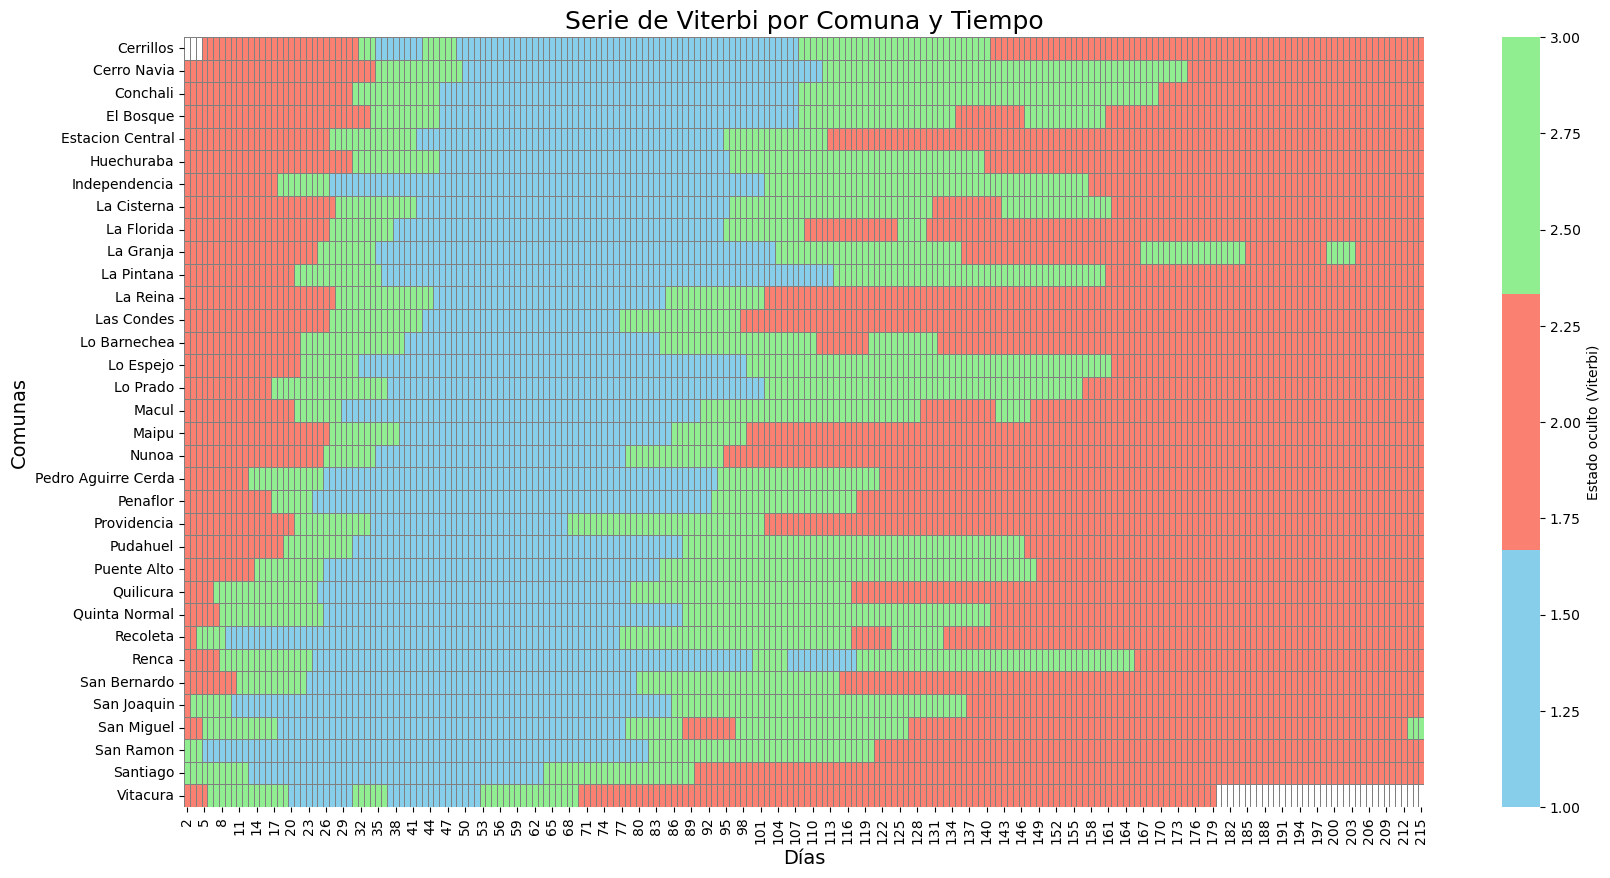

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el heatmap pivotando los datos
viterbi_pivot = viterbi_merged.pivot(index='Comuna', columns='dias', values='state')

# Configurar el heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(
    viterbi_pivot,
    cmap=['skyblue', 'salmon', 'lightgreen'],  # Colores personalizados para cada estado
    cbar_kws={'label': 'Estado oculto (Viterbi)'},
    linewidths=0.5,
    linecolor='gray'
)

# Títulos y etiquetas
plt.title('Serie de Viterbi por Comuna y Tiempo', fontsize=18)
plt.xlabel('Días', fontsize=14)
plt.ylabel('Comunas', fontsize=14)

# Mostrar el gráfico
plt.show()


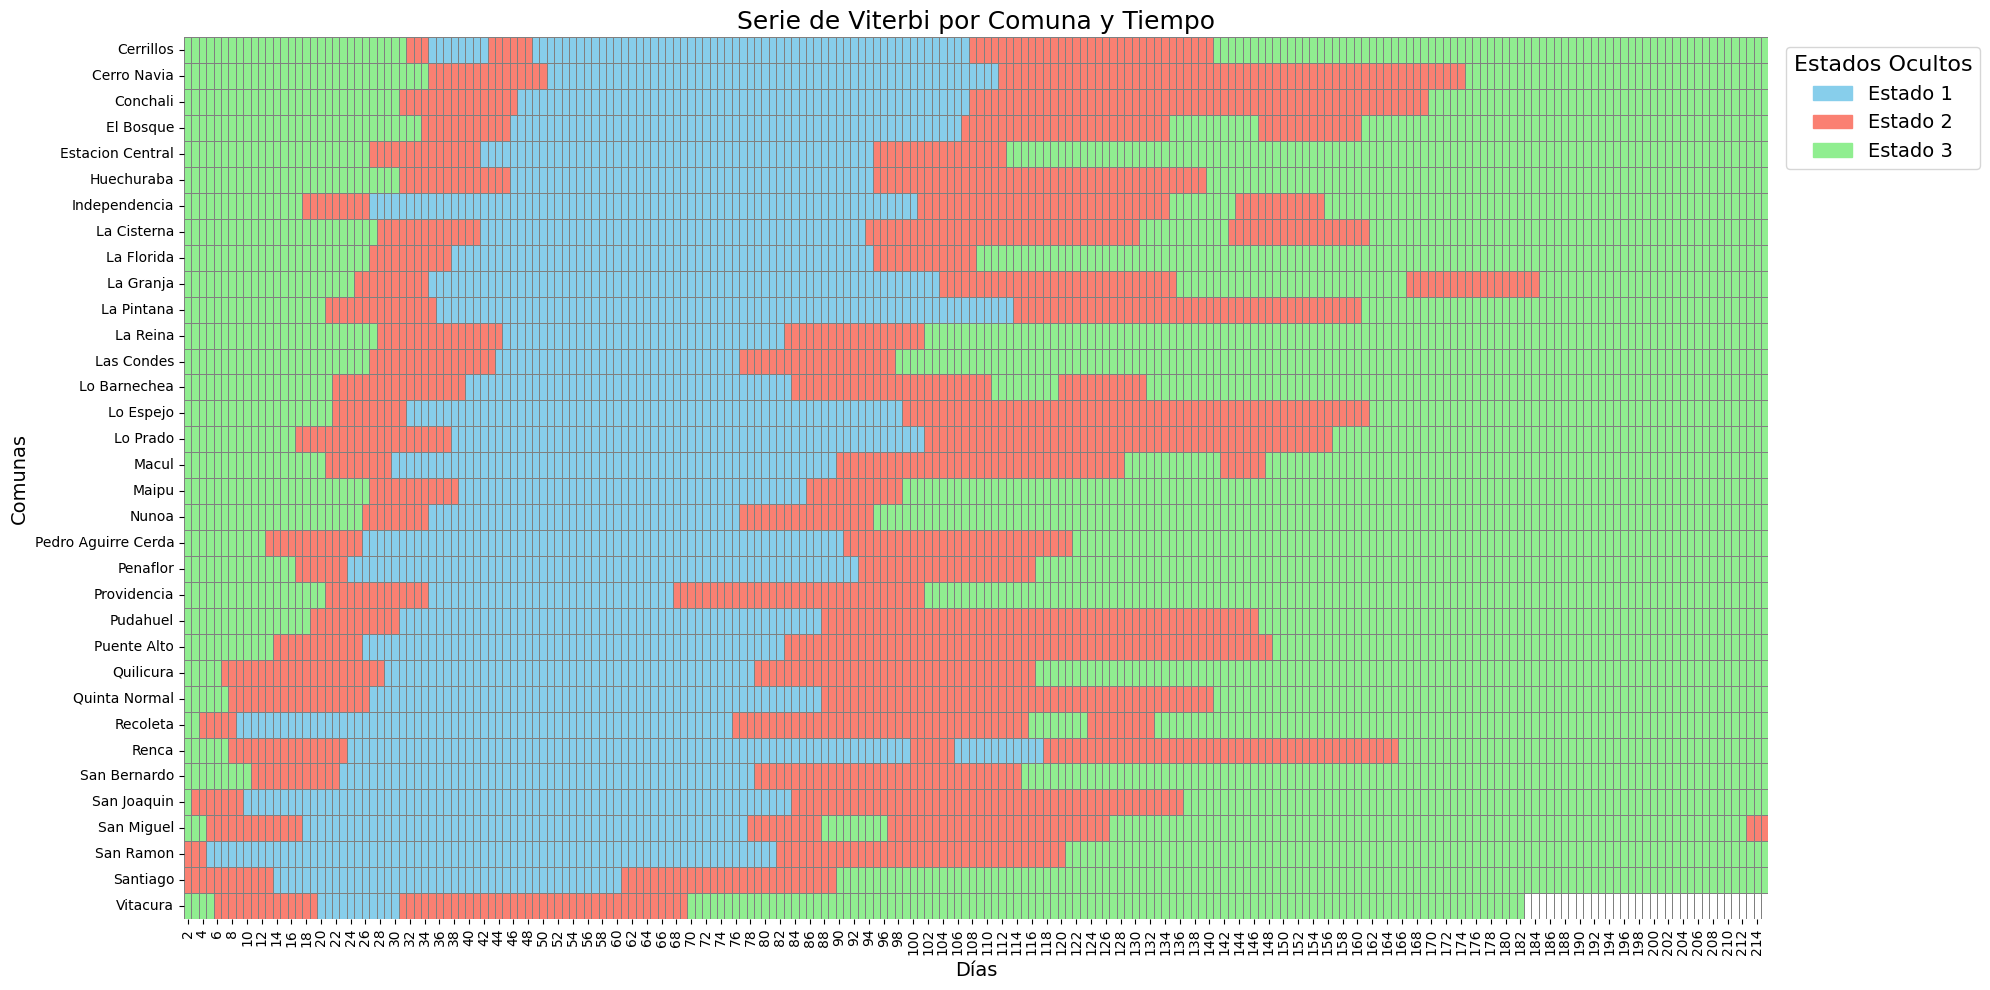

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Crear el heatmap pivotando los datos
viterbi_pivot = viterbi_merged.pivot(index='Comuna', columns='dias', values='state')

# Definir los colores personalizados para cada estado
custom_colors = ['skyblue', 'salmon', 'lightgreen']
custom_palette = dict(zip([1, 2, 3], custom_colors))  # Mapear los estados a colores

# Crear el heatmap sin la barra de color (cbar=False)
plt.figure(figsize=(20, 10))
sns.heatmap(
    viterbi_pivot,
    cmap=custom_colors,  # Usar los colores personalizados
    linewidths=0.5,
    linecolor='gray',
    cbar=False  # Desactivar la barra de color
)

# Crear una leyenda personalizada
legend_labels = ['Estado 1', 'Estado 2', 'Estado 3']  # Etiquetas para los estados
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(custom_colors, legend_labels)]

# Añadir la leyenda más cerca
plt.legend(
    handles=legend_handles,
    title="Estados Ocultos",
    bbox_to_anchor=(1.005, 1),  # Acercar aún más la leyenda al gráfico
    loc='upper left',          # Mantener la posición superior izquierda
    fontsize=14,               # Tamaño de fuente de las etiquetas
    title_fontsize=16          # Tamaño de fuente del título de la leyenda
)

# Títulos y etiquetas
plt.title('Serie de Viterbi por Comuna y Tiempo', fontsize=18)
plt.xlabel('Días', fontsize=14)
plt.ylabel('Comunas', fontsize=14)

# Ajustar el espaciado para evitar bordes innecesarios
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
base_final.columns

Index(['index', 'IM_interno', 'IM_externo', 'inc_pc_comuna',
       'TasaCasosAcumulados', 'Personas_hogar_promedio', 'inmigrantes',
       'total_hog_hacinados', 'indic_precariedad_vivienda', 'Comuna', 'fecha',
       'dias', 'por_educ_sup', 'porc_postgrado', 'IPS_2020', 'Prioridad_2020',
       'CODIGO', 'year', 'month', 'paso', 'paso_etiqueta',
       'Fecha inicio cuarentena', 'Fecha término cuarentena',
       'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7'],
      dtype='object')

In [ ]:
# Asegurarte de que viterbi_df y base_final existen y están correctamente alineados
print(viterbi_df.head())  # Verifica que tiene las columnas 'Index' y 'Estado'
print(base_final.head())  # Verifica las columnas disponibles para merge

# Crear el DataFrame combinado nuevamente
viterbi_combined = viterbi_df.merge(
    base_final,
    left_on='Index',
    right_index=True,  # Usamos el índice de base_final para el merge
    how='inner'        # Inner para asegurarnos de que solo tomamos valores comunes
)

# Inspeccionar el DataFrame combinado
print(viterbi_combined.head())
print(viterbi_combined.columns)


   state            S1        S2        S3  Index
1    3.0  0.000000e+00  0.000000  1.000000      1
2    3.0  6.074462e-11  0.000275  0.999725      2
3    3.0  6.477384e-07  0.000348  0.999652      3
4    3.0  3.885450e-07  0.000582  0.999417      4
5    3.0  7.015215e-06  0.000706  0.999287      5
   index  IM_interno  IM_externo  inc_pc_comuna  TasaCasosAcumulados  \
0      1    1.970381    7.804008      267197.56             2.248303   
1      2    1.845790    7.471452      267197.56             4.496605   
2      3    1.678598    6.891732      267197.56             4.496605   
3      4    1.736766    8.317872      267197.56             4.496605   
4      5    1.331296    6.378498      267197.56             4.496605   

   Personas_hogar_promedio  inmigrantes  total_hog_hacinados  \
0                 3.145581         3606                68120   
1                 3.145581         3606                68120   
2                 3.145581         3606                68120   
3          

In [ ]:
viterbi_combined.columns

Index(['state', 'S1', 'S2', 'S3', 'Index', 'index', 'IM_interno', 'IM_externo',
       'inc_pc_comuna', 'TasaCasosAcumulados', 'Personas_hogar_promedio',
       'inmigrantes', 'total_hog_hacinados', 'indic_precariedad_vivienda',
       'Comuna', 'fecha', 'dias', 'por_educ_sup', 'porc_postgrado', 'IPS_2020',
       'Prioridad_2020', 'CODIGO', 'year', 'month', 'paso', 'paso_etiqueta',
       'Fecha inicio cuarentena', 'Fecha término cuarentena',
       'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7'],
      dtype='object')

In [ ]:
viterbi_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7275 entries, 1 to 7275
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   state                       7275 non-null   float64       
 1   S1                          7275 non-null   float64       
 2   S2                          7275 non-null   float64       
 3   S3                          7275 non-null   float64       
 4   Index                       7275 non-null   int64         
 5   index                       7275 non-null   int64         
 6   IM_interno                  7275 non-null   float64       
 7   IM_externo                  7275 non-null   float64       
 8   inc_pc_comuna               7275 non-null   float64       
 9   TasaCasosAcumulados         7275 non-null   float64       
 10  Personas_hogar_promedio     7275 non-null   float64       
 11  inmigrantes                 7275 non-null   int64         
 1

In [ ]:
# Seleccionar las columnas necesarias
eda_data = viterbi_combined[['state', 'IM_interno', 'IM_externo', 'TasaCasosAcumulados',
                             'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7',
                             'inc_pc_comuna', 'Personas_hogar_promedio',
                             'inmigrantes', 'total_hog_hacinados',
                             'indic_precariedad_vivienda', 'por_educ_sup', 'IPS_2020']]


# Resumen estadístico por estado
summary_by_state = eda_data.groupby('state').describe()

print("Resumen estadístico por estado:")
print(summary_by_state)

Resumen estadístico por estado:
      IM_interno                                                              \
           count      mean       std       min       25%       50%       75%   
state                                                                          
1.0       1949.0  2.713943  1.264420  0.403075  1.708203  2.470699  3.442390   
2.0       1834.0  3.153607  1.568156  0.448905  2.002545  2.894567  3.859136   
3.0       3492.0  4.226879  2.390622  0.544551  2.453168  3.760384  5.344784   

                 IM_externo            ... por_educ_sup       IPS_2020  \
             max      count      mean  ...          75%   max    count   
state                                  ...                               
1.0     7.512220     1949.0  4.658474  ...         18.9  59.7   1949.0   
2.0     9.075400     1834.0  5.349684  ...         21.3  59.7   1834.0   
3.0    13.124657     3492.0  5.993507  ...         37.5  59.7   3492.0   

                                          

In [ ]:
summary_by_state

IM_interno                                                              \
           count      mean       std       min       25%       50%       75%   
state                                                                          
1.0       1949.0  2.713943  1.264420  0.403075  1.708203  2.470699  3.442390   
2.0       1834.0  3.153607  1.568156  0.448905  2.002545  2.894567  3.859136   
3.0       3492.0  4.226879  2.390622  0.544551  2.453168  3.760384  5.344784   

                 IM_externo            ... por_educ_sup       IPS_2020  \
             max      count      mean  ...          75%   max    count   
state                                  ...                               
1.0     7.512220     1949.0  4.658474  ...         18.9  59.7   1949.0   
2.0     9.075400     1834.0  5.349684  ...         21.3  59.7   1834.0   
3.0    13.124657     3492.0  5.993507  ...         37.5  59.7   3492.0   

                                                               
            mean        std   min    25%    50%    75%    max  
state                                                          
1.0    68.245146  16.175384  7.94  60.86  72.20  76.87  89.29  
2.0    66.046091  19.382538  7.94  57.63  72.20  77.71  89.29  
3.0    60.083680  21.647664  7.94  55.20  67.64  75.73  89.29  

[3 rows x 96 columns]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

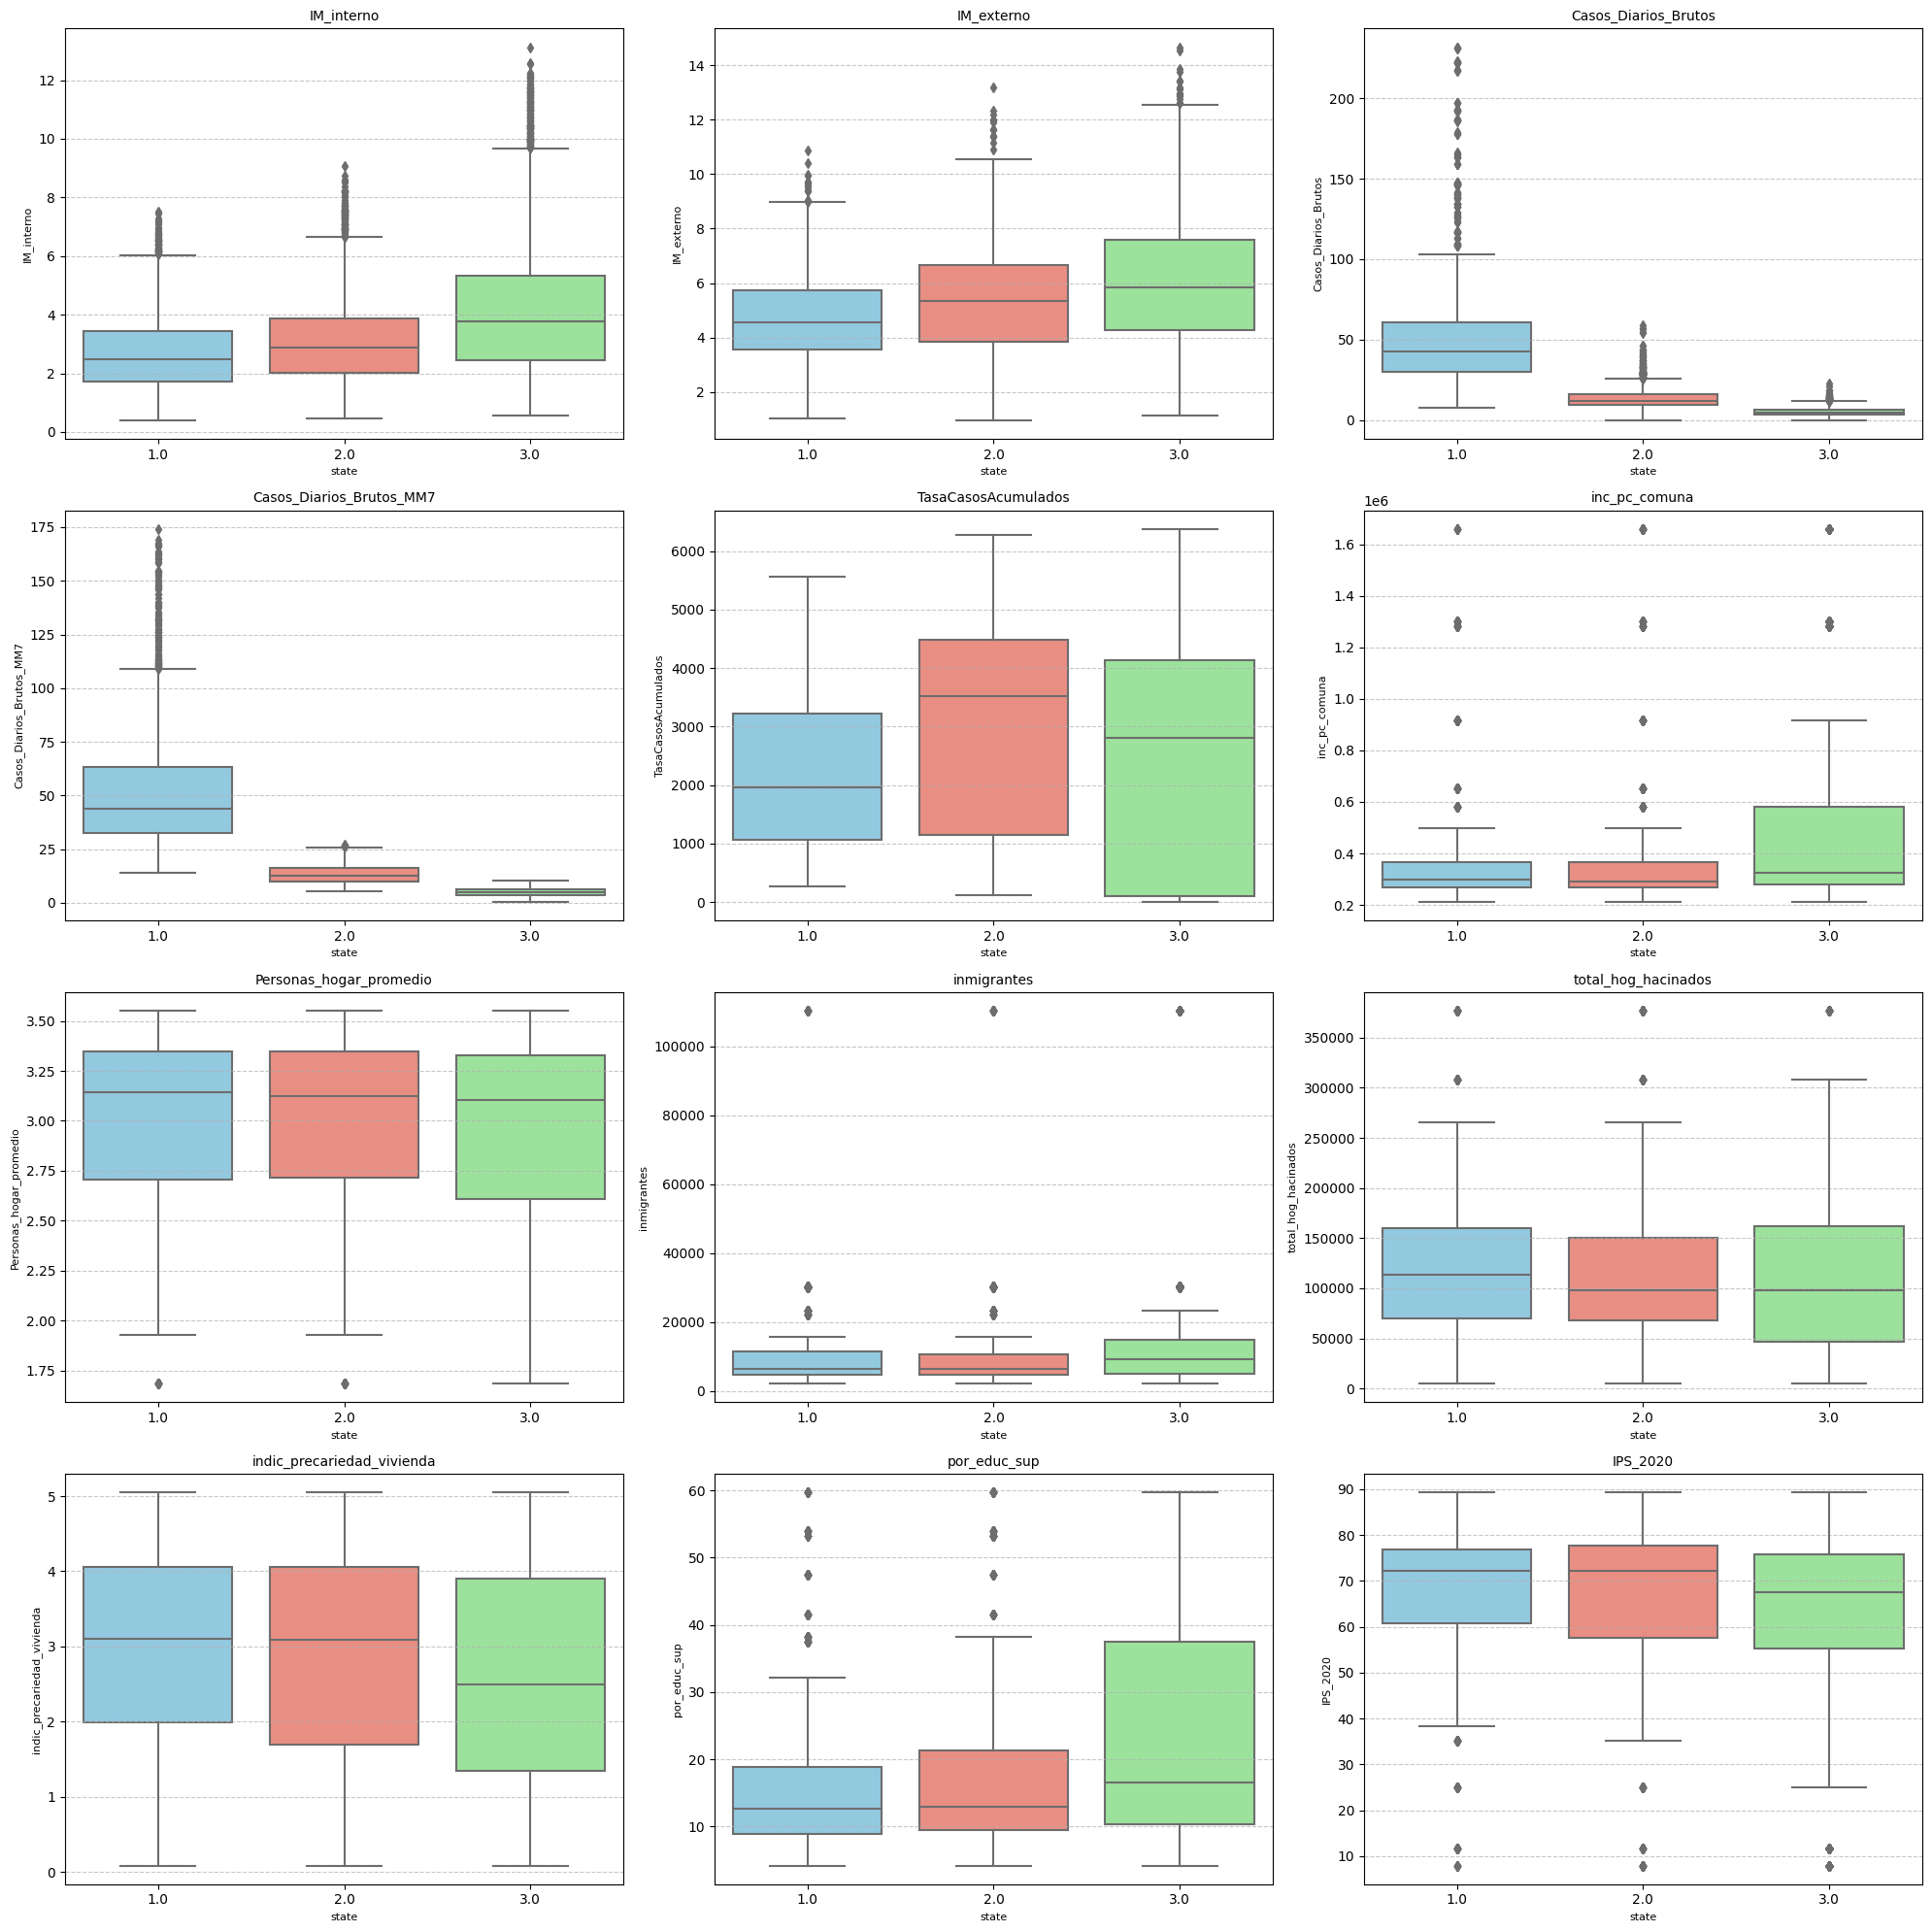

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los colores personalizados para cada estado
custom_palette = {1: 'skyblue', 2: 'salmon', 3: 'lightgreen'}

# Variables que queremos graficar
variables = ['IM_interno', 'IM_externo', 'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7',
             'TasaCasosAcumulados', 'inc_pc_comuna', 'Personas_hogar_promedio',
             'inmigrantes', 'total_hog_hacinados', 'indic_precariedad_vivienda',
             'por_educ_sup', 'IPS_2020']

# Configuración de la figura
n_rows = 4  # Número de filas
n_cols = 3  # Número de columnas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Ajusta el tamaño total

# Aplanar los ejes para iterar más fácilmente
axes = axes.ravel()

# Crear los boxplots para cada variable
for i, var in enumerate(variables):
    sns.boxplot(data=eda_data, x='state', y=var, palette=custom_palette, ax=axes[i])
    axes[i].set_title(f'{var}', fontsize=10)
    axes[i].set_xlabel('state', fontsize=8)
    axes[i].set_ylabel(var, fontsize=8)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Eliminar cualquier subplot sobrante si hay más ejes que gráficos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


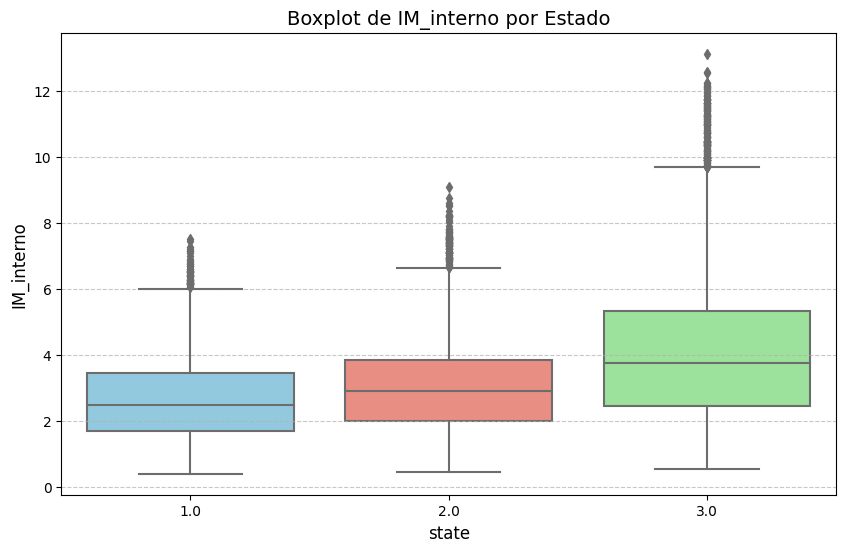

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


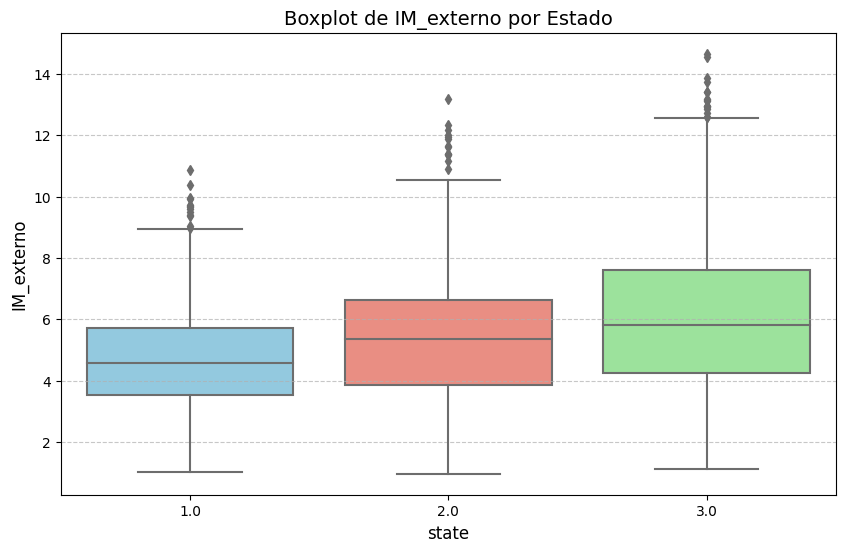

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


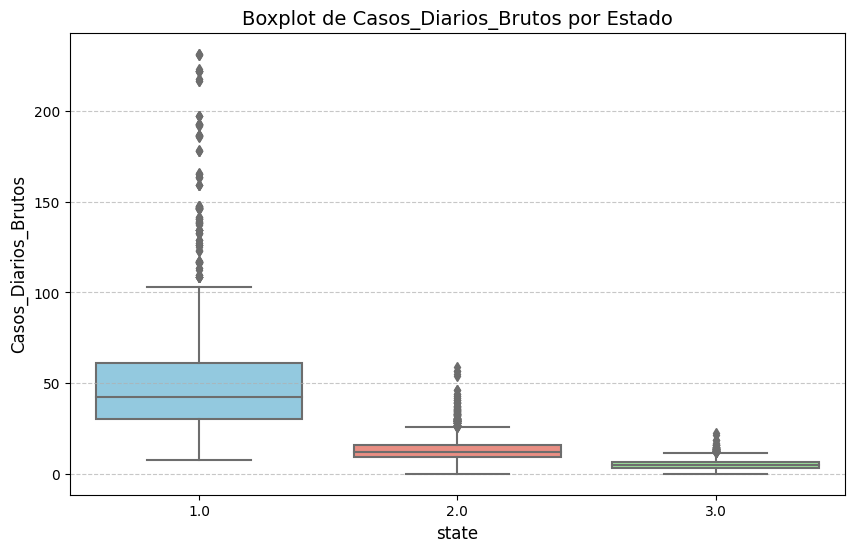

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


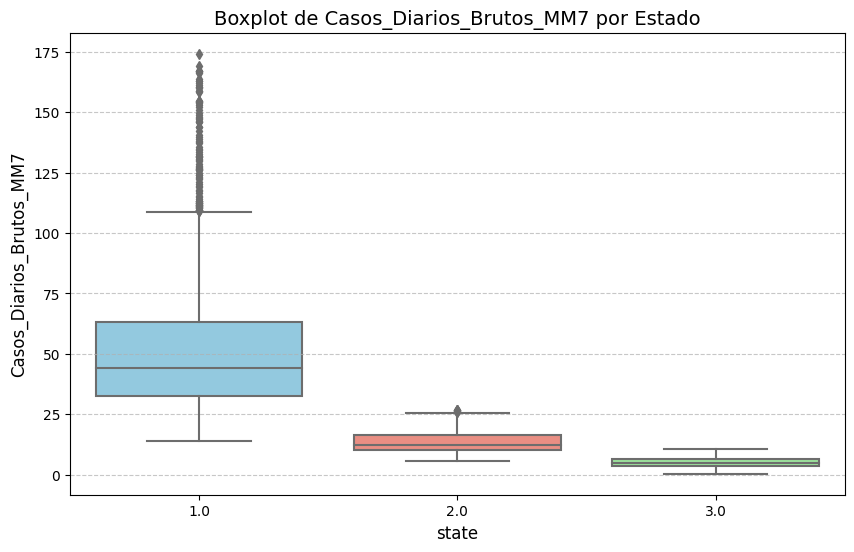

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


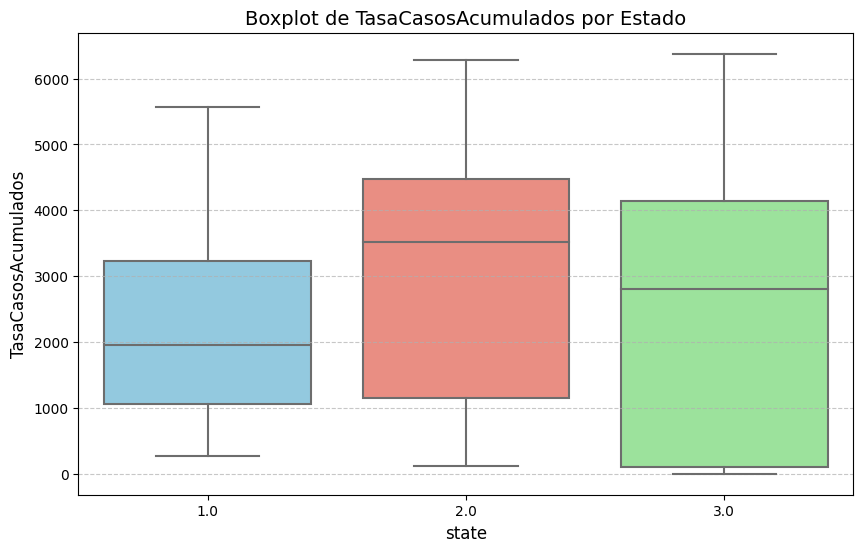

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


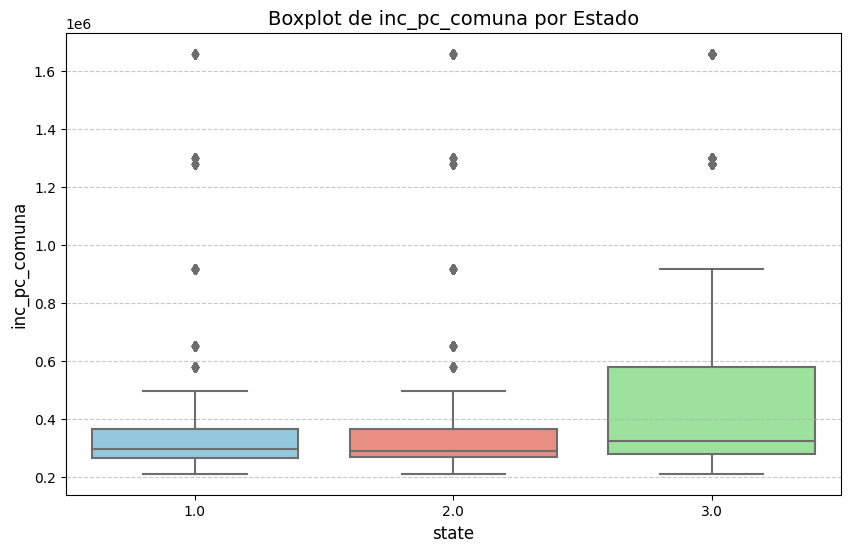

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


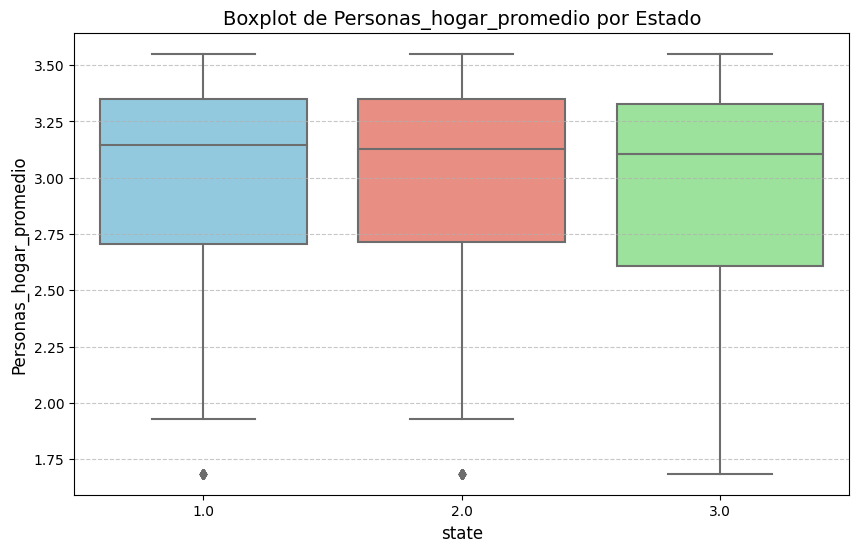

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


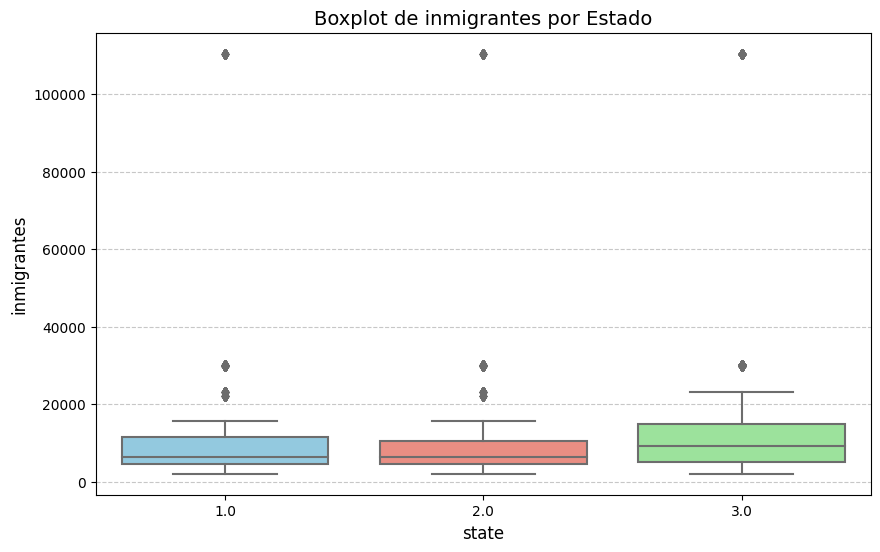

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


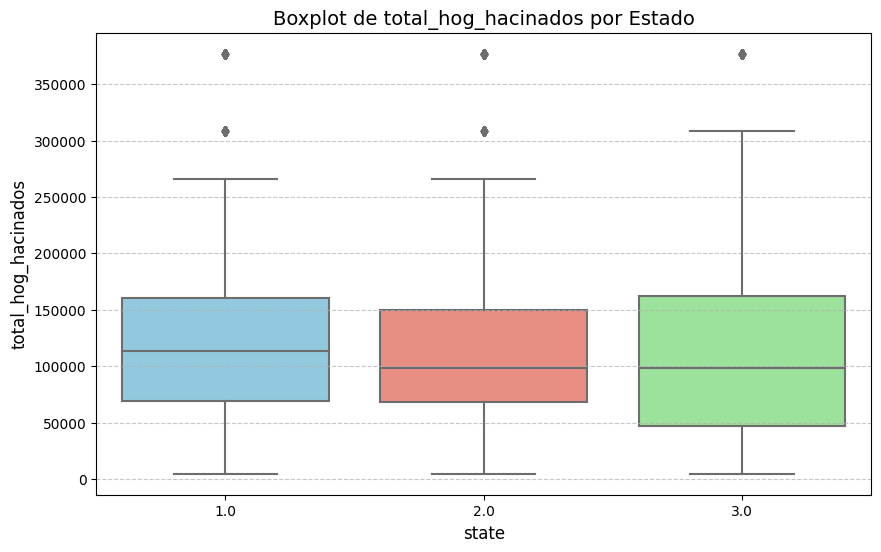

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


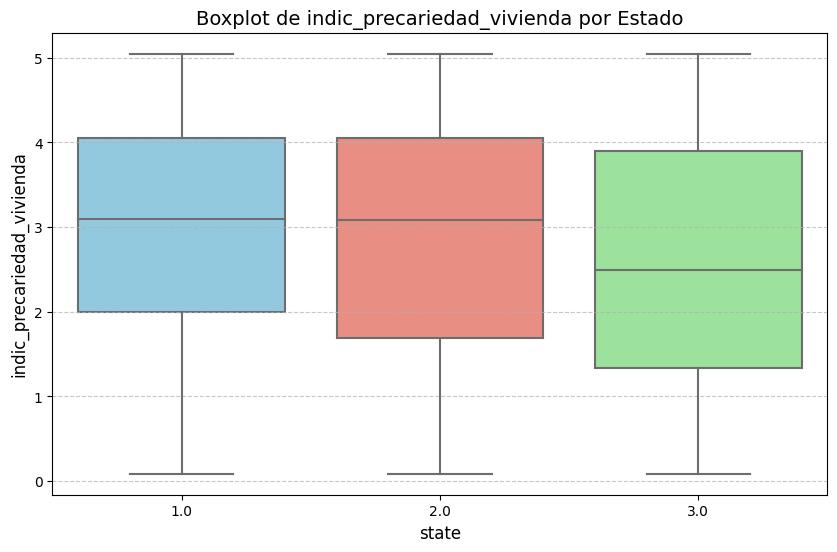

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


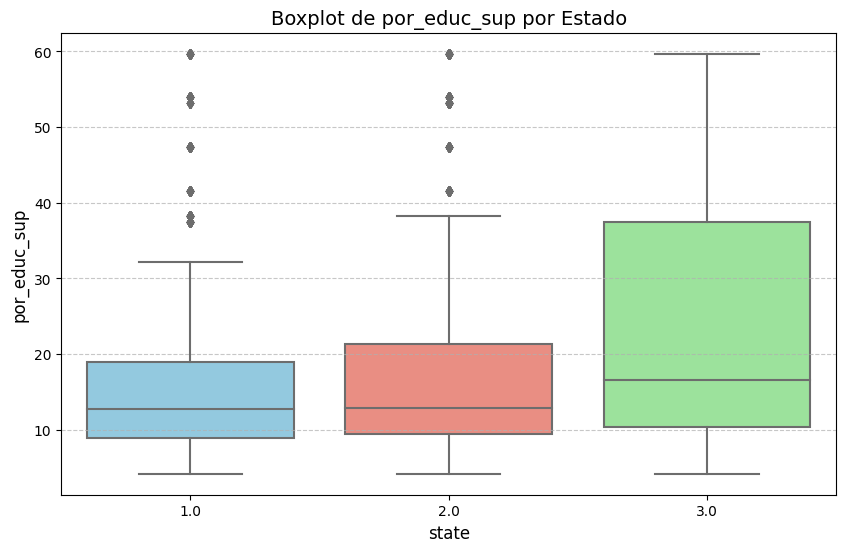

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


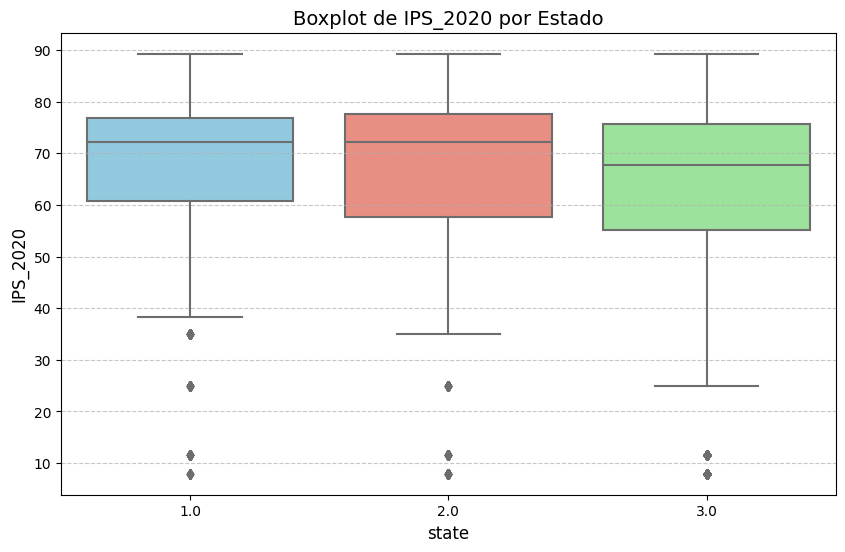

In [ ]:
# Este no lo corrí porque es lo mismo anterior pero con gráficos individuales más grandes,
# pero lo dejo igual por si lo necesitamos para el escrito.

import seaborn as sns
import matplotlib.pyplot as plt

# Definir los colores personalizados para cada estado
custom_palette = {1: 'skyblue', 2: 'salmon', 3: 'lightgreen'}

# Variables que queremos graficar
variables = ['IM_interno', 'IM_externo', 'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7',
             'TasaCasosAcumulados', 'inc_pc_comuna', 'Personas_hogar_promedio',
             'inmigrantes', 'total_hog_hacinados', 'indic_precariedad_vivienda',
             'por_educ_sup', 'IPS_2020']

# Crear boxplots para cada variable por estado con la paleta personalizada
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=eda_data, x='state', y=var, palette=custom_palette)
    plt.title(f'Boxplot de {var} por Estado', fontsize=14)
    plt.xlabel('state', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

*Instrucción ChatGPT: Quiero hacer otra cosa ahora. Podrías hacer un conteo de cuánto estuvo en cada estado cada comuna, para hacer una estadística descriptiva de eso, cosa de poner ver si las que estuvieron más tiempo en el color azul que sería más casos, tienen características específicas como de pobreza, etc.*

Paso 1: Conteo de días en cada estado por comuna

El siguiente código agrupa los datos por comuna y estado para calcular cuántos días estuvo cada comuna en cada estado:

In [ ]:
# Crear una tabla con los días que cada comuna estuvo en cada estado
conteo_estados = viterbi_combined.groupby(['Comuna', 'state']).size().reset_index(name='Días_en_estado')

# Mostrar el resultado
print("Conteo de días en cada estado por comuna:")
print(conteo_estados)


Conteo de días en cada estado por comuna:
          Comuna  state  Días_en_estado
0      Cerrillos    1.0              67
1      Cerrillos    2.0              42
2      Cerrillos    3.0             104
3    Cerro Navia    1.0              61
4    Cerro Navia    2.0              79
..           ...    ...             ...
97      Santiago    2.0              42
98      Santiago    3.0             125
99      Vitacura    1.0              11
100     Vitacura    2.0              53
101     Vitacura    3.0             150

[102 rows x 3 columns]


In [ ]:
viterbi_combined.columns

Index(['state', 'S1', 'S2', 'S3', 'Index', 'index', 'IM_interno', 'IM_externo',
       'inc_pc_comuna', 'TasaCasosAcumulados', 'Personas_hogar_promedio',
       'inmigrantes', 'total_hog_hacinados', 'indic_precariedad_vivienda',
       'Comuna', 'fecha', 'dias', 'por_educ_sup', 'porc_postgrado', 'IPS_2020',
       'Prioridad_2020', 'CODIGO', 'year', 'month', 'paso', 'paso_etiqueta',
       'Fecha inicio cuarentena', 'Fecha término cuarentena',
       'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7'],
      dtype='object')

In [ ]:
# Calcular promedios por estado y comuna
promedios_estado_comuna = (
    viterbi_combined.groupby(['state', 'Comuna']).agg({
        'IM_interno': 'mean',
        'IM_externo': 'mean',
        'TasaCasosAcumulados': 'mean',
        'Casos_Diarios_Brutos': 'mean',
        'Casos_Diarios_Brutos_MM7': 'mean',
        'inc_pc_comuna': 'mean',
        'Personas_hogar_promedio': 'mean',
        'inmigrantes': 'mean',
        'total_hog_hacinados': 'mean',
        'indic_precariedad_vivienda': 'mean',
        'por_educ_sup': 'mean',
        'IPS_2020': 'mean'
    }).reset_index()
)

# Combinar con el conteo de días en cada estado
conteo_estados_caracteristicas= conteo_estados.merge(
    promedios_estado_comuna,
    on=['state', 'Comuna']
)

# Inspeccionar el DataFrame combinado actualizado
print("Datos combinados actualizados de tiempo en estados y características por comuna:")
print(conteo_estados_caracteristicas.head())


Datos combinados actualizados de tiempo en estados y características por comuna:
        Comuna  state  Días_en_estado  IM_interno  IM_externo  \
0    Cerrillos    1.0              67    1.802638    7.084554   
1    Cerrillos    2.0              42    2.190011    8.088118   
2    Cerrillos    3.0             104    2.459002    8.909593   
3  Cerro Navia    1.0              61    1.642784    6.310378   
4  Cerro Navia    2.0              79    2.396856    7.563427   

   TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
0          1733.558700             41.107024                 42.173649   
1          2714.477355             14.801325                 13.535699   
2          2682.289775              5.361337                  5.197295   
3          2636.414006             61.758050                 62.645733   
4          3834.155136             14.642726                 14.102001   

   inc_pc_comuna  Personas_hogar_promedio  inmigrantes  total_hog_hacinados  \
0   

In [ ]:
import numpy as np

# Crear promedios ponderados por días en estado
estadisticas_estado_ponderadas = conteo_estados_caracteristicas.groupby('state').apply(
    lambda x: pd.Series({
        'Días_mean': x['Días_en_estado'].mean(),
        'Días_std': x['Días_en_estado'].std(),
        'Días_min': x['Días_en_estado'].min(),
        'Días_max': x['Días_en_estado'].max(),
        'IM_interno_mean': np.average(x['IM_interno'], weights=x['Días_en_estado']),
        'IM_externo_mean': np.average(x['IM_externo'], weights=x['Días_en_estado']),
        'inc_pc_comuna_mean': np.average(x['inc_pc_comuna'], weights=x['Días_en_estado']),
        'TasaCasosAcumulados_mean': np.average(x['TasaCasosAcumulados'], weights=x['Días_en_estado']),
        'Casos_Diarios_Brutos_mean': np.average(x['Casos_Diarios_Brutos'], weights=x['Días_en_estado']),
        'Casos_Diarios_Brutos_MM7_mean': np.average(x['Casos_Diarios_Brutos_MM7'], weights=x['Días_en_estado']),
        'Personas_hogar_promedio_mean': np.average(x['Personas_hogar_promedio'], weights=x['Días_en_estado']),
        'inmigrantes_mean': np.average(x['inmigrantes'], weights=x['Días_en_estado']),
        'total_hog_hacinados_mean': np.average(x['total_hog_hacinados'], weights=x['Días_en_estado']),
        'indic_precariedad_vivienda_mean': np.average(x['indic_precariedad_vivienda'], weights=x['Días_en_estado']),
        'por_educ_sup_mean': np.average(x['por_educ_sup'], weights=x['Días_en_estado']),
        'IPS_2020_mean': np.average(x['IPS_2020'], weights=x['Días_en_estado']),
    })
).reset_index()

# Mostrar los resultados
print("Resumen estadístico ponderado por estado:")
print(estadisticas_estado_ponderadas)


Resumen estadístico ponderado por estado:
   state   Días_mean   Días_std  Días_min  Días_max  IM_interno_mean  \
0    1.0   57.323529  15.113150      11.0      88.0         2.713943   
1    2.0   53.941176  16.003676      25.0      79.0         3.153607   
2    3.0  102.705882  25.146274      56.0     150.0         4.226879   

   IM_externo_mean  inc_pc_comuna_mean  TasaCasosAcumulados_mean  \
0         4.658474       385986.679277               2216.910592   
1         5.349684       424786.698833               3054.991586   
2         5.993507       518238.591040               2510.006681   

   Casos_Diarios_Brutos_mean  Casos_Diarios_Brutos_MM7_mean  \
0                  51.769006                      52.286870   
1                  13.759506                      13.461669   
2                   5.137591                       4.925464   

   Personas_hogar_promedio_mean  inmigrantes_mean  total_hog_hacinados_mean  \
0                      3.015614      11557.004105             12

### Interpretación Importante

#### Estado 1 "Contagios Severos" (azul - centro)

Duración promedio días en estado: Las comunas pasan 57 días en promedio, con una desviación estándar de 15 días, lo que indica variabilidad moderada en su duración.

- Movilidad interna (IM_interno): Promedio de 2.71, la más baja entre los estados. Refleja que en situaciones de contagio severo, la movilidad interna tiende a ser más limitada.
- Movilidad externa (IM_externo): Promedio de 4.66, también el más bajo.
- Tasa de casos acumulados (TasaCasosAcumulados): Promedio de 2,216.91
- Casos diarios brutos promedio: Promedio 51.77. Estos valores son altos y reflejan un crecimiento sostenido de casos durante este estado.
- Media móvil de 7 días (MM7): Promedio 52.29. Estos valores son altos y reflejan un crecimiento sostenido de casos durante este estado.
- Ingreso per cápita (inc_pc_comuna): Promedio de 385,986, el más bajo. Esto indica que las comunas con ingresos más bajos tienden a experimentar contagios severos.
- Personas por hogar: Promedio de 3.02, el más alto entre los estados. Esto podría estar relacionado con mayor transmisión en hogares donde viven más gente.
- Cantidad de inmigrantes: Promedio de 11,557, el más bajo de los tres estados.
- Hogares hacinados: Promedio de 123,708, el más alto. Esto confirma que comunas con mayor hacinamiento tienden a experimentar contagios severos.
- Índice de precariedad de vivienda: Promedio de 2.99, el más alto. Refuerza la asociación entre condiciones de vivienda precarias y contagios severos.
- Nivel educativo (por_educ_sup): Promedio de 17.03%, el más bajo. Comunas con menor porcentaje de población con educación superior experimentan más severidad en los contagios.
- Índice de prioridad social (IPS_2020): Promedio de 68.25, el más alto, reflejando mayor vulnerabilidad social.

Conclusión: Este estado se asocia con comunas vulnerables, de menor ingreso, alta densidad y alto hacinamiento, lo que podría facilitar una propagación grave de casos.

#### Estado 2 "Contagios Moderados" (rojo - medio)

Tiempo promedio en estado: Las comunas pasan 53.94 días en este estado, con una desviación estándar de 16 días. Esto muestra menor permanencia comparada con los otros estados.

- Movilidad interna (IM_interno): Promedio de 3.15, mayor que el estado 1.
- Movilidad externa (IM_externo): Promedio de 5.35, también mayor que en el estado 1, pero menor que en el estado 3.
- Ingreso per cápita (inc_pc_comuna): Promedio de 424,786, un valor intermedio. Las comunas con ingresos moderados parecen estar asociadas con este estado.
- Tasa de casos acumulados (TasaCasosAcumulados): Promedio de 3,054.99, la más alta.
- Casos diarios brutos promedio: 13.76. Es mayor que el estado 3, pero considerablemente más bajo que el estado 1 severo.
- Media móvil de 7 días (MM7): 13.46. Es mayor que el estado 3, pero considerablemente más bajo que el estado 1 severo.
- Personas por hogar: Promedio de 3.00, ligeramente más bajo que en el estado 1.
- Cantidad de inmigrantes: Promedio de 11,285, similar al estado 1, pero aún bajo.
- Hogares hacinados: Promedio de 118,892, menor que en el estado 1 y mayor que el estado 3.
- Índice de precariedad de vivienda: Promedio de 2.86, menor que el estado 1 pero mayor que el estado 3. Esto sugiere que la precariedad de vivienda es menor en este estado.
- Nivel educativo (por_educ_sup): Promedio de 18.42%, ligeramente mayor que en el estado 1.
- Índice de prioridad social (IPS_2020): Promedio de 66.04, menor que en el estado 1.

Conclusión: Este estado refleja comunas de características intermedias: ingresos moderados y menos hacinamiento en comparación con el estado 1, pero todavía vulnerables.

#### Estado 3 "Contagios Leves" (Verde - "Orillas")

Tiempo promedio en estado: Las comunas permanecen más tiempo aquí, con 102.70 días en promedio y una desviación estándar de 25 días.

- Movilidad interna (IM_interno): Promedio de 4.23, el más alto. Esto refleja mayor recuperación de la actividad interna.
- Movilidad externa (IM_externo): Promedio de 5.99, también el más alto. Comunas en este estado interactúan más con otras comunas.
- Ingreso per cápita (inc_pc_comuna): Promedio de 518,238, el más alto. Comunas con mayores recursos predominan en este estado.
- Tasa de casos acumulados (TasaCasosAcumulados): Promedio de 2,510.00, menor que en el estado 2.
- Casos diarios brutos promedio: 5.14. Valores mucho más bajos en comparación con los otros estados.
- Media móvil de 7 días (MM7): 4.93. Valores mucho más bajos en comparación con los otros estados.
- Personas por hogar: Promedio de 2.91, el menor.
- Cantidad de inmigrantes: Promedio de 13,896, el más alto.
- Hogares hacinados: Promedio de 113,964, el menor. Mejores condiciones de vivienda en este estado.
- Índice de precariedad de vivienda: Promedio de 2.54, el más bajo. Esto refuerza la asociación entre mejores condiciones de vivienda y menor gravedad en los contagios.
- Nivel educativo (por_educ_sup): Promedio de 23.12%, el más alto. Comunas con mayor nivel educativo predominan.
- Índice de prioridad social (IPS_2020): Promedio de 60.08, el más bajo. Refleja menor vulnerabilidad social.

Conclusión: Este estado se caracteriza por tener mayor ingreso, menor densidad y mejores condiciones socioeconómicas. Las comunas con estas características permanecen más tiempo en este estado de menor gravedad de contagios.


Resumen General

- Estado 1 (Azul): Condiciones más vulnerables que favorecen la propagación grave de casos.
- Estado 2 (Rojo): Mejoras en ingresos y hacinamiento en comparación con el estado de contagios severos pero aún se observan condiciones de vulnerabilidad.
- Estado 3 (Verde): Se caracteriza por mayor ingreso y mayor nivel educacional, con menor densidad y vulnerabilidad.

Esta información refuerza que las condiciones socioeconómicas y de infraestructura son determinantes en el impacto de los casos diarios.

### Sugerencias Profe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
viterbi_combined.columns

Index(['state', 'S1', 'S2', 'S3', 'Index', 'index', 'IM_interno', 'IM_externo',
       'inc_pc_comuna', 'TasaCasosAcumulados', 'Personas_hogar_promedio',
       'inmigrantes', 'total_hog_hacinados', 'indic_precariedad_vivienda',
       'Comuna', 'fecha', 'dias', 'por_educ_sup', 'porc_postgrado', 'IPS_2020',
       'Prioridad_2020', 'CODIGO', 'year', 'month', 'paso', 'paso_etiqueta',
       'Fecha inicio cuarentena', 'Fecha término cuarentena',
       'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7'],
      dtype='object')

In [ ]:
# Calcular promedios por comuna dentro de cada estado
promedios_por_comuna_estado = (
    viterbi_combined.groupby(['state', 'Comuna']).agg({
        'IM_interno': 'mean',
        'IM_externo': 'mean',
        'TasaCasosAcumulados': 'mean',
        'Casos_Diarios_Brutos': 'mean',
        'Casos_Diarios_Brutos_MM7': 'mean',
        'Personas_hogar_promedio': 'mean',
        'total_hog_hacinados': 'mean',
        'inmigrantes': 'mean',
        'por_educ_sup': 'mean',
        'inc_pc_comuna': 'mean',
        'indic_precariedad_vivienda': 'mean',
        'IPS_2020': 'mean'
    }).reset_index()
)

print(promedios_por_comuna_estado.head())

   state            Comuna  IM_interno  IM_externo  TasaCasosAcumulados  \
0    1.0         Cerrillos    1.802638    7.084554          1733.558700   
1    1.0       Cerro Navia    1.642784    6.310378          2636.414006   
2    1.0          Conchali    2.588549    4.556549          2588.619928   
3    1.0         El Bosque    1.558698    3.940898          2031.681281   
4    1.0  Estacion Central    2.669317    4.991126          1589.519904   

   Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  Personas_hogar_promedio  \
0             41.107024                 42.173649                 3.145581   
1             61.758050                 62.645733                 3.388747   
2             60.382327                 60.564034                 3.125893   
3             50.438429                 50.547356                 3.111096   
4             42.344983                 42.687789                 2.704998   

   total_hog_hacinados  inmigrantes  por_educ_sup  inc_pc_comuna  \
0           

In [ ]:
# Paso 2: Normalizar IM_interno y TasaCasosAcumulados
scaler = MinMaxScaler()
promedios_por_comuna_estado['IM_interno_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['IM_interno']])
promedios_por_comuna_estado['IM_externo_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['IM_externo']])
promedios_por_comuna_estado['TasaCasosAcumulados_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['TasaCasosAcumulados']])
promedios_por_comuna_estado['Casos_Diarios_Brutos_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['Casos_Diarios_Brutos']])
promedios_por_comuna_estado['Casos_Diarios_Brutos_MM7_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['Casos_Diarios_Brutos_MM7']])

## 1. Correlación de Casos Diarios Brutos con Movilidad Interna por cada Estado
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

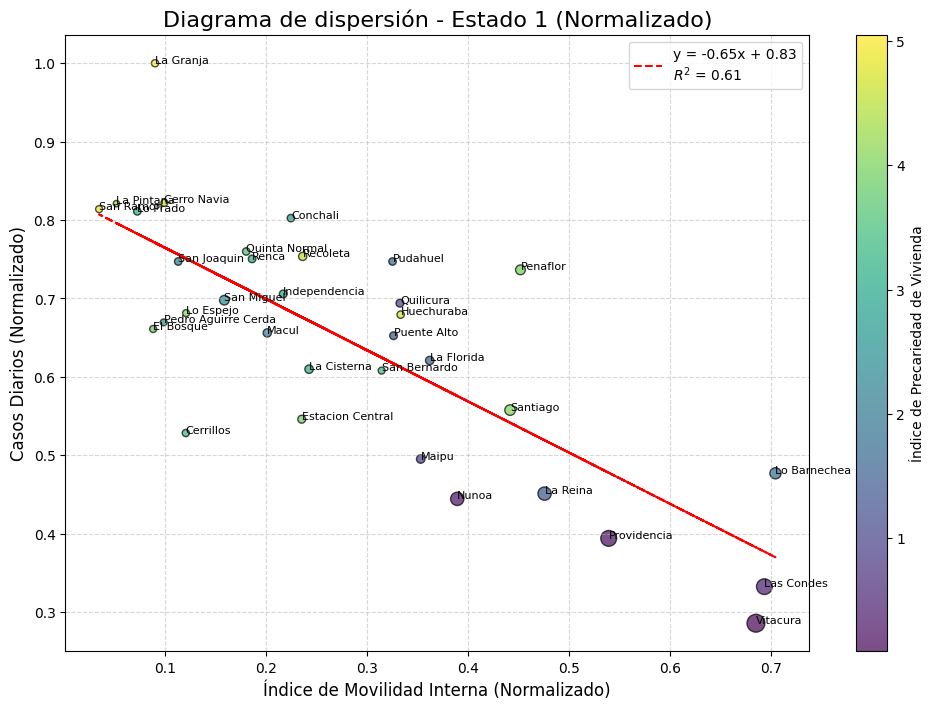

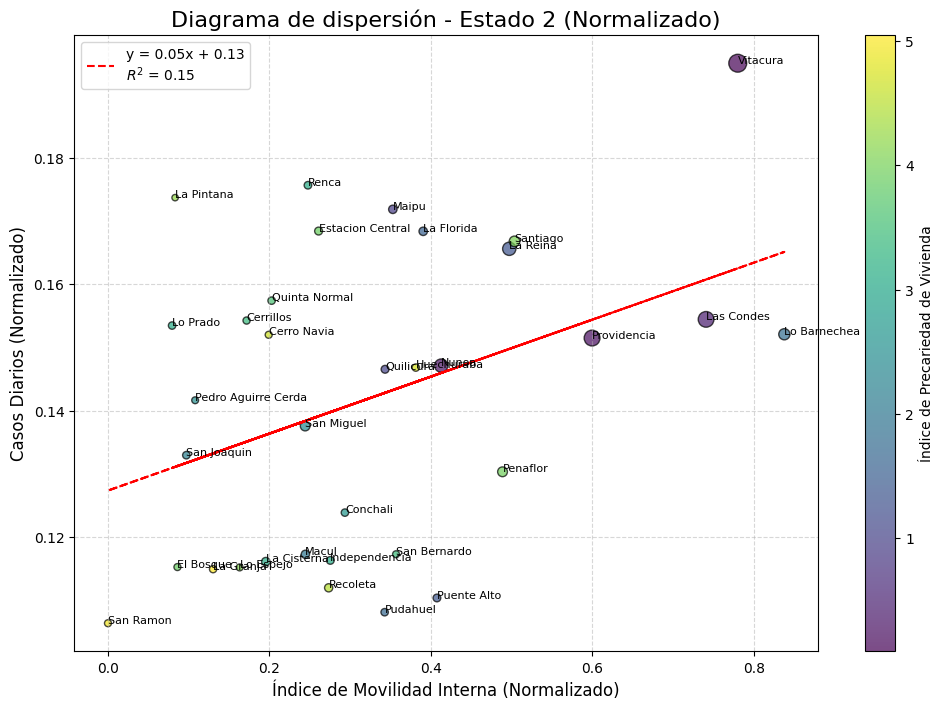

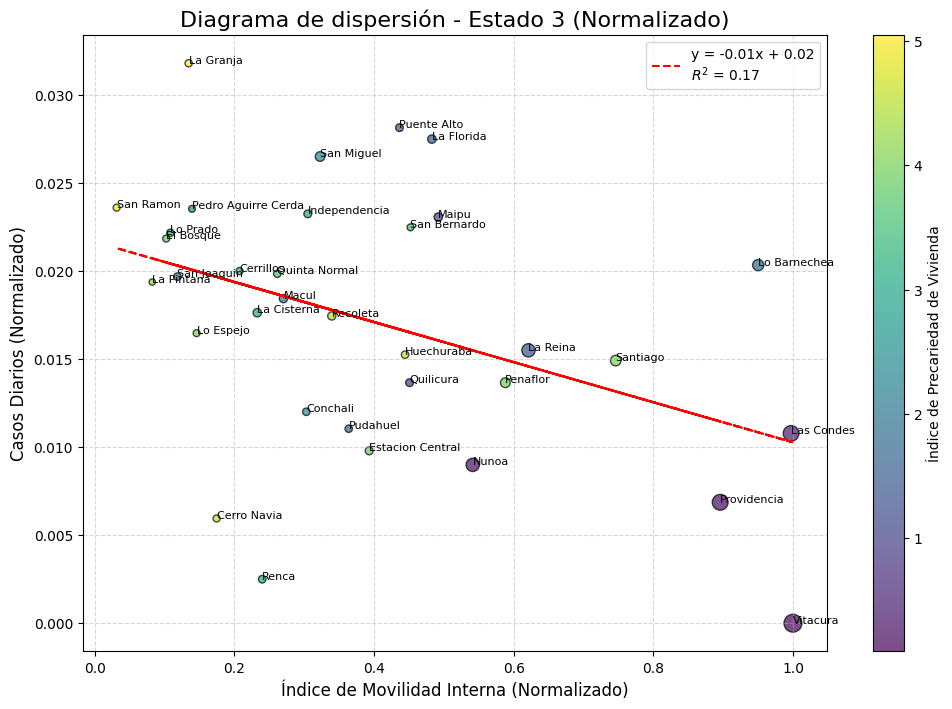

In [ ]:
# Paso 3: Crear diagramas de dispersión para cada estado
for estado in promedios_por_comuna_estado['state'].unique():
    estado_data = promedios_por_comuna_estado[promedios_por_comuna_estado['state'] == estado]

    # Variables para el gráfico
    X = estado_data['IM_interno_normalizado'].values.reshape(-1, 1)
    Y = estado_data['Casos_Diarios_Brutos_normalizado'].values
    sizes = estado_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
    colors = estado_data['indic_precariedad_vivienda'].values  # Color del punto

    # Ajustar una línea de regresión lineal
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)

    # Calcular R^2
    r_squared = model.score(X, Y)
    equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"

    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        estado_data['IM_interno_normalizado'], estado_data['Casos_Diarios_Brutos_normalizado'],
        s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
    )

    # Agregar nombres de las comunas
    for i, row in estado_data.iterrows():
        plt.text(row['IM_interno_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)

    # Agregar la línea de regresión
    plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)

    # Configurar colorbar y etiquetas
    plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
    plt.title(f'Diagrama de dispersión - Estado {int(estado)} (Normalizado)', fontsize=16)
    plt.xlabel('Índice de Movilidad Interna (Normalizado)', fontsize=12)
    plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
    plt.legend(fontsize=10)

    # Mostrar el gráfico
    plt.grid(alpha=0.5, linestyle='--')
    plt.show()

### 1.1 Correlación de Casos Diarios Brutos con Movilidad Interna para Estado 1 "Contagios Severos"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

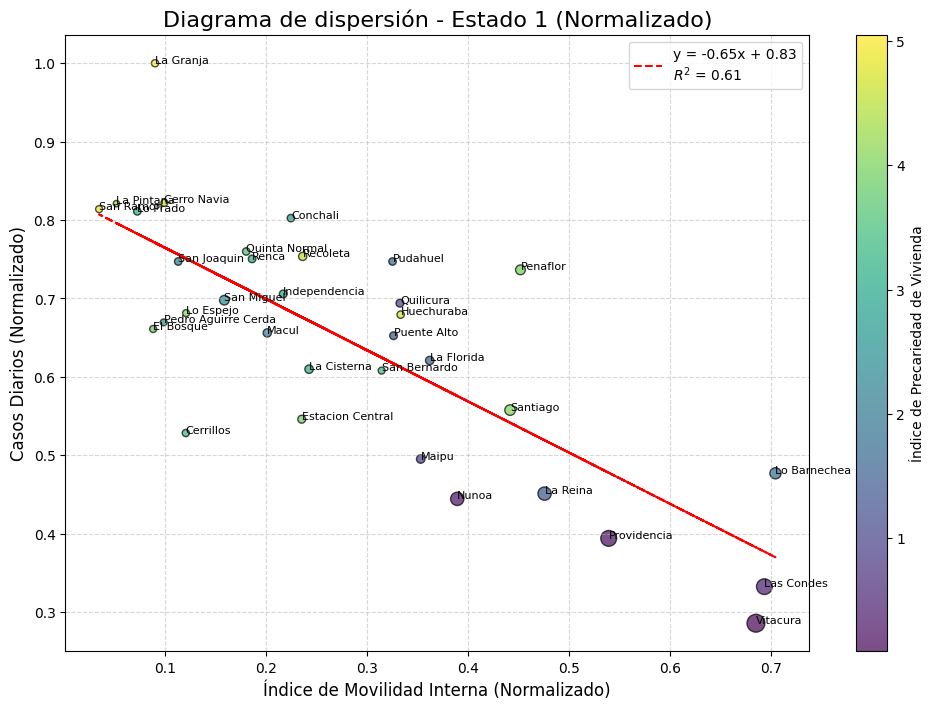

In [ ]:
# Filtrar datos del Estado 1
estado1_data = promedios_por_comuna_estado[promedios_por_comuna_estado['state'] == 1]

# Variables para el gráfico
X = estado1_data['IM_interno_normalizado'].values.reshape(-1, 1)
Y = estado1_data['Casos_Diarios_Brutos_normalizado'].values
sizes = estado1_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
colors = estado1_data['indic_precariedad_vivienda'].values  # Color del punto

# Ajustar una línea de regresión lineal
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calcular R^2
r_squared = model.score(X, Y)
equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"

# Crear el gráfico
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    estado1_data['IM_interno_normalizado'], estado1_data['Casos_Diarios_Brutos_normalizado'],
    s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
)

# Agregar nombres de las comunas
for i, row in estado1_data.iterrows():
    plt.text(row['IM_interno_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)

# Agregar la línea de regresión
plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)

# Configurar colorbar y etiquetas
plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
plt.title('Diagrama de dispersión - Estado 1 (Normalizado)', fontsize=16)
plt.xlabel('Índice de Movilidad Interna (Normalizado)', fontsize=12)
plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
plt.legend(fontsize=10)

# Mostrar el gráfico
plt.grid(alpha=0.5, linestyle='--')
plt.show()


##### Interpretación del gráfico para el Estado 1 (contagios severos):

Relación entre movilidad interna y casos diarios (Línea de tendencia):
- La pendiente negativa de la recta indica que, en promedio, mayor movilidad interna está asociada con una disminución de los casos diarios.
- El coeficiente de determinación (R² = 0.61) sugiere que la movilidad interna explica un 61% de la variación en los casos diarios normalizados. Es una relación moderadamente fuerte.

Distribución de las comunas:
- Alta precariedad de vivienda: Comunas con altos valores de indic_precariedad_vivienda (color más claro) tienden a concentrarse en niveles más bajos de movilidad interna (extremo izquierdo del eje X) y valores más altos de casos diarios (arriba en el eje Y). Ejemplos: La Granja, La Pintana, Cerro Navia.
- Baja precariedad de vivienda: Comunas con índices de precariedad más bajos (color oscuro) y mayor ingreso per cápita (puntos grandes) tienen mayor movilidad interna (extremo derecho del eje X) y menor número de casos diarios. Ejemplos: Vitacura, Las Condes, Lo Barnechea.

Rol del ingreso per cápita:
- Comunas con mayor ingreso per cápita (puntos grandes) como Las Condes, Vitacura, tienen altos niveles de movilidad interna y baja precariedad de vivienda.
- Comunas con bajo ingreso per cápita (puntos pequeños) como Cerrillos, Lo Espejo, tienden a tener movilidad interna limitada y mayor número de casos diarios.

Casos diarios más altos:

- Comunas como La Granja, Cerro Navia tienen altos casos diarios normalizados. Estas comunas combinan movilidad interna limitada con alta precariedad de vivienda, lo que podría reflejar un entorno con menor capacidad para implementar medidas efectivas de control.

Casos diarios más bajos:

- Comunas como Las Condes, Vitacura muestran bajos casos diarios normalizados. Estas comunas tienen alta movilidad interna, baja precariedad de vivienda y altos ingresos per cápita.

### 1.2 Correlación de Casos Diarios Brutos con Movilidad Interna para Estado 2 "Contagios Moderados"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

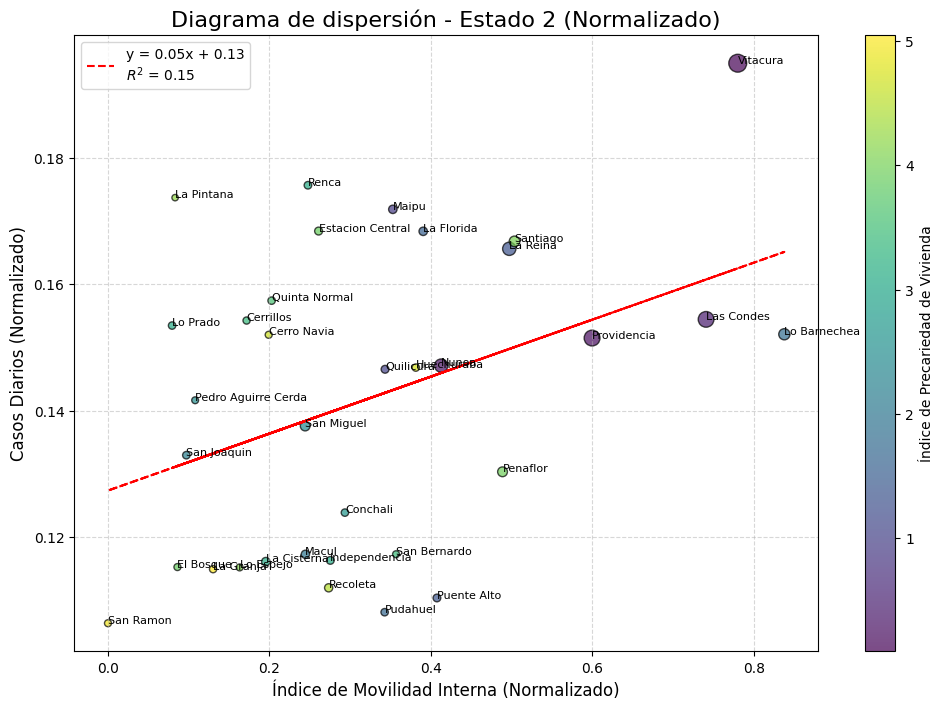

In [ ]:
# Filtrar datos del Estado 2
estado2_data = promedios_por_comuna_estado[promedios_por_comuna_estado['state'] == 2]

# Variables para el gráfico
X = estado2_data['IM_interno_normalizado'].values.reshape(-1, 1)
Y = estado2_data['Casos_Diarios_Brutos_normalizado'].values
sizes = estado2_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
colors = estado2_data['indic_precariedad_vivienda'].values  # Color del punto

# Ajustar una línea de regresión lineal
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calcular R^2
r_squared = model.score(X, Y)
equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"

# Crear el gráfico
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    estado2_data['IM_interno_normalizado'], estado2_data['Casos_Diarios_Brutos_normalizado'],
    s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
)

# Agregar nombres de las comunas
for i, row in estado2_data.iterrows():
    plt.text(row['IM_interno_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)

# Agregar la línea de regresión
plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)

# Configurar colorbar y etiquetas
plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
plt.title('Diagrama de dispersión - Estado 2 (Normalizado)', fontsize=16)
plt.xlabel('Índice de Movilidad Interna (Normalizado)', fontsize=12)
plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
plt.legend(fontsize=10)

# Mostrar el gráfico
plt.grid(alpha=0.5, linestyle='--')
plt.show()


##### Interpretación del gráfico para el Estado 2 (contagios moderados):

Relación entre la movilidad interna y los casos diarios normalizados (línea de tendencia):
- Pendiente positiva (0.05): Existe una relación positiva débil entre el índice de movilidad interna (IM_interno) y los casos diarios normalizados. Esto sugiere que, en promedio, mayor movilidad interna tiende a estar asociada con un aumento en los casos diarios.
- R² = 0.15: El coeficiente de determinación (R²) indica que el modelo lineal explica solo el 15% de la varianza en los casos diarios normalizados. Esto significa que hay otros factores importantes, además de la movilidad interna, que influyen en los casos diarios para este estado.

Distribución por comunas (movilidad y casos diarios):
- Comunidades con alta movilidad interna y menor precariedad: Comunas como Vitacura, Las Condes, Lo Barnechea, y Providencia están hacia el extremo derecho del eje X (mayor IM_interno) y presentan valores relativamente altos en el índice de ingresos per cápita (reflejado en el tamaño de los puntos) y menores índices de precariedad de vivienda (color más púrpura).
Estas comunas muestran casos diarios moderados, indicando que, aunque tienen mayor movilidad interna, las condiciones socioeconómicas podrían estar amortiguando el impacto en los contagios.
- Comunidades con menor movilidad interna: Comunas como San Ramón, El Bosque, y Pedro Aguirre Cerda, ubicadas en el extremo izquierdo del eje X, muestran bajos niveles de movilidad interna (IM_interno). A pesar de esto, algunas tienen índices de precariedad más altos (color verdoso), lo que podría estar relacionado con mayores vulnerabilidades socioeconómicas.

Ingreso per cápita (tamaño del punto):
- Las comunas con mayor ingreso per cápita, como Vitacura, Las Condes, y Lo Barnechea, tienen los puntos más grandes. Estas comunas parecen estar menos afectadas en términos de casos diarios a pesar de su alta movilidad.
- En contraste, comunas como San Ramón, La Granja, y Cerro Navia tienen puntos más pequeños (menor ingreso per cápita), y su precariedad de vivienda tiende a ser mayor (color más verdoso).

Índice de precariedad de vivienda (color del punto):
- Las comunas con mayor índice de precariedad, como Cerro Navia y La Granja, presentan colores verdosos y se concentran en el rango de menor movilidad interna. Estas comunas pueden ser más vulnerables debido a sus condiciones socioeconómicas, lo que puede dificultar el control de los contagios.

Observaciones adicionales:

A diferencia del Estado 1 (contagios severos), aquí la relación entre movilidad y casos no es tan marcada (menor pendiente). Esto sugiere que, en contextos de contagio moderado, otros factores como la densidad poblacional, las medidas sanitarias, y las características sociodemográficas podrían tener un peso mayor en los niveles de casos.

Comunas como San Joaquín, Conchalí, y Recoleta, que están cerca del centro del gráfico, parecen tener un equilibrio entre movilidad interna y casos diarios, con índices de precariedad intermedios.

### 1.3 Correlación de Casos Diarios Brutos con Movilidad Interna para Estado 3 "Contagios Leves"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

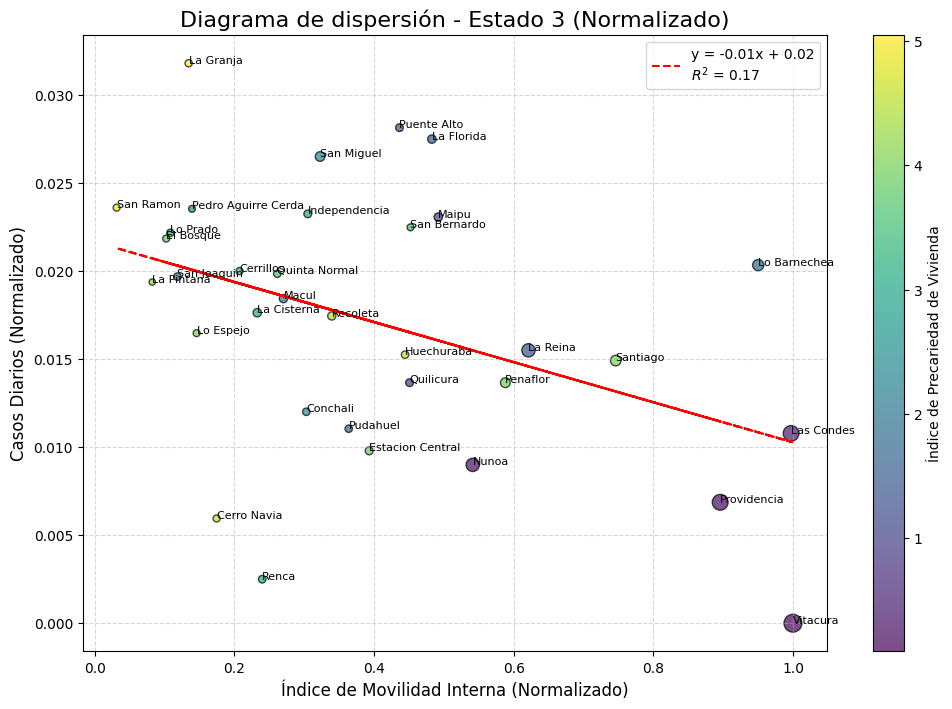

In [ ]:
# Filtrar datos del Estado 3
estado3_data = promedios_por_comuna_estado[promedios_por_comuna_estado['state'] == 3]

# Variables para el gráfico
X = estado3_data['IM_interno_normalizado'].values.reshape(-1, 1)
Y = estado3_data['Casos_Diarios_Brutos_normalizado'].values
sizes = estado3_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
colors = estado3_data['indic_precariedad_vivienda'].values  # Color del punto

# Ajustar una línea de regresión lineal
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calcular R^2
r_squared = model.score(X, Y)
equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"

# Crear el gráfico
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    estado3_data['IM_interno_normalizado'], estado3_data['Casos_Diarios_Brutos_normalizado'],
    s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
)

# Agregar nombres de las comunas
for i, row in estado3_data.iterrows():
    plt.text(row['IM_interno_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)

# Agregar la línea de regresión
plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)

# Configurar colorbar y etiquetas
plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
plt.title('Diagrama de dispersión - Estado 3 (Normalizado)', fontsize=16)
plt.xlabel('Índice de Movilidad Interna (Normalizado)', fontsize=12)
plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
plt.legend(fontsize=10)

# Mostrar el gráfico
plt.grid(alpha=0.5, linestyle='--')
plt.show()


##### Interpretación del gráfico para el Estado 3 (contagios leves):

Relación entre movilidad interna y casos diarios normalizados (línea de tendencia):
- Pendiente negativa (-0.01): Existe una relación ligeramente negativa entre el índice de movilidad interna y los casos diarios normalizados. Esto indica que, en promedio, mayor movilidad interna se asocia con una leve disminución en los casos diarios.
- R² = 0.17: El coeficiente de determinación (R²) muestra que solo el 17% de la varianza en los casos diarios normalizados se explica por la movilidad interna. Esto sugiere que, para las comunas en este estado de contagios leves, otros factores como medidas sanitarias, densidad poblacional, o características específicas de las comunas tienen un rol más relevante.

Distribución por comunas (movilidad y casos diarios):
- Comunidades con alta movilidad interna y menor precariedad: Comunas como Vitacura, Las Condes, Providencia, y Lo Barnechea están en el extremo derecho del eje X (alta movilidad interna). Estas comunas tienen un menor índice de precariedad de vivienda (color púrpura) y presentan los valores más bajos de casos diarios normalizados.
Esto podría reflejar una mejor capacidad para implementar medidas sanitarias o una menor densidad poblacional.
- Comunidades con baja movilidad interna: Comunas como San Ramón, Pedro Aguirre Cerda, y El Bosque tienen baja movilidad interna y colores más verdosos (mayor índice de precariedad de vivienda). Aunque están en el extremo izquierdo del gráfico, sus casos diarios son ligeramente más altos que las comunas con mayor movilidad y menor precariedad.

Ingreso per cápita (tamaño del punto):
- Comunas como Vitacura, Las Condes, y Lo Barnechea tienen puntos más grandes, reflejando un mayor ingreso per cápita. Estas comunas también tienen los valores más bajos de casos diarios y alta movilidad interna.
- Comunas con menores ingresos, como San Ramón, Renca, y La Pintana, tienen puntos más pequeños y se concentran hacia la parte superior del gráfico, indicando una mayor proporción de casos diarios normalizados.

Índice de precariedad de vivienda (color del punto):
- Comunas con mayor índice de precariedad, como San Ramón, La Granja, y Cerro Navia, tienen colores verdosos y presentan casos diarios moderadamente más altos.
- Las comunas con menor índice de precariedad, como Vitacura y Las Condes, tienen colores púrpuras y valores más bajos de casos diarios.

Observaciones adicionales:

La relación negativa (aunque leve) entre movilidad interna y casos diarios podría reflejar que las comunas con mayor movilidad en este estado tienen menos densidad poblacional y mejores condiciones socioeconómicas, lo que ayuda a mitigar los contagios.

Comunas con alta precariedad y bajo ingreso (como San Ramón, La Granja, y Pedro Aguirre Cerda) parecen tener un desafío mayor en mantener los contagios bajos, incluso con niveles más reducidos de movilidad.

## 2. Correlación de Casos Diarios Brutos con Movilidad Externa por cada Estado
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

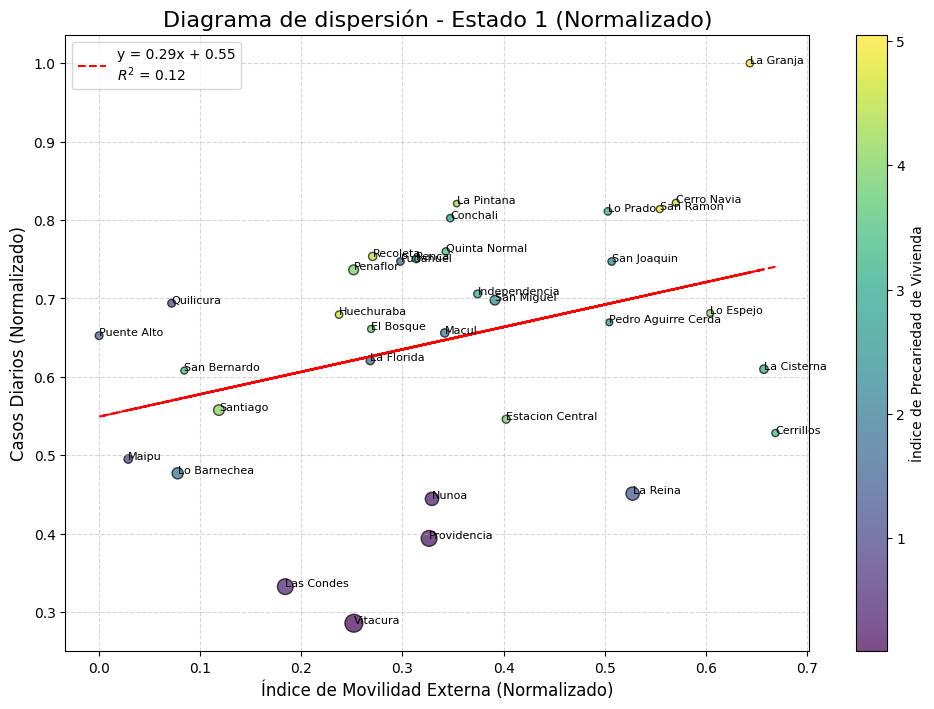

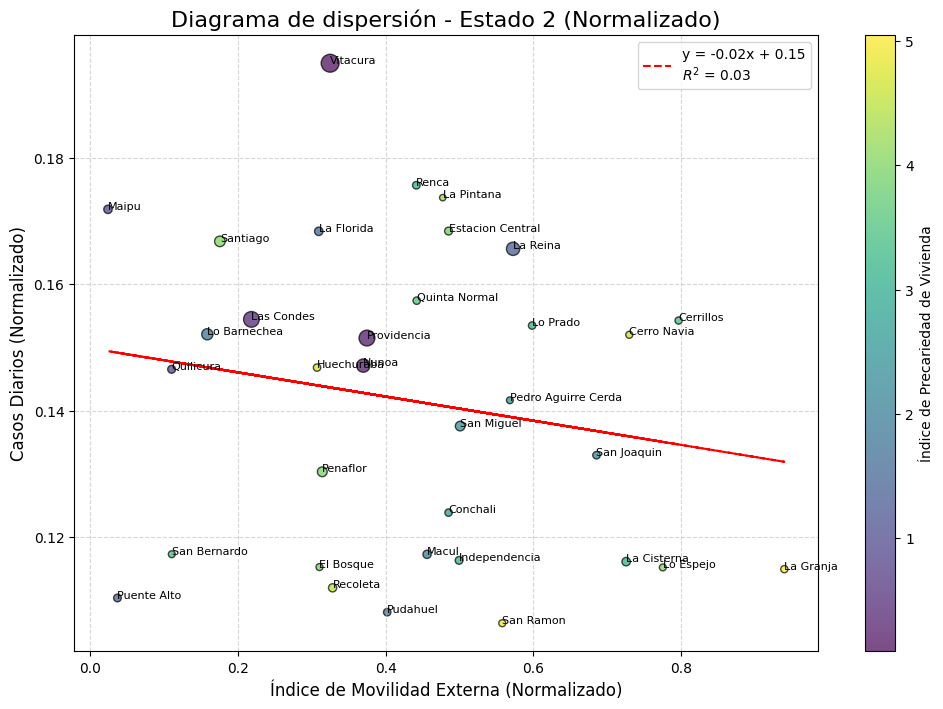

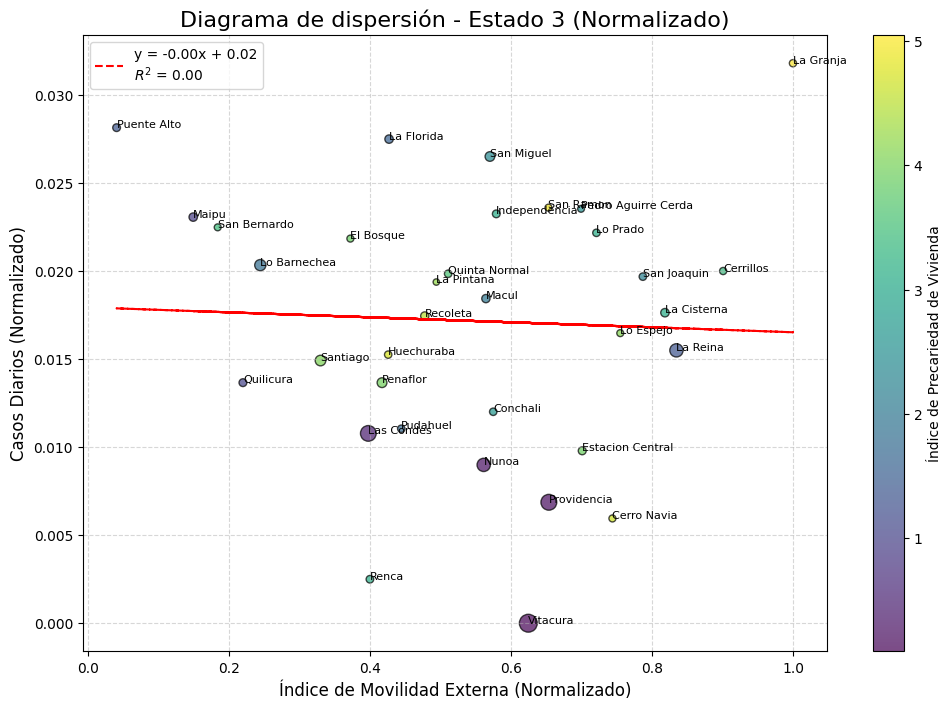

In [ ]:
# Paso 3: Crear diagramas de dispersión para cada estado
for estado in promedios_por_comuna_estado['state'].unique():
    estado_data = promedios_por_comuna_estado[promedios_por_comuna_estado['state'] == estado]

    # Variables para el gráfico
    X = estado_data['IM_externo_normalizado'].values.reshape(-1, 1)
    Y = estado_data['Casos_Diarios_Brutos_normalizado'].values
    sizes = estado_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
    colors = estado_data['indic_precariedad_vivienda'].values  # Color del punto

    # Ajustar una línea de regresión lineal
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)

    # Calcular R^2
    r_squared = model.score(X, Y)
    equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"

    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        estado_data['IM_externo_normalizado'], estado_data['Casos_Diarios_Brutos_normalizado'],
        s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
    )

    # Agregar nombres de las comunas
    for i, row in estado_data.iterrows():
        plt.text(row['IM_externo_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)

    # Agregar la línea de regresión
    plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)

    # Configurar colorbar y etiquetas
    plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
    plt.title(f'Diagrama de dispersión - Estado {int(estado)} (Normalizado)', fontsize=16)
    plt.xlabel('Índice de Movilidad Externa (Normalizado)', fontsize=12)
    plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
    plt.legend(fontsize=10)

    # Mostrar el gráfico
    plt.grid(alpha=0.5, linestyle='--')
    plt.show()

### 2.1 Correlación de Casos Diarios Brutos con Movilidad Externa para Estado 1 "Contagios Severos"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

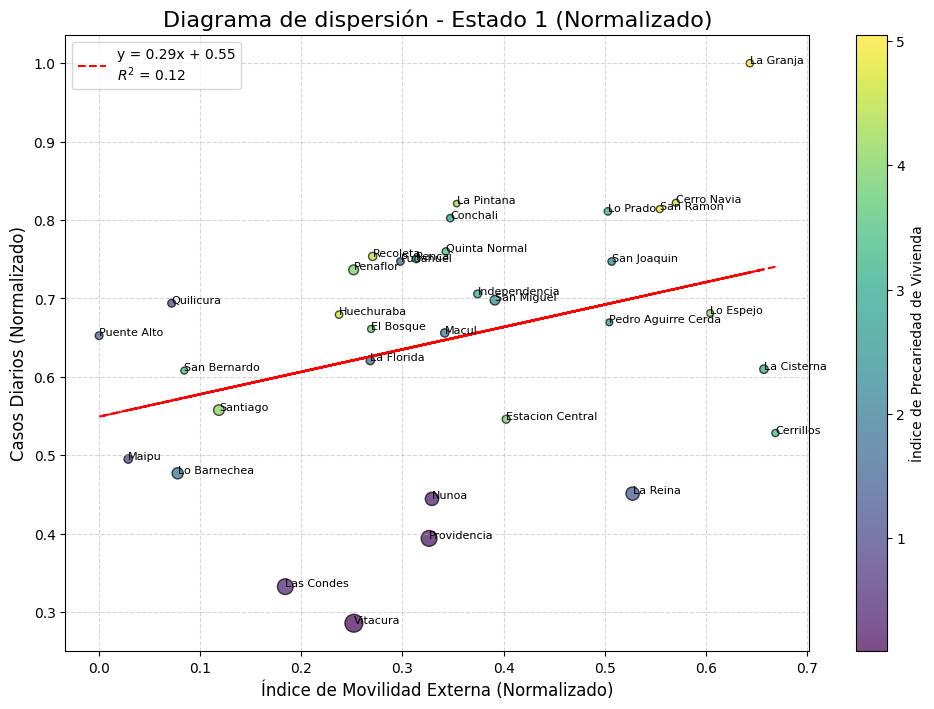

In [ ]:
# Filtrar datos del Estado 1
estado1_data = promedios_por_comuna_estado[promedios_por_comuna_estado['state'] == 1]

# Variables para el gráfico
X = estado1_data['IM_externo_normalizado'].values.reshape(-1, 1)
Y = estado1_data['Casos_Diarios_Brutos_normalizado'].values
sizes = estado1_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
colors = estado1_data['indic_precariedad_vivienda'].values  # Color del punto

# Ajustar una línea de regresión lineal
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calcular R^2
r_squared = model.score(X, Y)
equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"

# Crear el gráfico
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    estado1_data['IM_externo_normalizado'], estado1_data['Casos_Diarios_Brutos_normalizado'],
    s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
)

# Agregar nombres de las comunas
for i, row in estado1_data.iterrows():
    plt.text(row['IM_externo_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)

# Agregar la línea de regresión
plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)

# Configurar colorbar y etiquetas
plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
plt.title('Diagrama de dispersión - Estado 1 (Normalizado)', fontsize=16)
plt.xlabel('Índice de Movilidad Externa (Normalizado)', fontsize=12)
plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
plt.legend(fontsize=10)

# Mostrar el gráfico
plt.grid(alpha=0.5, linestyle='--')
plt.show()


##### Interpretación del gráfico para el Estado 1 (contagios severos)

Relación entre movilidad externa y casos diarios:
- La relación entre la movilidad externa (eje X) y los casos diarios normalizados (eje Y) es positiva y débil, como se observa en la pendiente de la línea de regresión (y=0.29x+0.55) y el coeficiente de determinación (0.12).
- Esto indica que un incremento en la movilidad externa se asocia con un pequeño aumento en los casos diarios normalizados. Sin embargo, la baja varianza explicada (R2=0.12) sugiere que la movilidad externa no es un factor determinante para los casos diarios en este estado.

Índice de precariedad de vivienda (color):
- Comunas con mayores índices de precariedad de vivienda (colores más hacia el amarillo) tienden a estar más dispersas en la gráfica, indicando que estos niveles no se concentran exclusivamente en comunas con alta o baja movilidad externa.
- Algunas comunas como La Granja, San Ramón, y Cerro Navia presentan mayor precariedad y se ubican hacia niveles medios o altos de movilidad externa.

Ingreso per cápita (tamaño de las burbujas):
- Comunas con mayor ingreso per cápita (inc_pc_comuna, burbujas más grandes) como Vitacura, Las Condes, y Providencia presentan tanto baja movilidad externa como baja tasa de casos diarios normalizados.
- En contraste, comunas de menores ingresos (burbujas más pequeñas) como La Granja, San Ramón, y Cerro Navia están asociadas con valores más altos tanto en movilidad externa como en casos diarios.

Observaciones específicas:

- Vitacura y Las Condes destacan como comunas con ingresos altos, baja precariedad de vivienda, y baja movilidad externa, mostrando un comportamiento diferenciado del resto.
- La Granja, una comuna con mayor precariedad, se encuentra hacia la esquina superior izquierda, lo que sugiere un alto nivel de casos normalizados en comparación con su nivel de movilidad externa.

Conclusión general para el estado 1:

En este estado de contagios severos, aunque hay una ligera relación positiva entre la movilidad externa y los casos diarios, la precariedad de vivienda y el ingreso per cápita parecen desempeñar roles más significativos al determinar las diferencias entre comunas. Esto se refleja en la dispersión de las burbujas en términos de tamaño (ingreso) y color (precariedad).

### 2.2 Correlación de Casos Diarios Brutos con Movilidad Externa para Estado 2 "Contagios Moderados"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

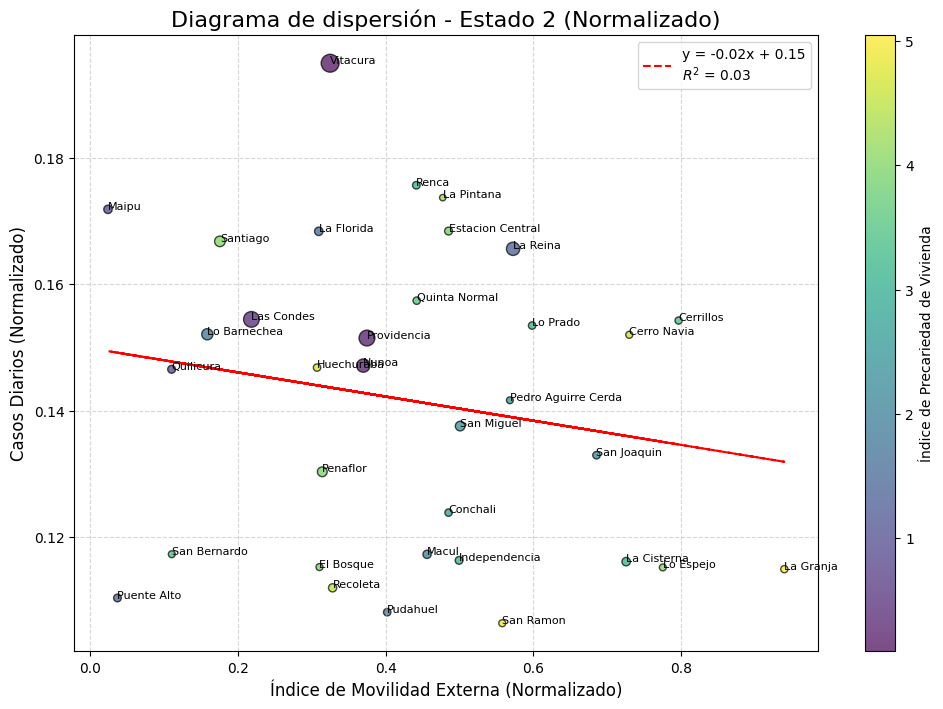

In [ ]:
# Filtrar datos del Estado 2
estado2_data = promedios_por_comuna_estado[promedios_por_comuna_estado['state'] == 2]

# Variables para el gráfico
X = estado2_data['IM_externo_normalizado'].values.reshape(-1, 1)
Y = estado2_data['Casos_Diarios_Brutos_normalizado'].values
sizes = estado2_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
colors = estado2_data['indic_precariedad_vivienda'].values  # Color del punto

# Ajustar una línea de regresión lineal
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calcular R^2
r_squared = model.score(X, Y)
equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"

# Crear el gráfico
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    estado2_data['IM_externo_normalizado'], estado2_data['Casos_Diarios_Brutos_normalizado'],
    s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
)

# Agregar nombres de las comunas
for i, row in estado2_data.iterrows():
    plt.text(row['IM_externo_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)

# Agregar la línea de regresión
plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)

# Configurar colorbar y etiquetas
plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
plt.title('Diagrama de dispersión - Estado 2 (Normalizado)', fontsize=16)
plt.xlabel('Índice de Movilidad Externa (Normalizado)', fontsize=12)
plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
plt.legend(fontsize=10)

# Mostrar el gráfico
plt.grid(alpha=0.5, linestyle='--')
plt.show()


##### Interpretación del gráfico para el Estado 2 (contagios moderados)

Relación entre movilidad externa y casos diarios:
- La relación entre la movilidad externa (eje X) y los casos diarios normalizados (eje Y) es ligeramente negativa y muy débil.
- Esto indica que, en promedio, un aumento en la movilidad externa está asociado con una disminución muy leve en los casos diarios normalizados. Sin embargo, la relación es casi inexistente debido a la baja varianza explicada.

Índice de precariedad de vivienda (color):
- Las comunas con mayores índices de precariedad de vivienda (colores más hacia el amarillo) como La Granja, Renca, y Cerro Navia, tienden a ubicarse en niveles medios o bajos de movilidad externa.
- Comunas con menor precariedad (colores más hacia el morado), como Vitacura, Providencia, y Las Condes, tienen una movilidad externa más alta en promedio.

Ingreso per cápita (tamaño de las burbujas):
- Comunas con mayor ingreso per cápita (inc_pc_comuna, burbujas más grandes) como Vitacura, Las Condes, y Providencia presentan alta movilidad externa y niveles moderados de casos diarios normalizados.
- En contraste, comunas de menores ingresos (burbujas más pequeñas) como La Granja, San Ramón, y Cerro Navia tienen niveles moderados o bajos de movilidad externa, pero una mayor dispersión en casos diarios.

Observaciones específicas:
- Vitacura tiene la mayor burbuja (más alto ingreso per cápita), aunque presenta una baja tasa de precariedad de vivienda y no es la comuna con mayor movilidad externa.
- La Granja se ubica en el cuadrante inferior izquierdo, lo que refleja un índice alto de precariedad de vivienda y baja movilidad externa.

Conclusión general para el estado 2:

En este estado de contagios moderados, la movilidad externa no parece tener un impacto directo significativo sobre los casos diarios (relación débil).
La precariedad de vivienda y el ingreso per cápita muestran patrones más claros, donde comunas con mayor ingreso y menor precariedad tienden a tener mayores niveles de movilidad externa. Por el contrario, comunas con menor ingreso y mayor precariedad tienden a mostrar baja movilidad externa.

### 2.3 Correlación de Casos Diarios Brutos con Movilidad Externa para Estado 3 "Contagios Leves"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

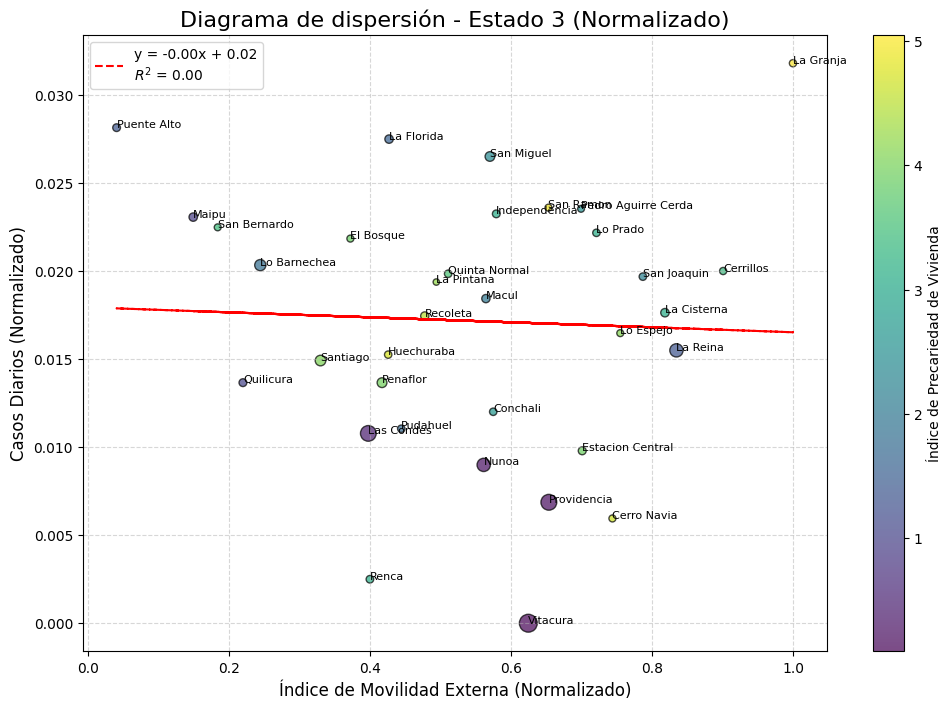

In [ ]:
# Filtrar datos del Estado 3
estado3_data = promedios_por_comuna_estado[promedios_por_comuna_estado['state'] == 3]

# Variables para el gráfico
X = estado3_data['IM_externo_normalizado'].values.reshape(-1, 1)
Y = estado3_data['Casos_Diarios_Brutos_normalizado'].values
sizes = estado3_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
colors = estado3_data['indic_precariedad_vivienda'].values  # Color del punto

# Ajustar una línea de regresión lineal
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calcular R^2
r_squared = model.score(X, Y)
equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"

# Crear el gráfico
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    estado3_data['IM_externo_normalizado'], estado3_data['Casos_Diarios_Brutos_normalizado'],
    s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
)

# Agregar nombres de las comunas
for i, row in estado3_data.iterrows():
    plt.text(row['IM_externo_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)

# Agregar la línea de regresión
plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)

# Configurar colorbar y etiquetas
plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
plt.title('Diagrama de dispersión - Estado 3 (Normalizado)', fontsize=16)
plt.xlabel('Índice de Movilidad Externa (Normalizado)', fontsize=12)
plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
plt.legend(fontsize=10)

# Mostrar el gráfico
plt.grid(alpha=0.5, linestyle='--')
plt.show()


##### Interpretación del gráfico para el Estado 3 (contagios leves)

Relación global entre movilidad externa y casos diarios:
- La relación entre la movilidad externa y los casos diarios en el Estado 3 es prácticamente nula, indicando que no existe una correlación entre ambas variables.
- La línea de tendencia tiene una pendiente casi horizontal, lo que sugiere que la movilidad externa no tiene un impacto directo en los casos diarios en este estado.

Distribución según condiciones socioeconómicas:
- Comunas con bajo índice de precariedad de vivienda y alto ingreso per cápita (burbujas grandes y colores morados) como Vitacura, Providencia, y Las Condes, se agrupan en niveles moderados o altos de movilidad externa, con tasas bajas de casos diarios.
- Comunas más vulnerables, como La Granja, San Ramón, y Lo Espejo, tienen índices altos de precariedad (amarillos), pero no muestran un patrón claro con respecto a la movilidad externa ni a los casos diarios.

Patrones destacados:
- Vitacura y Providencia tienen una alta movilidad externa, bajos casos diarios, y las menores tasas de precariedad de vivienda.
- La Granja, con alta precariedad de vivienda, aparece aislada con una tasa relativamente alta de casos diarios, a pesar de su baja movilidad externa.
- Comunas como Renca y Cerro Navia, con condiciones de alta vulnerabilidad, muestran tanto baja movilidad externa como bajas tasas de casos diarios en este estado.

Conclusiones:

En el Estado 3 (contagios leves), la movilidad externa no juega un rol importante en los casos diarios.
Las características socioeconómicas como el ingreso per cápita y la precariedad de vivienda parecen influir más en la dispersión de los casos, aunque el patrón no es consistente para todas las comunas.
Este estado sugiere una estabilización en las tasas de casos diarios, donde otros factores, como las medidas de control o dinámicas comunitarias, podrían ser más relevantes que la movilidad.

### Correlación entre Covariables y Probabilidades de Transición Códigos Opción 1
#### *Recordar que estado 1 es severo (heatmap secuencia viterbi centro azul), estado 2 es moderado (heatmap rojo), estado 1 es leve (en heatmap extremos color verde).*

In [ ]:
# Reestructurar transition_matrix para obtener probabilidades de transición por muestra
n_samples, n_states, _ = transition_matrix.shape

# Remapear índices de los estados
transitions_list = []
for t in range(n_samples):
    for i in range(n_states):
        for j in range(n_states):
            transitions_list.append({
                "sample": t,
                f"Trans_{i+1}->{j+1}": transition_matrix[t, i, j]  # Remapear 0->1, 1->2, 2->3
            })

# Convertir a DataFrame
transitions_df = pd.DataFrame(transitions_list).groupby("sample").mean().reset_index(drop=True)

print("Transiciones estructuradas:")
print(transitions_df.head())


Transiciones estructuradas:
   Trans_1->1  Trans_1->2    Trans_1->3  Trans_2->1  Trans_2->2  Trans_2->3  \
0    0.998081    0.010618  1.002179e-09    0.001919    0.987952    0.007742   
1    0.999127    0.017619  1.700577e-09    0.000873    0.981643    0.008880   
2    0.999760    0.037652  3.891809e-09    0.000240    0.962112    0.010147   
3    0.996715    0.012694  9.821790e-10    0.003285    0.984042    0.015390   
4    0.999944    0.109606  1.173756e-08    0.000056    0.890319    0.017357   

     Trans_3->1  Trans_3->2  Trans_3->3  
0  1.770769e-15    0.001430    0.992258  
1  8.774029e-17    0.000738    0.991120  
2  7.111755e-19    0.000236    0.989853  
3  4.957473e-15    0.003264    0.984610  
4  1.846976e-21    0.000074    0.982643  


In [ ]:
# Seleccionar covariables relevantes
covariates_df = viterbi_combined[[
    'IM_interno', 'IM_externo',
    'inc_pc_comuna', 'Personas_hogar_promedio', 'inmigrantes',
    'total_hog_hacinados', 'indic_precariedad_vivienda',
    'por_educ_sup', 'IPS_2020'
]].reset_index(drop=True)

# Combinar con transiciones
analysis_df = pd.concat([covariates_df, transitions_df], axis=1)
print("Datos combinados para análisis:")
print(analysis_df.head())


Datos combinados para análisis:
   IM_interno  IM_externo  inc_pc_comuna  Personas_hogar_promedio  \
0    1.845790    7.471452      267197.56                 3.145581   
1    1.678598    6.891732      267197.56                 3.145581   
2    1.736766    8.317872      267197.56                 3.145581   
3    1.331296    6.378498      267197.56                 3.145581   
4    1.085644    5.080224      267197.56                 3.145581   

   inmigrantes  total_hog_hacinados  indic_precariedad_vivienda  por_educ_sup  \
0       3606.0              68120.0                    3.395792          11.9   
1       3606.0              68120.0                    3.395792          11.9   
2       3606.0              68120.0                    3.395792          11.9   
3       3606.0              68120.0                    3.395792          11.9   
4       3606.0              68120.0                    3.395792          11.9   

   IPS_2020  Trans_1->1  Trans_1->2    Trans_1->3  Trans_2->1  Tra

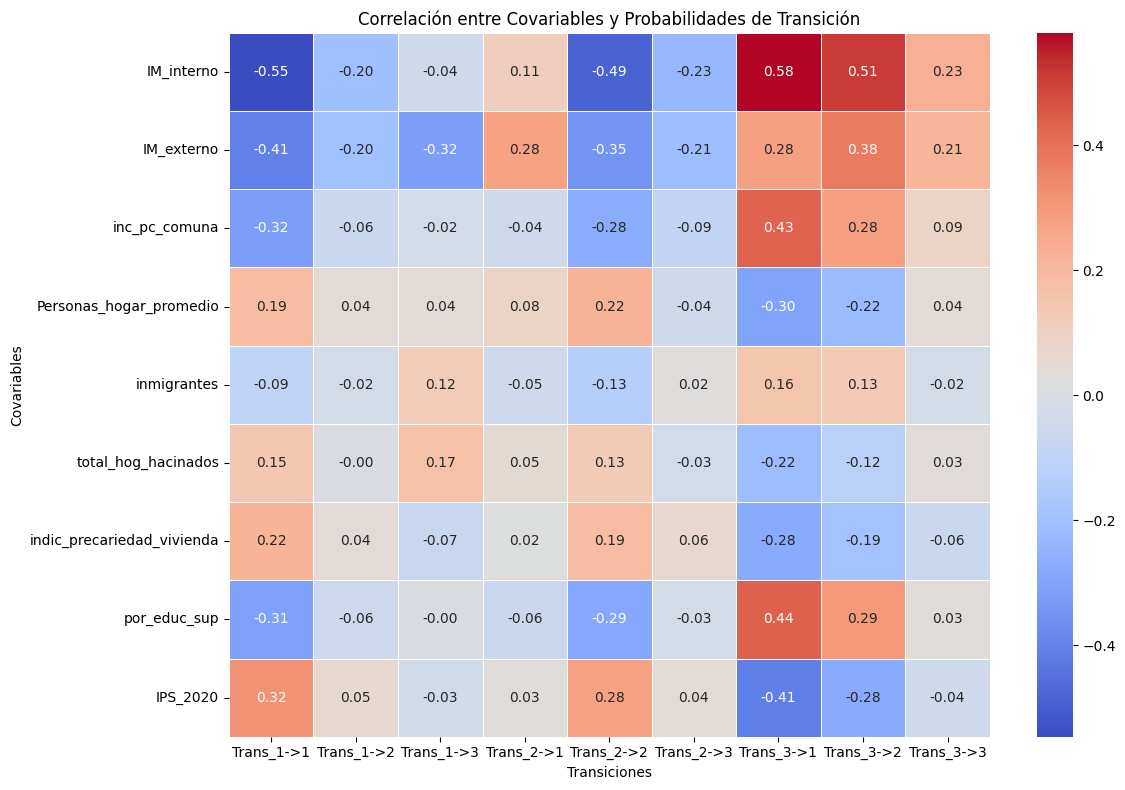

In [ ]:
# Calcular la matriz de correlación
correlaciones = analysis_df.corr().loc[
    covariates_df.columns,
    transitions_df.columns
]

# Visualizar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlación entre Covariables y Probabilidades de Transición")
plt.xlabel("Transiciones")
plt.ylabel("Covariables")
plt.tight_layout()
plt.show()


In [ ]:
# Crear lista para almacenar las transiciones
transiciones = []

# Recorrer todas las matrices de transición generadas
for idx, matriz in enumerate(transition_matrix):
    for from_state in range(len(matriz)):
        for to_state in range(len(matriz[from_state])):
            transiciones.append({
                'Día_original': base_final.iloc[idx]['dias'],  # Día original en la base final
                'Día_correlativo': idx,  # Índice o día correlativo generado
                'Comuna': base_final.iloc[idx]['Comuna'],  # Comuna asociada al día
                'from_state': from_state + 1,  # Estado origen (ajustar a 1, 2, 3)
                'to_state': to_state + 1,     # Estado destino (ajustar a 1, 2, 3)
                'probability': matriz[from_state][to_state]
            })

# Convertir lista a DataFrame
transiciones_df = pd.DataFrame(transiciones)

# Crear columnas de transiciones (e.g., Trans_1->2)
transiciones_df['Transición'] = (
    "Trans_" + transiciones_df['from_state'].astype(str) + "->" + transiciones_df['to_state'].astype(str)
)

# Pivotear para tener las transiciones como columnas
transiciones_df = transiciones_df.pivot(
    index=['Comuna', 'Día_original', 'Día_correlativo'],  # Agregar ambas referencias de día
    columns='Transición',
    values='probability'
).reset_index()

# Inspeccionar el DataFrame de transiciones
print("DataFrame de transiciones actualizado:")
print(transiciones_df.head())


DataFrame de transiciones actualizado:
Transición     Comuna  Día_original  Día_correlativo  Trans_1->1  Trans_1->2  \
0           Cerrillos             2                0    0.998081    0.010618   
1           Cerrillos             3                1    0.999127    0.017619   
2           Cerrillos             4                2    0.999760    0.037652   
3           Cerrillos             5                3    0.996715    0.012694   
4           Cerrillos             6                4    0.999944    0.109606   

Transición    Trans_1->3  Trans_2->1  Trans_2->2  Trans_2->3    Trans_3->1  \
0           1.002179e-09    0.001919    0.987952    0.007742  1.770769e-15   
1           1.700577e-09    0.000873    0.981643    0.008880  8.774029e-17   
2           3.891809e-09    0.000240    0.962112    0.010147  7.111755e-19   
3           9.821790e-10    0.003285    0.984042    0.015390  4.957473e-15   
4           1.173756e-08    0.000056    0.890319    0.017357  1.846976e-21   

Transición 

In [ ]:
# Convertir las transiciones en formato "long"
transiciones_long = pd.melt(
    transiciones_df,
    id_vars=['Comuna', 'Día_original', 'Día_correlativo'],  # Incluir ambas columnas de días
    value_vars=['Trans_1->1', 'Trans_1->2', 'Trans_1->3',
                'Trans_2->1', 'Trans_2->2', 'Trans_2->3',
                'Trans_3->1', 'Trans_3->2', 'Trans_3->3'],
    var_name='Transición',
    value_name='Probabilidad_Transición'
)

# Realizar el merge para agregar las covariables desde base_final
glmm_data = transiciones_long.merge(
    base_final[['Comuna', 'dias', 'IM_interno', 'IM_externo', 'TasaCasosAcumulados',
                'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7', 'inc_pc_comuna',
                'Personas_hogar_promedio', 'inmigrantes', 'total_hog_hacinados',
                'indic_precariedad_vivienda', 'por_educ_sup', 'IPS_2020']],
    left_on=['Comuna', 'Día_original'],  # Usar Día_original para coincidir con base_final
    right_on=['Comuna', 'dias'],         # La columna en base_final es 'dias'
    how='left'
)

# Inspeccionar el resultado
print("Datos preparados para GLMM (en formato long con covariables adicionales):")
print(glmm_data.head())


Datos preparados para GLMM (en formato long con covariables adicionales):
      Comuna  Día_original  Día_correlativo  Transición  \
0  Cerrillos             2                0  Trans_1->1   
1  Cerrillos             3                1  Trans_1->1   
2  Cerrillos             4                2  Trans_1->1   
3  Cerrillos             5                3  Trans_1->1   
4  Cerrillos             6                4  Trans_1->1   

   Probabilidad_Transición  dias  IM_interno  IM_externo  TasaCasosAcumulados  \
0                 0.998081     2    1.970381    7.804008             2.248303   
1                 0.999127     3    1.845790    7.471452             4.496605   
2                 0.999760     4    1.678598    6.891732             4.496605   
3                 0.996715     5    1.736766    8.317872             4.496605   
4                 0.999944     6    1.331296    6.378498             4.496605   

   Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  inc_pc_comuna  \
0              2

In [ ]:
glmm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65484 entries, 0 to 65483
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Comuna                      65484 non-null  object 
 1   Día_original                65484 non-null  int64  
 2   Día_correlativo             65484 non-null  int64  
 3   Transición                  65484 non-null  object 
 4   Probabilidad_Transición     65484 non-null  float64
 5   dias                        65484 non-null  int64  
 6   IM_interno                  65484 non-null  float64
 7   IM_externo                  65484 non-null  float64
 8   TasaCasosAcumulados         65484 non-null  float64
 9   Casos_Diarios_Brutos        65484 non-null  float64
 10  Casos_Diarios_Brutos_MM7    65484 non-null  float64
 11  inc_pc_comuna               65484 non-null  float64
 12  Personas_hogar_promedio     65484 non-null  float64
 13  inmigrantes                 654

Dimensiones del DataFrame:

Total de 65,484 filas y 18 columnas. Esto concuerda con el hecho de que estamos trabajando con múltiples transiciones (9 transiciones por día por comuna).
Columnas importantes:

Probabilidad_Transición contiene valores no nulos, asegurando que las transiciones están bien representadas.
Las covariables (IM_interno, IM_externo, etc.) se han añadido correctamente y no tienen valores nulos, lo que asegura que el merge fue exitoso.
Estructura en formato long:

Transición: especifica la transición (e.g., Trans_1->2).
Probabilidad_Transición: da la probabilidad asociada.
Día_original y Día_correlativo: están correctamente registradas, lo que permitirá un análisis más flexible.
Uso de memoria:

La memoria utilizada (9 MB) es manejable, pero podría optimizarse si fuera necesario (e.g., usando dtypes más compactos para enteros).

In [ ]:
# Guardar el DataFrame en un archivo CSV
glmm_data.to_csv('/Users/constanzaneiraurrutia/Desktop/ESCRITORIO/MAGÍSTER DATA SCIENCE/SEXTO TRIMESTRE/TESIS MAGÍSTER DATA SCIENCE/DATOS BASE/glmm_data_preparado.csv', index=False)

print("El DataFrame ha sido guardado como 'glmm_data_preparado.csv'.")


El DataFrame ha sido guardado como 'glmm_data_preparado.csv'.


In [ ]:
# Resumen estadístico de las columnas numéricas
print("Resumen estadístico de las variables numéricas:")
print(glmm_data.describe())

# Mostrar una muestra aleatoria de filas del DataFrame
print("\nMuestra aleatoria de filas del DataFrame:")
print(glmm_data.sample(10))


Resumen estadístico de las variables numéricas:
       Día_original  Día_correlativo  Probabilidad_Transición          dias  \
count  65484.000000     65484.000000             6.548400e+04  65484.000000   
mean     108.500000      3637.500000             3.333333e-01    108.500000   
std       61.776276      2100.416297             4.359384e-01     61.776276   
min        2.000000         0.000000             2.338512e-42      2.000000   
25%       55.000000      1818.750000             1.685681e-04     55.000000   
50%      108.500000      3637.500000             2.020594e-02    108.500000   
75%      162.000000      5456.250000             9.421795e-01    162.000000   
max      215.000000      7275.000000             1.000000e+00    215.000000   

         IM_interno    IM_externo  TasaCasosAcumulados  Casos_Diarios_Brutos  \
count  65484.000000  65484.000000         65484.000000          65484.000000   
mean       3.550772      5.473862          2568.521013             19.801462   


### Correlación entre Índice de Movilidad Interno y Probabilidad de Transición

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

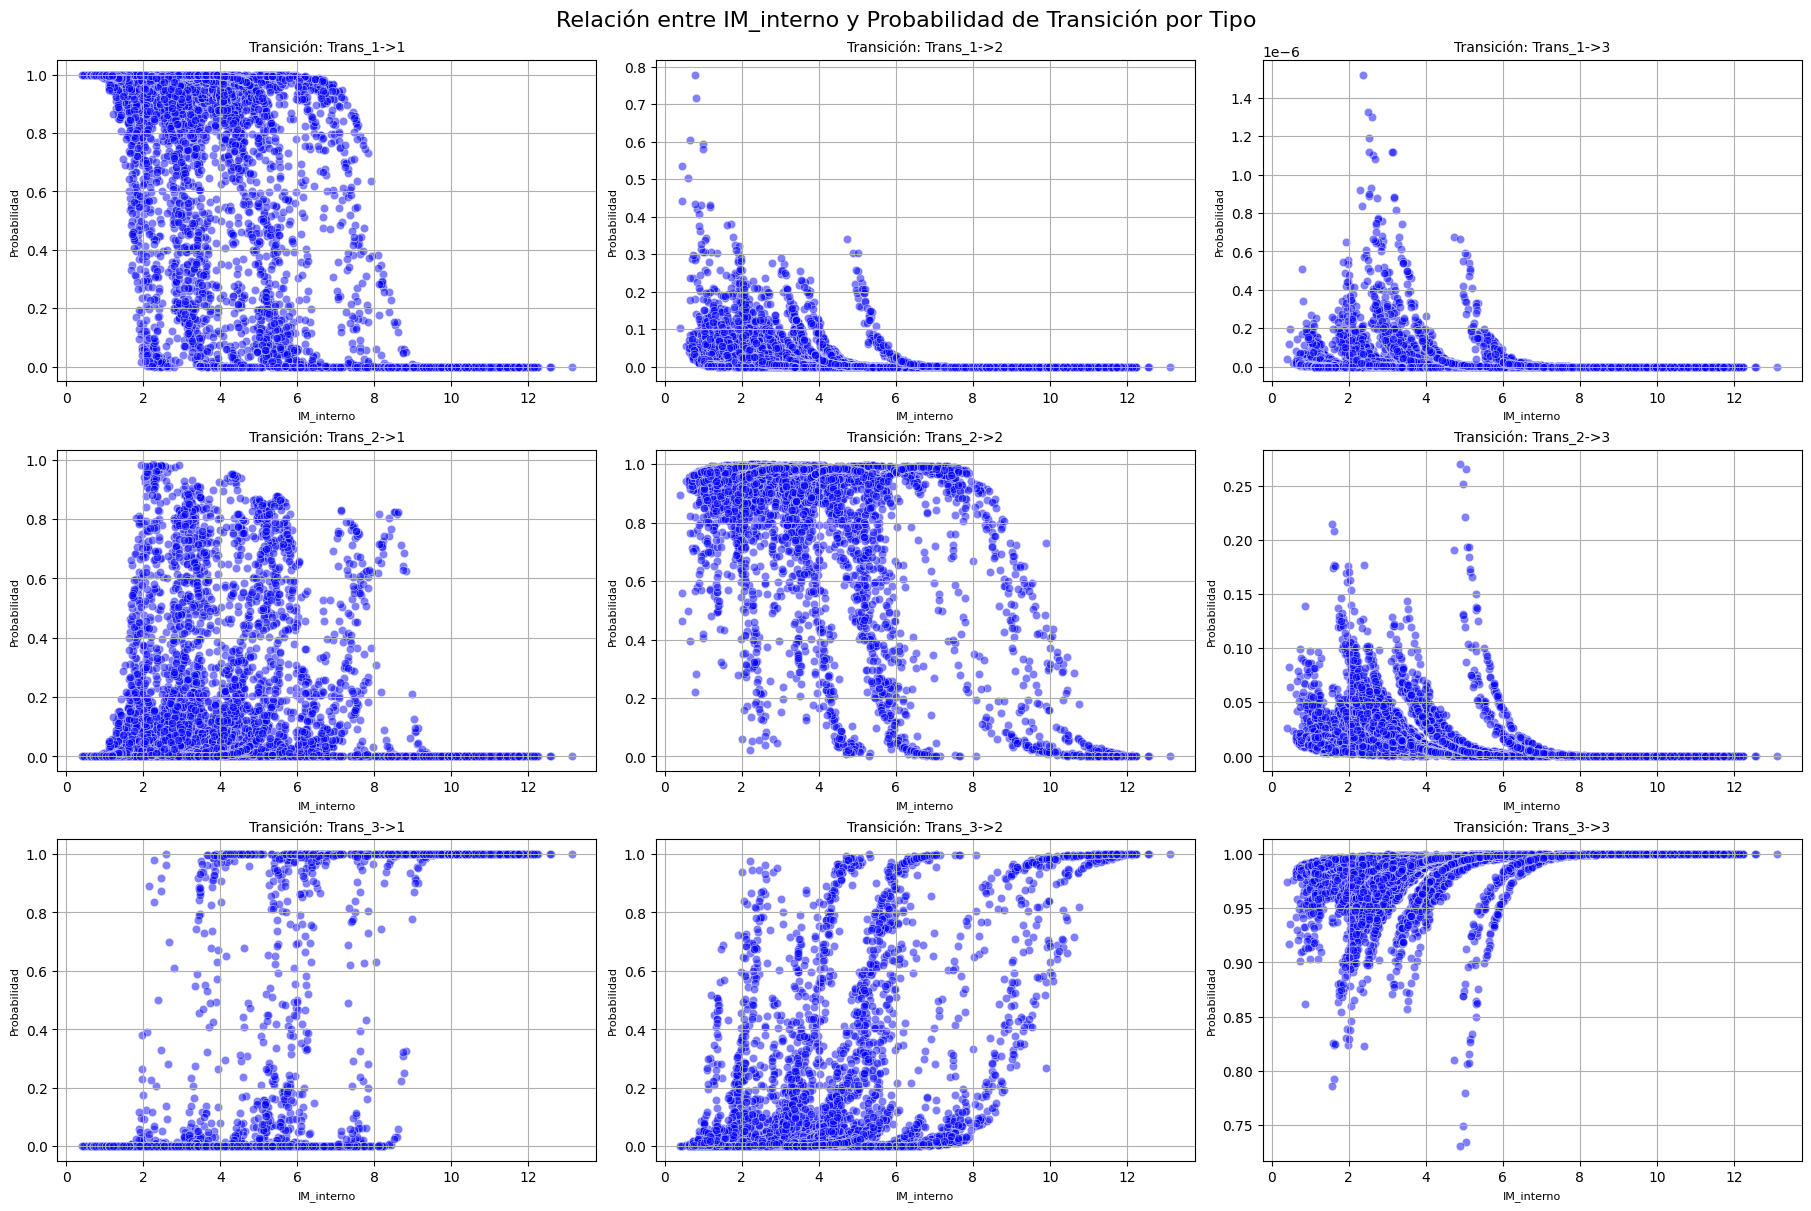

In [ ]:
# Lista de transiciones únicas
transiciones_unicas = glmm_data['Transición'].unique()

# Configurar la figura con subplots
num_transiciones = len(transiciones_unicas)
fig, axes = plt.subplots(
    nrows=(num_transiciones + 2) // 3,  # Filas (3 gráficos por fila)
    ncols=3,  # Columnas
    figsize=(18, 12),
    constrained_layout=True
)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos separados por transición
for i, transicion in enumerate(transiciones_unicas):
    sns.scatterplot(
        data=glmm_data[glmm_data['Transición'] == transicion],
        x='IM_interno',
        y='Probabilidad_Transición',
        alpha=0.5,
        color='blue',
        ax=axes[i]
    )
    axes[i].set_title(f'Transición: {transicion}', fontsize=10)
    axes[i].set_xlabel('IM_interno', fontsize=8)
    axes[i].set_ylabel('Probabilidad', fontsize=8)
    axes[i].grid(True)

# Deshabilitar los subplots vacíos si hay más ejes que gráficos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Título general
fig.suptitle('Relación entre IM_interno y Probabilidad de Transición por Tipo', fontsize=16)
plt.show()




In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Guardar resultados de correlación y significancia
resultados_correlacion = []

# Calcular correlaciones por transición
for transicion in glmm_data['Transición'].unique():
    # Filtrar datos por transición
    datos_transicion = glmm_data[glmm_data['Transición'] == transicion]

    # Calcular correlación y p-value
    corr, p_value = pearsonr(datos_transicion['IM_interno'], datos_transicion['Probabilidad_Transición'])

    # Guardar resultados
    resultados_correlacion.append({
        'Transición': transicion,
        'Correlación': corr,
        'p_value': p_value,
        'Significativo': p_value < 0.05  # Significancia a nivel 0.05
    })

# Convertir resultados a DataFrame
correlaciones_significativas = pd.DataFrame(resultados_correlacion)

# Mostrar resultados
print("Resultados de correlación y significancia:")
print(correlaciones_significativas)


Resultados de correlación y significancia:
   Transición  Correlación        p_value  Significativo
0  Trans_1->1    -0.608272   0.000000e+00           True
1  Trans_1->2    -0.259259  4.479757e-112           True
2  Trans_1->3    -0.106107   1.137761e-19           True
3  Trans_2->1     0.128575   3.372432e-28           True
4  Trans_2->2    -0.539745   0.000000e+00           True
5  Trans_2->3    -0.297109  3.349670e-148           True
6  Trans_3->1     0.641456   0.000000e+00           True
7  Trans_3->2     0.575041   0.000000e+00           True
8  Trans_3->3     0.297108  3.351500e-148           True


Resultados clave por transición:

Trans_1->1:
- Correlación: -0.608
- Interpretación: Fuerte relación negativa. Un mayor IM_interno está asociado con una menor probabilidad de mantenerse en el estado 1.
- p_value: Muy significativo (p ≈ 0).

Trans_1->2:
- Correlación: -0.259
- Interpretación: Relación negativa moderada. A medida que el IM_interno aumenta, es menos probable pasar del estado 1 al estado 2.
- p_value: Muy significativo.

Trans_1->3:
- Correlación: -0.106
- Interpretación: Relación negativa débil. El IM_interno tiene poca influencia sobre la transición del estado 1 al estado 3.
- p_value: Muy significativo.

Trans_2->1:
- Correlación: 0.129
- Interpretación: Relación positiva débil. A medida que el IM_interno aumenta, hay una ligera tendencia a pasar del estado 2 al estado 1.
- p_value: Muy significativo.

Trans_2->2:
- Correlación: -0.540
- Interpretación: Relación negativa fuerte. Un mayor IM_interno está asociado con una menor probabilidad de permanecer en el estado 2.
p_value: Muy significativo.

Trans_2->3:
- Correlación: -0.297
- Interpretación: Relación negativa moderada. A medida que el IM_interno aumenta, es menos probable pasar del estado 2 al estado 3.
- p_value: Muy significativo.

Trans_3->1:
- Correlación: 0.641
- Interpretación: Relación positiva fuerte. Un mayor IM_interno está asociado con una mayor probabilidad de pasar del estado 3 al estado 1.
- p_value: Muy significativo.

Trans_3->2:
- Correlación: 0.575
- Interpretación: Relación positiva fuerte. Un mayor IM_interno está asociado con una mayor probabilidad de pasar del estado 3 al estado 2.
- p_value: Muy significativo.

Trans_3->3:
- Correlación: 0.297
Interpretación: Relación positiva moderada. A medida que el IM_interno aumenta, es más probable permanecer en el estado 3.
- p_value: Muy significativo.

Conclusiones:
- Las transiciones dentro del estado 3 (Trans_3->1, Trans_3->2, Trans_3->3) muestran fuertes correlaciones positivas con IM_interno. Esto sugiere que un mayor índice interno fomenta transiciones desde y dentro del estado 3.
- Las transiciones desde el estado 2 (Trans_2->1, Trans_2->2, Trans_2->3) tienen correlaciones débiles a moderadas con IM_interno.
- Las transiciones dentro y desde el estado 1 tienen correlaciones negativas, aunque con distintas magnitudes. Esto implica que un mayor IM_interno reduce la probabilidad de permanecer o moverse desde el estado 1.

Estos hallazgos podrían tener implicaciones importantes para entender el efecto del índice interno en los patrones de transición.

### Correlación entre Índice de Movilidad Externo y Probabilidad de Transición

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

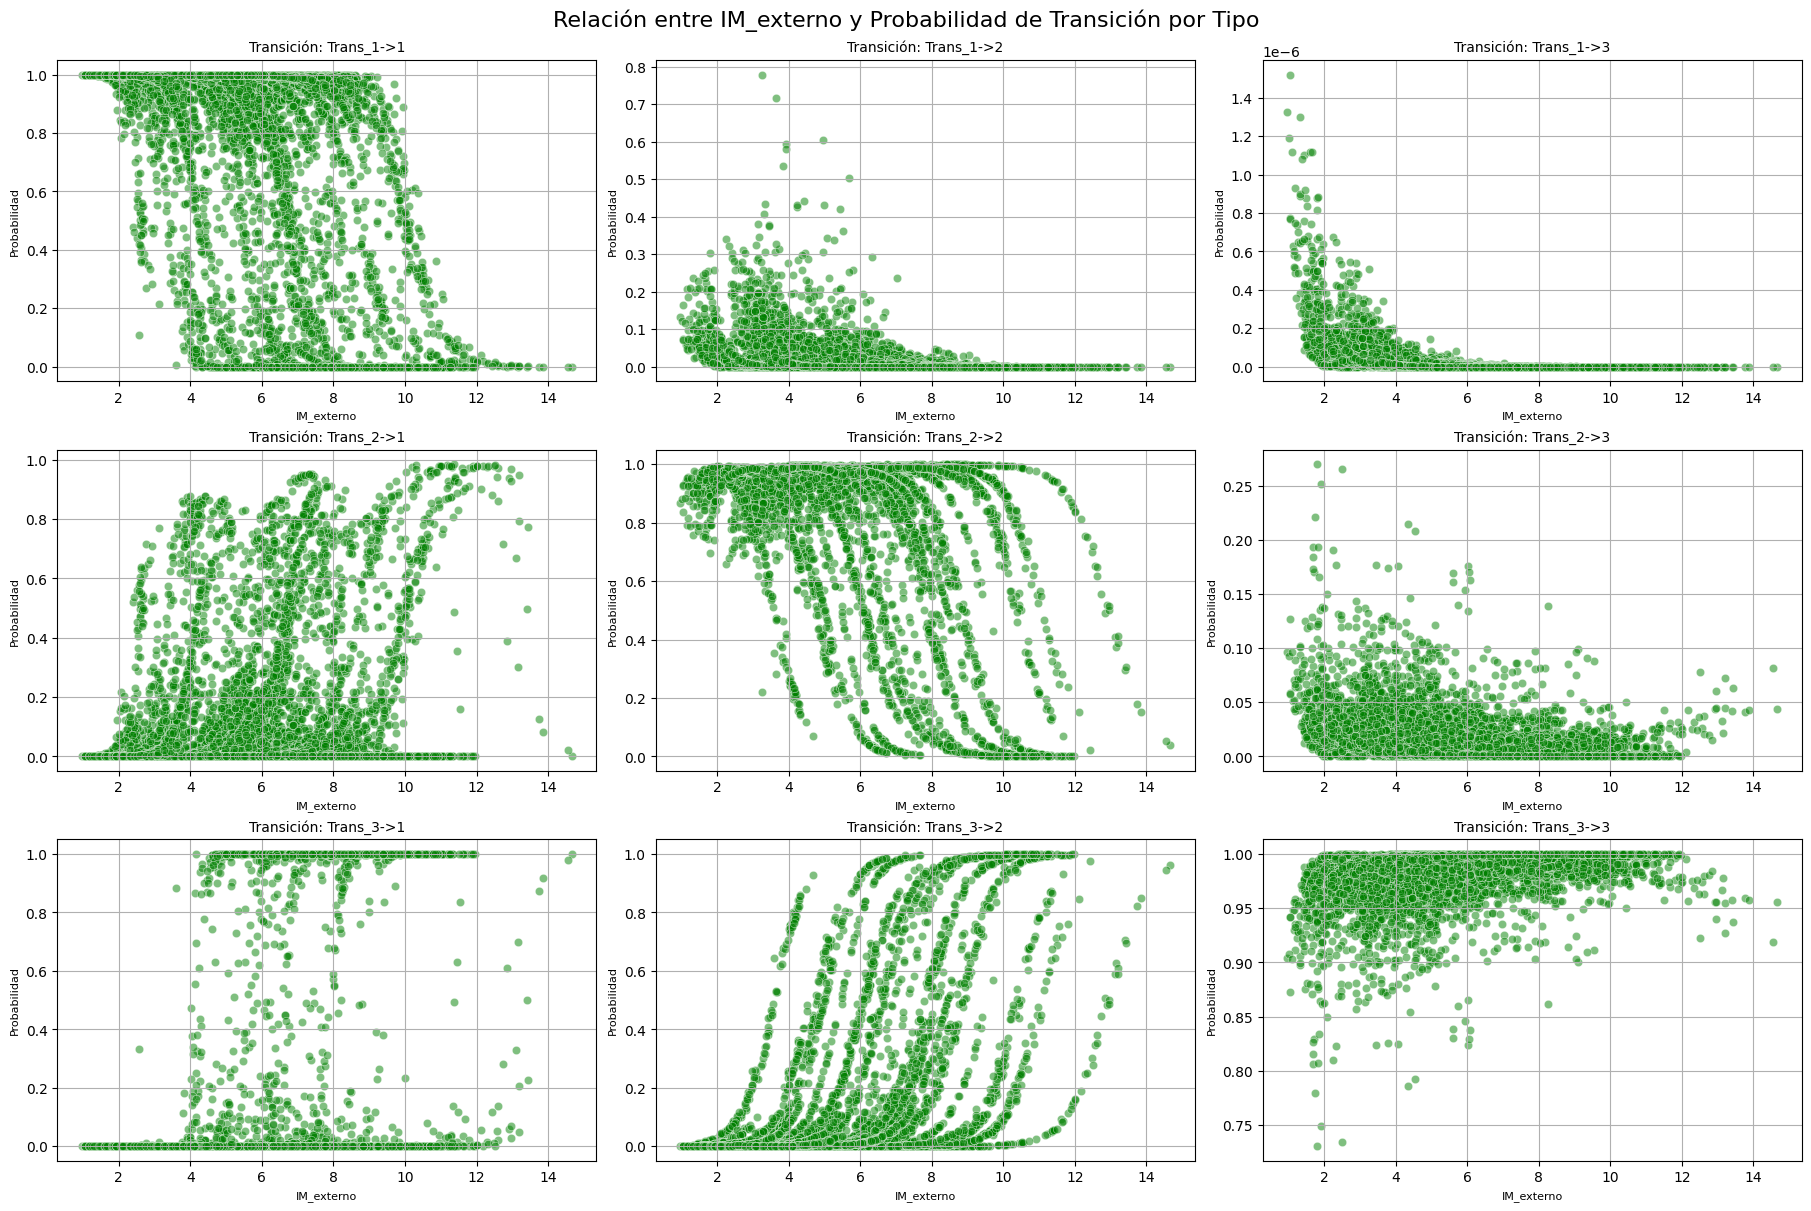

In [ ]:
# Lista de transiciones únicas
transiciones_unicas = glmm_data['Transición'].unique()

# Configurar la figura con subplots
num_transiciones = len(transiciones_unicas)
fig, axes = plt.subplots(
    nrows=(num_transiciones + 2) // 3,  # Filas (3 gráficos por fila)
    ncols=3,  # Columnas
    figsize=(18, 12),
    constrained_layout=True
)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos separados por transición
for i, transicion in enumerate(transiciones_unicas):
    sns.scatterplot(
        data=glmm_data[glmm_data['Transición'] == transicion],
        x='IM_externo',
        y='Probabilidad_Transición',
        alpha=0.5,
        color='green',
        ax=axes[i]
    )
    axes[i].set_title(f'Transición: {transicion}', fontsize=10)
    axes[i].set_xlabel('IM_externo', fontsize=8)
    axes[i].set_ylabel('Probabilidad', fontsize=8)
    axes[i].grid(True)

# Deshabilitar los subplots vacíos si hay más ejes que gráficos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Título general
fig.suptitle('Relación entre IM_externo y Probabilidad de Transición por Tipo', fontsize=16)
plt.show()


In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Guardar resultados de correlación y significancia
resultados_correlacion = []

# Calcular correlaciones por transición
for transicion in glmm_data['Transición'].unique():
    # Filtrar datos por transición
    datos_transicion = glmm_data[glmm_data['Transición'] == transicion]

    # Calcular correlación y p-value
    corr, p_value = pearsonr(datos_transicion['IM_externo'], datos_transicion['Probabilidad_Transición'])

    # Guardar resultados
    resultados_correlacion.append({
        'Transición': transicion,
        'Correlación': corr,
        'p_value': p_value,
        'Significativo': p_value < 0.05  # Significancia a nivel 0.05
    })

# Convertir resultados a DataFrame
correlaciones_significativas = pd.DataFrame(resultados_correlacion)

# Mostrar resultados
print("Resultados de correlación y significancia:")
print(correlaciones_significativas)


Resultados de correlación y significancia:
   Transición  Correlación        p_value  Significativo
0  Trans_1->1    -0.519330   0.000000e+00           True
1  Trans_1->2    -0.330175  1.347973e-184           True
2  Trans_1->3    -0.421780  8.514737e-312           True
3  Trans_2->1     0.349471  4.818577e-208           True
4  Trans_2->2    -0.431853   0.000000e+00           True
5  Trans_2->3    -0.280147  2.645275e-131           True
6  Trans_3->1     0.350410  3.157736e-209           True
7  Trans_3->2     0.483293   0.000000e+00           True
8  Trans_3->3     0.280148  2.638872e-131           True


Recordar que el 1 es contagio severo, 2 moderado y el 3 contagio leve.

Trans_1->1:
- Correlación:	-0.519
- Relación moderadamente negativa: un mayor IM_externo reduce la probabilidad de permanecer en el estado 1.

Trans_1->2
- Correlación: -0.330
- Relación débil negativa: un mayor IM_externo disminuye ligeramente la probabilidad de transición de estado 1 a estado 2.

Trans_1->3
- Correlación: -0.422
- Relación negativa moderada: un mayor IM_externo disminuye significativamente la probabilidad de transición de estado 1 a estado 3.

Trans_2->1
- Correlación: 0.349
- Relación débil positiva: un mayor IM_externo está asociado con una mayor probabilidad de transición de estado 2 a estado 1.

Trans_2->2
- Correlación: -0.432
- Relación negativa moderada: un mayor IM_externo disminuye significativamente la probabilidad de permanecer en el estado 2.

Trans_2->3
- Correlación:: -0.280
- Relación débil negativa: un mayor IM_externo está asociado con una ligera disminución en la probabilidad de transición de estado 2 a estado 3.

Trans_3->1
- Correlación: 0.350
- Relación débil positiva: un mayor IM_externo incrementa ligeramente la probabilidad de transición de estado 3 a estado 1.

Trans_3->2
- Correlación: 0.483
- Relación moderadamente positiva: un mayor IM_externo incrementa de manera significativa la probabilidad de transición de estado 3 a estado 2.

Trans_3->3
- Correlación: 0.280
- Relación débil positiva: un mayor IM_externo incrementa ligeramente la probabilidad de permanecer en el estado 3.

Conclusiones clave:

Mayor impacto de IM_externo: Las transiciones con correlaciones más altas en valor absoluto muestran que IM_externo tiene un efecto más fuerte:
- Trans_1->1 (-0.519): Permanecer en el estado 1 está fuertemente influido negativamente por IM_externo.
- Trans_3->2 (+0.483): La probabilidad de moverse del estado 3 al estado 2 aumenta significativamente con IM_externo.

Impactos menores de IM_externo: Las transiciones con correlaciones bajas tienen menor relación lineal con IM_externo, aunque siguen siendo significativas:
- Trans_2->3 (-0.280) y Trans_3->3 (+0.280) tienen una relación débil con IM_externo, indicando que otros factores pueden ser más relevantes en estas transiciones.

Tendencias generales:
- IM_externo tiene un efecto mixto dependiendo de la transición:
- Relación negativa para transiciones que implican permanecer en el mismo estado (Trans_1->1 y Trans_2->2).
- Relación positiva para ciertas transiciones salientes, como moverse hacia el estado 2 desde el estado 3 (Trans_3->2).

Estos resultados destacan la importancia del índice IM_externo en la dinámica de las transiciones y sugieren posibles áreas para análisis más detallados, como modelar su impacto junto con otras covariables.

#### *SERÍA BUENO PROBAR CON LAS OTRAS COVARIABLES, ESO LO DEJO PENDIENTE POR AHORA PARA SEGUIR CON EL RESTO.*

In [ ]:
# Cargar librerías necesarias
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Asegurarnos de que los datos estén correctamente formateados
glmm_data['Comuna'] = glmm_data['Comuna'].astype('category')  # Comuna como categoría

# Inspeccionar la estructura de los datos
print(glmm_data.info())
print(glmm_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65484 entries, 0 to 65483
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Comuna                      65484 non-null  category
 1   Día_original                65484 non-null  int64   
 2   Día_correlativo             65484 non-null  int64   
 3   Transición                  65484 non-null  object  
 4   Probabilidad_Transición     65484 non-null  float64 
 5   dias                        65484 non-null  int64   
 6   IM_interno                  65484 non-null  float64 
 7   IM_externo                  65484 non-null  float64 
 8   TasaCasosAcumulados         65484 non-null  float64 
 9   Casos_Diarios_Brutos        65484 non-null  float64 
 10  Casos_Diarios_Brutos_MM7    65484 non-null  float64 
 11  inc_pc_comuna               65484 non-null  float64 
 12  Personas_hogar_promedio     65484 non-null  float64 
 13  inmigrantes     

## Probando con pymer4 - rpy2 y lmer
- *Se intentó con GLMM pero no funcionó, ver ChatGPT. Sugiría una distribución beta pero no estaba en statsmodels.genmod.families, por lo que luego sugirió reemplazar beta por binomial logit link (que según yo el profe dijo que no aplicaba).*
- *Luego le dije a ChatGPT que mejor trabajáramos con pymer4 - rpy2 que es para poder usar R en python, paquetes lme4 y lmerTest que son de R.*
- *La biblioteca pymer4 permite ejecutar modelos lineales mixtos y generalizados (GLMM) utilizando el motor de R (lmer/lme4). Esto es ideal para analizar datos como los tuyos, ya que proporciona una mayor flexibilidad en términos de distribuciones y enfoques.*
- *lme4 es el paquete que contiene todas las herramientas y lmer es la función que usaste para ajustar un modelo lineal mixto.*


lme4 (Paquete):

El paquete lme4 es un conjunto de herramientas en R para ajustar modelos lineales mixtos y modelos generalizados mixtos. Es uno de los paquetes más populares en análisis estadístico avanzado debido a su flexibilidad y rendimiento.

Dentro de este paquete, encontramos las siguientes funciones principales:
- lmer: Para ajustar modelos lineales mixtos con errores normales (distribución gaussiana).
- glmer: Para ajustar modelos generalizados lineales mixtos (por ejemplo, para datos binomiales o de Poisson).
- nlmer: Para ajustar modelos no lineales mixtos.

lmer (Función):

La función lmer se utiliza exclusivamente para ajustar modelos lineales mixtos con una distribución gaussiana (normal) para la variable dependiente.

Se utiliza cuando:
- La variable dependiente es numérica continua.
- Los efectos aleatorios (por ejemplo, "Comuna" en tu caso) están incluidos para modelar la heterogeneidad entre grupos.


In [ ]:
# pip install pymer4 rpy2

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pymer4.models import Lmer
import pandas as pd

### 1. Transición 1->1: Mantención en Severo

In [ ]:
# Filtrar los datos para la transición específica
transicion_especifica = 'Trans_1->1'
datos_transicion = glmm_data[glmm_data['Transición'] == transicion_especifica]

# Convertir la columna 'Comuna' a un tipo categórico (necesario para pymer4)
datos_transicion['Comuna'] = datos_transicion['Comuna'].astype('category')

# Asegurarnos de que los nombres de las columnas no tengan caracteres problemáticos
datos_transicion.columns = datos_transicion.columns.str.replace('-', '_').str.replace('>', '_')

# Verificar la estructura de los datos
print(datos_transicion.head())


      Comuna  Día_original  Día_correlativo  Transición  \
0  Cerrillos             2                0  Trans_1->1   
1  Cerrillos             3                1  Trans_1->1   
2  Cerrillos             4                2  Trans_1->1   
3  Cerrillos             5                3  Trans_1->1   
4  Cerrillos             6                4  Trans_1->1   

   Probabilidad_Transición  dias  IM_interno  IM_externo  TasaCasosAcumulados  \
0                 0.998081     2    1.970381    7.804008             2.248303   
1                 0.999127     3    1.845790    7.471452             4.496605   
2                 0.999760     4    1.678598    6.891732             4.496605   
3                 0.996715     5    1.736766    8.317872             4.496605   
4                 0.999944     6    1.331296    6.378498             4.496605   

   Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  inc_pc_comuna  \
0              2.248303                  2.248303      267197.56   
1              2.24830

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_84699/3223989361.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion['Comuna'] = datos_transicion['Comuna'].astype('category')


In [ ]:
from pymer4.models import Lmer

# Definir el modelo GLMM
modelo_pymer = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna)",
    data=datos_transicion
)

# Ajustar el modelo
resultado_pymer = modelo_pymer.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_pymer)


Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7276	 Groups: {'Comuna': 34.0}

Log-likelihood: 2479.483 	 AIC: -4948.967

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.028  0.167
Residual               0.029  0.170

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     1.883   1.825    1.941  0.030    37.381  63.278    0.0  ***
IM_interno     -0.109  -0.116   -0.103  0.003  4036.424 -34.036    0.0  ***
IM_externo     -0.134  -0.139   -0.130  0.002  4765.188 -63.451    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Resumen de los Resultados
Efectos Aleatorios
•	Intercepto por Comuna:
o	Varianza: 0.0280.0280.028
o	Desviación estándar: 0.1670.1670.167
Esto sugiere que hay una variabilidad moderada en el intercepto entre las comunas.
•	Residual:
o	Varianza: 0.0290.0290.029
o	Desviación estándar: 0.1700.1700.170
Indica la variabilidad no explicada por el modelo ni por las diferencias entre comunas.

Efectos Fijos
1.	Intercepto (β0\beta_0β0):
o	Estimación: 1.8831.8831.883
o	Intervalo de confianza (95%): [1.825,1.941][1.825, 1.941][1.825,1.941]
o	ppp-valor: 0.0000.0000.000
Significa que, cuando IM_internoIM\_internoIM_interno y IM_externoIM\_externoIM_externo son 0, la probabilidad esperada de la transición Trans1−>1Trans_1->1Trans1−>1 es 1.8831.8831.883.
2.	IM_internoIM\_internoIM_interno:
o	Estimación: −0.109-0.109−0.109
o	Intervalo de confianza (95%): [−0.116,−0.103][-0.116, -0.103][−0.116,−0.103]
o	ppp-valor: 0.0000.0000.000
Un efecto negativo y significativo, lo que sugiere que un aumento en IM_internoIM\_internoIM_interno reduce la probabilidad de permanecer en el estado severo (Trans1−>1Trans_1->1Trans1−>1).
3.	IM_externoIM\_externoIM_externo:
o	Estimación: −0.134-0.134−0.134
o	Intervalo de confianza (95%): [−0.139,−0.130][-0.139, -0.130][−0.139,−0.130]
o	ppp-valor: 0.0000.0000.000
También tiene un efecto negativo y significativo, indicando que un incremento en IM_externoIM\_externoIM_externo disminuye la probabilidad de permanecer en el estado severo.

Conclusiones
1.	Ambos índices de movilidad tienen un efecto negativo significativo en la probabilidad de permanecer en el estado severo (Trans1−>1Trans_1->1Trans1−>1).
2.	La varianza del intercepto por comuna muestra que existen diferencias entre comunas, aunque no son extremadamente grandes.


#### 1.1 Transición 1->1 "Mantención en Severo": Incluyendo Covariables

In [ ]:
# Filtrar datos para la transición Trans_1->1
transicion_especifica_1_1 = 'Trans_1->1'
datos_transicion_1_1 = glmm_data[glmm_data['Transición'] == transicion_especifica_1_1]

# Asegurarse de que la comuna esté como categoría
datos_transicion_1_1['Comuna'] = datos_transicion_1_1['Comuna'].astype('category')

# Verificar el filtro
print(f"Número de observaciones para {transicion_especifica_1_1}: {len(datos_transicion_1_1)}")
print(datos_transicion_1_1.head())


Número de observaciones para Trans_1->1: 7276
      Comuna  Día_original  Día_correlativo  Transición  \
0  Cerrillos             2                0  Trans_1->1   
1  Cerrillos             3                1  Trans_1->1   
2  Cerrillos             4                2  Trans_1->1   
3  Cerrillos             5                3  Trans_1->1   
4  Cerrillos             6                4  Trans_1->1   

   Probabilidad_Transición  dias  IM_interno  IM_externo  TasaCasosAcumulados  \
0                 0.998081     2    1.970381    7.804008             2.248303   
1                 0.999127     3    1.845790    7.471452             4.496605   
2                 0.999760     4    1.678598    6.891732             4.496605   
3                 0.996715     5    1.736766    8.317872             4.496605   
4                 0.999944     6    1.331296    6.378498             4.496605   

   Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  inc_pc_comuna  \
0              2.248303                  2.2

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_84699/565931547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_1_1['Comuna'] = datos_transicion_1_1['Comuna'].astype('category')


In [ ]:
from pymer4.models import Lmer

# Definir y ajustar el modelo GLMM para la transición 1->1
modelo_glmm_1_1_socio = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + Personas_hogar_promedio + por_educ_sup + indic_precariedad_vivienda + (1|Comuna)",
    data=datos_transicion_1_1
)

# Ajustar el modelo
resultado_glmm_1_1_socio = modelo_glmm_1_1_socio.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado para Trans_1->1 (con variables sociodemográficas):")
print(resultado_glmm_1_1_socio)


Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+Personas_hogar_promedio+por_educ_sup+indic_precariedad_vivienda+(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7276	 Groups: {'Comuna': 34.0}

Log-likelihood: 2472.733 	 AIC: -4929.466

Random effects:

                 Name    Var   Std
Comuna    (Intercept)  0.025  0.16
Residual               0.029  0.17

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado para Trans_1->1 (con variables sociodemográficas):
                            Estimate  2.5_ci  97.5_ci     SE        DF  \
(Intercept)                    1.714   1.020    2.408  0.354    29.452   
IM_interno                    -0.110  -0.116   -0.104  0.003  6476.973   
IM_externo                    -0.134  -0.138   -0.130  0.002  6358.812   
Personas_hogar_promedio       -0.022  -0.199    0.156  0.091    29.484   
por_educ_sup                   0.005  -0.001    0.012  0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


##### *NOTA: es el único que según yo no concuerda. En las otras transiciones si se ve un comportamiento lógico.*

Efectos aleatorios
- Intercepto por comuna:
    - Varianza: 0.025
    - Desviación estándar: 0.16
    - Interpretación: Hay una ligera variabilidad entre comunas en la probabilidad de mantenerse en el estado severo.
- Residual:
    - Varianza: 0.029
    - Desviación estándar: 0.17
    - Interpretación: La variabilidad residual es similar a la de los efectos aleatorios.

Efectos fijos
- Intercepto:
    - Coeficiente: 1.714
    - Interpretación: La probabilidad base de mantenerse en severo (cuando todas las covariables son 0) es alta.
- IM_interno:
    - Coeficiente: -0.110 (p-valor: 0.000 ***)
    - Interpretación: Un aumento en el índice de movilidad interno está asociado con una reducción significativa en la probabilidad de mantenerse en severo.
- IM_externo:
    - Coeficiente: -0.134 (p-valor: 0.000 ***)
    - Interpretación: Un aumento en el índice de movilidad externo también está asociado con una reducción significativa en la probabilidad de mantenerse en severo.
- Personas_hogar_promedio:
    - Coeficiente: -0.022 (p-valor: 0.812)
    - Interpretación: Esta variable no tiene un efecto significativo en la probabilidad de mantenerse en severo.
- por_educ_sup (porcentaje de educación superior):
    - Coeficiente: 1.536 (p-valor: 0.135)
    - Interpretación: Aunque el coeficiente sugiere que un mayor nivel educativo podría estar relacionado con un aumento en la probabilidad de mantenerse en severo, el efecto no es estadísticamente significativo.
- indic_precariedad_vivienda:
    - Coeficiente: 1.753 (p-valor: 0.090)
    - Interpretación: Hay una tendencia (no significativa al nivel del 0.05) de que una mayor precariedad habitacional está asociada con un aumento en la probabilidad de mantenerse en severo.

Conclusión general
- Los índices de movilidad interna y externa son predictores significativos y negativos de la probabilidad de mantenerse en severo. Esto implica que mayores niveles de movilidad reducen la probabilidad de permanecer en este estado.
- Las variables sociodemográficas, como el promedio de personas por hogar, el porcentaje de educación superior, y la precariedad habitacional, no muestran efectos significativos claros en este modelo.

### 2. Transición 2->1: De Moderado a Severo

In [ ]:
# Filtrar los datos para la transición 'Trans_2->1'
transicion_especifica_2_1 = 'Trans_2->1'
datos_transicion_2_1 = glmm_data[glmm_data['Transición'] == transicion_especifica_2_1]

# Asegurarse de que la columna 'Comuna' sea categórica
datos_transicion_2_1['Comuna'] = datos_transicion_2_1['Comuna'].astype('category')

# Inspeccionar los datos
print(f"Número de observaciones para {transicion_especifica_2_1}: {len(datos_transicion_2_1)}")
print(datos_transicion_2_1.head())


Número de observaciones para Trans_2->1: 7276
          Comuna  Día_original  Día_correlativo  Transición  \
21828  Cerrillos             2                0  Trans_2->1   
21829  Cerrillos             3                1  Trans_2->1   
21830  Cerrillos             4                2  Trans_2->1   
21831  Cerrillos             5                3  Trans_2->1   
21832  Cerrillos             6                4  Trans_2->1   

       Probabilidad_Transición  dias  IM_interno  IM_externo  \
21828                 0.001919     2    1.970381    7.804008   
21829                 0.000873     3    1.845790    7.471452   
21830                 0.000240     4    1.678598    6.891732   
21831                 0.003285     5    1.736766    8.317872   
21832                 0.000056     6    1.331296    6.378498   

       TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
21828             2.248303              2.248303                  2.248303   
21829             4.496605        

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_84699/685257938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_2_1['Comuna'] = datos_transicion_2_1['Comuna'].astype('category')


In [ ]:
from pymer4.models import Lmer

# Definir y ajustar el modelo GLMM para la transición 'Trans_2->1'
modelo_glmm_2_1 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna)",
    data=datos_transicion_2_1
)

# Ajustar el modelo
resultado_glmm_2_1 = modelo_glmm_2_1.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_glmm_2_1)


Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7276	 Groups: {'Comuna': 34.0}

Log-likelihood: 1420.703 	 AIC: -2831.405

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.057  0.239
Residual               0.038  0.196

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)    -0.286  -0.369   -0.203  0.042    33.678  -6.793    0.0  ***
IM_interno     -0.053  -0.060   -0.045  0.004  5390.874 -14.000    0.0  ***
IM_externo      0.111   0.107    0.116  0.002  5928.724  45.127    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Resultados clave

Efectos aleatorios (Random Effects):
- Intercepto (Comuna): La varianza del intercepto para las comunas es 0.057, lo que sugiere cierta variación entre comunas en la probabilidad de la transición Trans_2->1.
- Residual: La varianza residual es 0.038, lo que indica la variabilidad no explicada dentro de las comunas.

Efectos fijos (Fixed Effects):

- Intercepto: El estimador del intercepto es -0.286, indicando el valor promedio de la probabilidad de transición cuando los índices de movilidad son cero.
- IM_interno: El coeficiente es -0.053, con un valor p significativo (p = 0.000). Esto indica que un aumento en IM_interno está asociado con una disminución en la probabilidad de la transición.
- IM_externo: El coeficiente es 0.111, también con un valor p significativo (p = 0.000). Esto sugiere que un aumento en IM_externo está asociado con un incremento en la probabilidad de la transición.
- Significancia estadística: Todos los efectos fijos tienen valores p (p < 0.05), lo que indica que son estadísticamente significativos.

#### 2.1 Transición 2->1 "Moderado a Severo": Incluyendo Covariables

In [ ]:
# Filtrar los datos para la transición 'Trans_2->1'
datos_transicion_2_1 = glmm_data[glmm_data['Transición'] == 'Trans_2->1']

# Convertir la columna de comuna a categoría (necesario para pymer4)
datos_transicion_2_1['Comuna'] = datos_transicion_2_1['Comuna'].astype('category')

# Agregar las nuevas covariables al modelo
modelo_glmm_2_1_soc = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + Personas_hogar_promedio + por_educ_sup + indic_precariedad_vivienda + (1|Comuna)",
    data=datos_transicion_2_1
)

# Ajustar el modelo
resultado_glmm_2_1_soc = modelo_glmm_2_1_soc.fit(REML=True)

# Mostrar el resumen del modelo ajustado
print("Resumen del modelo ajustado para Trans_2->1 (con variables sociodemográficas):")
print(resultado_glmm_2_1_soc)


/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_84699/1234281384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_2_1['Comuna'] = datos_transicion_2_1['Comuna'].astype('category')


Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+Personas_hogar_promedio+por_educ_sup+indic_precariedad_vivienda+(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7276	 Groups: {'Comuna': 34.0}

Log-likelihood: 1418.474 	 AIC: -2820.947

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.043  0.206
Residual               0.038  0.196

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado para Trans_2->1 (con variables sociodemográficas):
                            Estimate  2.5_ci  97.5_ci     SE        DF  \
(Intercept)                   -1.159  -2.056   -0.263  0.457    29.002   
IM_interno                    -0.054  -0.061   -0.046  0.004  6774.848   
IM_externo                     0.112   0.107    0.117  0.002  6693.767   
Personas_hogar_promedio        0.282   0.053    0.512  0.117    29.027   
por_educ_sup                   0.008  -0.000    0.017 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Resumen del modelo ajustado para Trans_2->1:

- Intercepto: Representa la probabilidad base de la transición (cuando todas las variables explicativas son cero).
- IM_interno (-0.054): Es estadísticamente significativo (p-valor = 0.000), indicando que un mayor índice de movilidad interna reduce la probabilidad de la transición de moderado a severo.
- IM_externo (0.112): También es estadísticamente significativo (p-valor = 0.000), pero en este caso, un mayor índice de movilidad externa aumenta la probabilidad de esta transición.

- Personas_hogar_promedio (0.282): Significativo (p-valor = 0.022), lo que sugiere que un mayor promedio de personas por hogar se asocia con un aumento en la probabilidad de transición a severo.
- por_educ_sup (1.851): Tiene un efecto positivo, pero no es altamente significativo (p-valor ≈ 0.074).
- indic_precariedad_vivienda (-1.370): No es significativo (p-valor ≈ 0.181), indicando que no hay evidencia clara de que este indicador afecte la transición.

Interpretación:
- Este modelo sugiere que las condiciones de movilidad interna y externa tienen un impacto claro y significativo en la probabilidad de que un caso pase de moderado a severo. Entre las variables sociodemográficas, el promedio de personas por hogar parece tener una influencia notable.

### 3. Transición 3->1: De Leve a Severo

In [ ]:
# Filtrar los datos para la transición 'Trans_3->1'
transicion_3_1 = 'Trans_3->1'
datos_transicion_3_1 = glmm_data[glmm_data['Transición'] == transicion_3_1]

# Convertir la columna 'Comuna' a categórica si no lo está
datos_transicion_3_1['Comuna'] = datos_transicion_3_1['Comuna'].astype('category')

# Mostrar información básica
print(f"Número de observaciones para {transicion_3_1}: {len(datos_transicion_3_1)}")
print(datos_transicion_3_1.head())


Número de observaciones para Trans_3->1: 7276
          Comuna  Día_original  Día_correlativo  Transición  \
43656  Cerrillos             2                0  Trans_3->1   
43657  Cerrillos             3                1  Trans_3->1   
43658  Cerrillos             4                2  Trans_3->1   
43659  Cerrillos             5                3  Trans_3->1   
43660  Cerrillos             6                4  Trans_3->1   

       Probabilidad_Transición  dias  IM_interno  IM_externo  \
43656             1.770769e-15     2    1.970381    7.804008   
43657             8.774029e-17     3    1.845790    7.471452   
43658             7.111755e-19     4    1.678598    6.891732   
43659             4.957473e-15     5    1.736766    8.317872   
43660             1.846976e-21     6    1.331296    6.378498   

       TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
43656             2.248303              2.248303                  2.248303   
43657             4.496605        

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_84699/2230245379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_3_1['Comuna'] = datos_transicion_3_1['Comuna'].astype('category')


In [ ]:
# Definir y ajustar el modelo GLMM para la transición 'Trans_3->1'
modelo_glmm_3_1 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna)",
    data=datos_transicion_3_1
)

# Ajustar el modelo
resultado_glmm_3_1 = modelo_glmm_3_1.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado para Trans_3->1:")
print(resultado_glmm_3_1)


Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7276	 Groups: {'Comuna': 34.0}

Log-likelihood: 2096.137 	 AIC: -4182.274

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.031  0.175
Residual               0.032  0.179

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado para Trans_3->1:
             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)    -0.597  -0.658   -0.536  0.031    34.069 -19.139    0.0  ***
IM_interno      0.160   0.153    0.166  0.003  3818.818  47.210    0.0  ***
IM_externo      0.024   0.020    0.029  0.002  4563.452  10.859    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Resultados del modelo

Efectos fijos (Fixed Effects):
- Intercepto (-0.597): La probabilidad promedio de transición desde el estado 3 al estado 1 (cuando los índices de movilidad son cero) es negativa. Esto indica una tendencia baja en la probabilidad base.
- IM_interno (0.160): Hay una asociación positiva significativa entre el índice de movilidad interna y la probabilidad de transición. Es decir, a medida que aumenta el IM interno, la probabilidad de pasar del estado 3 al estado 1 también aumenta.
- IM_externo (0.024): También se observa una asociación positiva significativa, aunque más débil, entre el índice de movilidad externa y la probabilidad de transición.
- Ambos efectos son estadísticamente significativos (p < 0.001).

Efectos aleatorios (Random Effects):
- Varianza de la comuna (0.031): Existe cierta variabilidad entre comunas que no es explicada por los efectos fijos.
- Residual (0.032): La variabilidad no explicada dentro de las observaciones.

Interpretación:
- El índice de movilidad interna tiene un impacto mayor que el índice de movilidad externa en la probabilidad de transición de estado leve (3) a estado grave (1).
- La varianza entre comunas sugiere que algunas comunas tienen patrones únicos en su probabilidad de transición.

#### 3.1 Transición 3->1 "Leve a Severo": Incluyendo Covariables

In [ ]:
# Filtrar los datos para la transición 'Trans_3->1'
transicion_especifica_3_1 = 'Trans_3->1'
datos_transicion_3_1 = glmm_data[glmm_data['Transición'] == transicion_especifica_3_1]

# Convertir la columna 'Comuna' a tipo categórico si no está
datos_transicion_3_1['Comuna'] = datos_transicion_3_1['Comuna'].astype('category')

# Inspeccionar los datos
print(f"Número de observaciones para {transicion_especifica_3_1}: {len(datos_transicion_3_1)}")
print(datos_transicion_3_1.head())


Número de observaciones para Trans_3->1: 7276
          Comuna  Día_original  Día_correlativo  Transición  \
43656  Cerrillos             2                0  Trans_3->1   
43657  Cerrillos             3                1  Trans_3->1   
43658  Cerrillos             4                2  Trans_3->1   
43659  Cerrillos             5                3  Trans_3->1   
43660  Cerrillos             6                4  Trans_3->1   

       Probabilidad_Transición  dias  IM_interno  IM_externo  \
43656             1.770769e-15     2    1.970381    7.804008   
43657             8.774029e-17     3    1.845790    7.471452   
43658             7.111755e-19     4    1.678598    6.891732   
43659             4.957473e-15     5    1.736766    8.317872   
43660             1.846976e-21     6    1.331296    6.378498   

       TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
43656             2.248303              2.248303                  2.248303   
43657             4.496605        

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_84699/279264881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_3_1['Comuna'] = datos_transicion_3_1['Comuna'].astype('category')


In [ ]:
from pymer4.models import Lmer

# Ajustar el modelo GLMM para la transición 'Trans_3->1' con variables sociodemográficas
modelo_glmm_3_1_soc = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + Personas_hogar_promedio + por_educ_sup + indic_precariedad_vivienda + (1|Comuna)",
    data=datos_transicion_3_1
)

# Ajustar el modelo
resultado_glmm_3_1_soc = modelo_glmm_3_1_soc.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado para Trans_3->1 (con variables sociodemográficas):")
print(resultado_glmm_3_1_soc)


Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+Personas_hogar_promedio+por_educ_sup+indic_precariedad_vivienda+(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7276	 Groups: {'Comuna': 34.0}

Log-likelihood: 2102.744 	 AIC: -4189.489

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.012  0.109
Residual               0.032  0.179

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado para Trans_3->1 (con variables sociodemográficas):
                            Estimate  2.5_ci  97.5_ci     SE        DF  \
(Intercept)                    0.417  -0.061    0.895  0.244    28.873   
IM_interno                     0.161   0.154    0.168  0.003  4054.130   
IM_externo                     0.024   0.019    0.028  0.002  3787.375   
Personas_hogar_promedio       -0.253  -0.376   -0.131  0.062    28.942   
por_educ_sup                  -0.013  -0.018   -0.008 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Efectos aleatorios (Random Effects):
- Intercepto por comuna:
    - Varianza: 0.012
    - Desviación estándar: 0.109
- Residual:
    - Varianza: 0.032
    - Desviación estándar: 0.179

La varianza del intercepto indica que existe cierta variabilidad entre las comunas en las probabilidades de transición (aunque pequeña, con 0.012). Sin embargo, la mayor parte de la variabilidad parece ser explicada por los residuos.

Efectos fijos (Fixed Effects):
- Intercepto: Coeficiente 0.417 (p-value 0.000). La probabilidad base de transición (cuando todas las variables son 0) es 0.417.
- IM_interno: Coeficiente 0.161	(p-value 0.000). A mayor movilidad interna, mayor probabilidad de pasar de leve a severo.
- IM_externo: Coeficiente 0.024	(p-value 0.000). La movilidad externa también está positivamente asociada con la probabilidad de transición.
- Personas_hogar_promedio:	Coeficiente -0.253 (p-value 0.000). Hogares más grandes están asociados con una menor probabilidad de transición de leve a severo.
- por_educ_sup: Coeficiente	-5.489	(p-value 0.000). Mayor porcentaje de educación superior en la comuna reduce significativamente la probabilidad.
- indic_precariedad_vivienda: Coeficiente -0.010 (p-value 0.992). No se encuentra asociación significativa entre precariedad de la vivienda y la probabilidad de transición.

Interpretación clave:
- Movilidad interna y externa: Ambas variables son significativas (p < 0.05) y están asociadas positivamente con la probabilidad de pasar del estado leve al severo. Esto sugiere que el aumento en la movilidad (ya sea interna o externa) puede incrementar la severidad de los contagios.

Características sociodemográficas:
- Tamaño promedio de los hogares: Las comunas con hogares más grandes presentan menor probabilidad de transición a severo.
- Educación superior: Las comunas con mayor proporción de personas con educación superior tienen una probabilidad significativamente menor de esta transición, lo cual podría indicar un efecto protector asociado a factores sociales o de comportamiento.
- Precariedad en la vivienda: No se encuentra un efecto significativo en este modelo (p > 0.05).

### 4. Transición 3->2: De Leve a Moderado

In [ ]:
# Filtrar datos para la transición 'Trans_3->2'
transicion_especifica_3_2 = 'Trans_3->2'
datos_transicion_3_2 = glmm_data[glmm_data['Transición'] == transicion_especifica_3_2]

# Asegurarse de que la columna 'Comuna' sea de tipo categoría
datos_transicion_3_2['Comuna'] = datos_transicion_3_2['Comuna'].astype('category')

# Verificar los datos filtrados
print(f"Número de observaciones para {transicion_especifica_3_2}: {len(datos_transicion_3_2)}")
print(datos_transicion_3_2.head())


Número de observaciones para Trans_3->2: 7276
          Comuna  Día_original  Día_correlativo  Transición  \
50932  Cerrillos             2                0  Trans_3->2   
50933  Cerrillos             3                1  Trans_3->2   
50934  Cerrillos             4                2  Trans_3->2   
50935  Cerrillos             5                3  Trans_3->2   
50936  Cerrillos             6                4  Trans_3->2   

       Probabilidad_Transición  dias  IM_interno  IM_externo  \
50932                 0.001430     2    1.970381    7.804008   
50933                 0.000738     3    1.845790    7.471452   
50934                 0.000236     4    1.678598    6.891732   
50935                 0.003264     5    1.736766    8.317872   
50936                 0.000074     6    1.331296    6.378498   

       TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
50932             2.248303              2.248303                  2.248303   
50933             4.496605        

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_84699/1279678256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_3_2['Comuna'] = datos_transicion_3_2['Comuna'].astype('category')


In [ ]:
# Definir y ajustar el modelo GLMM para la transición 'Trans_3->2'
modelo_glmm_3_2 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna)",
    data=datos_transicion_3_2
)

# Ajustar el modelo
resultado_glmm_3_2 = modelo_glmm_3_2.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado para Trans_3->2:")
print(resultado_glmm_3_2)


Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7276	 Groups: {'Comuna': 34.0}

Log-likelihood: 4445.166 	 AIC: -8880.332

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.019  0.137
Residual               0.017  0.129

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado para Trans_3->2:
             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)    -0.653  -0.701   -0.605  0.024    36.416 -26.796    0.0  ***
IM_interno      0.112   0.107    0.117  0.002  4564.352  45.432    0.0  ***
IM_externo      0.069   0.066    0.072  0.002  5237.794  42.737    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Resumen del modelo ajustado para Trans_3->2

Intercepto (Intercept):
- Estimación: -0.653
- Indica la probabilidad promedio de la transición cuando las variables explicativas (IM_interno e IM_externo) son 0.
- Es estadísticamente significativa (P-val = 0.0).

Efectos fijos:
- IM_interno:
Estimación: 0.112 (positivo)
Incrementos en el índice de movilidad interna aumentan la probabilidad de pasar de un estado leve a un estado moderado.
Es altamente significativo (P-val = 0.0).
- IM_externo:
Estimación: 0.069 (positivo)
Incrementos en la movilidad externa también incrementan la probabilidad de esta transición.
También es estadísticamente significativo (P-val = 0.0).

Efectos aleatorios (Random effects):
- Varianza del intercepto (Comuna): 0.019
Refleja variaciones en las probabilidades base de la transición entre comunas.
- Residual: 0.017
Indica variación no explicada por los efectos fijos y aleatorios.


Interpretación clave
- Relación positiva entre los índices de movilidad (IM_interno e IM_externo) y la transición: Ambos índices explican significativamente la probabilidad de que ocurra la transición de leve a moderado.
Variabilidad entre comunas:
- Existe una pequeña varianza entre comunas en la probabilidad base de esta transición, reflejada en el efecto aleatorio.

#### 4.1 Transición 3->2 "Leve a Moderado": Incluyendo Covariables

In [ ]:
# Filtrar los datos para la transición 'Trans_3->2'
transicion_especifica_3_2 = 'Trans_3->2'
datos_transicion_3_2 = glmm_data[glmm_data['Transición'] == transicion_especifica_3_2].copy()

# Convertir la comuna a categórica si no lo está
datos_transicion_3_2['Comuna'] = datos_transicion_3_2['Comuna'].astype('category')

# Revisar la selección
print(f"Número de observaciones para {transicion_especifica_3_2}: {len(datos_transicion_3_2)}")
print(datos_transicion_3_2.head())


Número de observaciones para Trans_3->2: 7276
          Comuna  Día_original  Día_correlativo  Transición  \
50932  Cerrillos             2                0  Trans_3->2   
50933  Cerrillos             3                1  Trans_3->2   
50934  Cerrillos             4                2  Trans_3->2   
50935  Cerrillos             5                3  Trans_3->2   
50936  Cerrillos             6                4  Trans_3->2   

       Probabilidad_Transición  dias  IM_interno  IM_externo  \
50932                 0.001430     2    1.970381    7.804008   
50933                 0.000738     3    1.845790    7.471452   
50934                 0.000236     4    1.678598    6.891732   
50935                 0.003264     5    1.736766    8.317872   
50936                 0.000074     6    1.331296    6.378498   

       TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
50932             2.248303              2.248303                  2.248303   
50933             4.496605        

In [ ]:
from pymer4.models import Lmer

# Definir y ajustar el modelo GLMM para la transición 'Trans_3->2'
modelo_glmm_3_2 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + Personas_hogar_promedio + por_educ_sup + indic_precariedad_vivienda + (1|Comuna)",
    data=datos_transicion_3_2
)

# Ajustar el modelo
resultado_glmm_3_2 = modelo_glmm_3_2.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado para Trans_3->2 (con variables sociodemográficas):")
print(resultado_glmm_3_2)


Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+Personas_hogar_promedio+por_educ_sup+indic_precariedad_vivienda+(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7276	 Groups: {'Comuna': 34.0}

Log-likelihood: 4447.067 	 AIC: -8878.133

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.009  0.097
Residual               0.017  0.129

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado para Trans_3->2 (con variables sociodemográficas):
                            Estimate  2.5_ci  97.5_ci     SE        DF  \
(Intercept)                    0.054  -0.370    0.479  0.217    30.526   
IM_interno                     0.114   0.109    0.119  0.002  5519.930   
IM_externo                     0.068   0.065    0.071  0.002  5312.812   
Personas_hogar_promedio       -0.144  -0.253   -0.036  0.055    30.576   
por_educ_sup                  -0.011  -0.015   -0.006 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Efectos aleatorios:
- Intercepto (Comuna):
    - Varianza: 0.009 (moderada).
    - Desviación estándar: 0.097 (pequeña influencia de la comuna en la variación de la probabilidad de transición).
- Residual (variación no explicada por los efectos aleatorios):
    - Varianza: 0.017.
    - Desviación estándar: 0.129.

Interpretación: El efecto aleatorio de la comuna es relativamente pequeño, lo que sugiere que la mayor parte de la variación está explicada por las covariables incluidas en el modelo.

Efectos fijos (covariables):
- Intercepto:
    - Estimación: 0.054.
    - Significativo: Sí (p < 0.05).
    - Interpretación: La probabilidad promedio de la transición (cuando las covariables tienen un efecto neutral) es cercana a 0.05.
- IM_interno:
    - Estimación: 0.114.
    - Significativo: Sí (p < 0.001).
    - Interpretación: Un aumento en el índice de movilidad interno se asocia con un incremento en la probabilidad de pasar de un estado leve a moderado.
- IM_externo:
    - Estimación: 0.068.
    - Significativo: Sí (p < 0.001).
    - Interpretación: Un aumento en el índice de movilidad externo también incrementa la probabilidad de la transición.
- Personas_hogar_promedio:
    - Estimación: -0.144.
    - Significativo: Sí (p = 0.014).
    - Interpretación: Comunas con mayor cantidad de personas promedio por hogar tienen una menor probabilidad de la transición de leve a moderado.
- por_educ_sup (porcentaje de educación superior):
    - Estimación: -5.054.
    - Significativo: Sí (p < 0.001).
    - Interpretación: Un mayor porcentaje de personas con educación superior en la comuna reduce significativamente la probabilidad de la transición.
- indic_precariedad_vivienda:
    - Estimación: -1.464.
    - Significativo: No (p = 0.154).
    - Interpretación: La precariedad en la vivienda no tiene un efecto significativo en la probabilidad de la transición.

Conclusiones:
- Índices de movilidad (interno y externo): Ambos tienen un efecto positivo y significativo en la probabilidad de pasar de un estado leve a moderado.
- Factores sociodemográficos:
    - Comunas con mayor promedio de personas por hogar tienen menor probabilidad de esta transición.
    - Comunas con un porcentaje alto de educación superior también reducen significativamente la probabilidad de esta transición.
    - La precariedad en vivienda no mostró un efecto significativo.

### Transición 2->2: Mantención en Moderado

In [ ]:
# Filtrar los datos para la transición 'Trans_2->2'
transicion_especifica = 'Trans_2->2'
datos_transicion_2_2 = glmm_data[glmm_data['Transición'] == transicion_especifica].copy()

# Asegurarnos de que la columna 'Comuna' esté en formato categórico
datos_transicion_2_2['Comuna'] = datos_transicion_2_2['Comuna'].astype('category')

# Inspeccionar los datos filtrados
print(f"Número de observaciones para {transicion_especifica}: {datos_transicion_2_2.shape[0]}")
print(datos_transicion_2_2.head())


Número de observaciones para Trans_2->2: 7276
          Comuna  Día_original  Día_correlativo  Transición  \
29104  Cerrillos             2                0  Trans_2->2   
29105  Cerrillos             3                1  Trans_2->2   
29106  Cerrillos             4                2  Trans_2->2   
29107  Cerrillos             5                3  Trans_2->2   
29108  Cerrillos             6                4  Trans_2->2   

       Probabilidad_Transición  dias  IM_interno  IM_externo  \
29104                 0.987952     2    1.970381    7.804008   
29105                 0.981643     3    1.845790    7.471452   
29106                 0.962112     4    1.678598    6.891732   
29107                 0.984042     5    1.736766    8.317872   
29108                 0.890319     6    1.331296    6.378498   

       TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
29104             2.248303              2.248303                  2.248303   
29105             4.496605        

In [ ]:
# Definir y ajustar el modelo GLMM para la transición 'Trans_2->2'
modelo_glmm_2_2 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna)",
    data=datos_transicion_2_2
)

# Ajustar el modelo
resultado_glmm_2_2 = modelo_glmm_2_2.fit(REML=True)

# Resumen del modelo
print(f"Resumen del modelo ajustado para {transicion_especifica}:")
print(resultado_glmm_2_2)


Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7276	 Groups: {'Comuna': 34.0}

Log-likelihood: 3309.655 	 AIC: -6609.309

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.017  0.130
Residual               0.023  0.151

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado para Trans_2->2:
             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     1.532   1.486    1.578  0.023    37.290  65.249    0.0  ***
IM_interno     -0.108  -0.114   -0.103  0.003  3004.707 -38.223    0.0  ***
IM_externo     -0.053  -0.057   -0.050  0.002  3761.770 -28.493    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Interpretación transición Trans_2->2 (mantención en moderado):

Efectos aleatorios (Comuna):
- Intercepto (Varianza): 0.017
- Residuo (Varianza): 0.023
- La varianza entre comunas parece moderada, indicando cierta diferencia en las probabilidades de transición atribuible a las comunas.

Efectos fijos:
- Intercepto: 1.532 (muy significativo, con un p-valor < 0.001).
- IM_interno: Coeficiente de -0.108. Negativo y muy significativo (p < 0.001). Un mayor índice de movilidad interna reduce la probabilidad de mantenerse en el estado moderado.
- IM_externo: Coeficiente de -0.053. Negativo y muy significativo (p < 0.001). Un mayor índice de movilidad externa también reduce esta probabilidad.

Interpretación:
- Tanto el índice de movilidad interno como el externo tienen un impacto negativo en la probabilidad de permanecer en el estado moderado. Esto implica que un aumento en la movilidad (interna o externa) reduce la probabilidad de mantener un nivel de contagio "moderado" y podría estar relacionado con transiciones hacia estados más graves o leves.
- La varianza de los efectos aleatorios sugiere que hay diferencias entre las comunas, pero estas no son drásticamente altas.